In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import h5py


In [5]:
data1_mass = h5py.File('fof_subhalo_tab_099.Subhalo.SubhaloMassInRadType.hdf5',mode = 'r')
data2_sfr = h5py.File('fof_subhalo_tab_099.Subhalo.SubhaloSFRinRad.hdf5',mode = 'r')
data3_pos = h5py.File('fof_subhalo_tab_099.Subhalo.SubhaloPos.hdf5',mode = 'r')
#data4_grnr = h5py.File('fof_subhalo_tab_099.Subhalo.SubhaloGrNr.hdf5',mode = 'r')
#data5_groupmass = h5py.File('fof_subhalo_tab_099.Group.GroupMass.hdf5',mode='r')
data6_color = h5py.File('fof_subhalo_tab_099.Subhalo.SubhaloStellarPhotometrics.hdf5',mode = 'r')
head1 =data1_mass['Subhalo']
head2 = data2_sfr['Subhalo']
head3 = data3_pos['Subhalo']
#head4 = data4_grnr['Subhalo']
#head5 = data5_groupmass['Group']
head6  = data6_color['Subhalo']

In [6]:
stellarmass = np.array(head1['SubhaloMassInRadType'])[:,4]
sfr = np.array(head2['SubhaloSFRinRad'])
pos = np.array(head3['SubhaloPos'])
#grnr = np.array(head4['SubhaloGrNr'])
#gr_mass = np.array(head5['GroupMass'])
U=np.array(head6['SubhaloStellarPhotometrics'])[:,0]
B= np.array(head6['SubhaloStellarPhotometrics'])[:,1]
V= np.array(head6['SubhaloStellarPhotometrics'])[:,2]
K= np.array(head6['SubhaloStellarPhotometrics'])[:,3]
g= np.array(head6['SubhaloStellarPhotometrics'])[:,4]
r= np.array(head6['SubhaloStellarPhotometrics'])[:,5]
i =  np.array(head6['SubhaloStellarPhotometrics'])[:,6]
z = np.array(head6['SubhaloStellarPhotometrics'])[:,7]

In [7]:
stellarmass = stellarmass.reshape(-1,1)
sfr =sfr.reshape(-1,1)
#grnr =grnr.reshape(-1,1)
#gr_mass=gr_mass.reshape(-1,1)
U = U.reshape(-1,1)
V = V.reshape(-1,1)
K = K.reshape(-1,1)
r= r.reshape(-1,1)
B= B.reshape(-1,1)
i= i.reshape(-1,1)
g= g.reshape(-1,1)
z=z.reshape(-1,1)

In [8]:
data = pd.DataFrame(np.hstack((pos,stellarmass,sfr,U,B,V,K,g,r,i,z)))

In [9]:
data.columns = ['x','y','z','stellarmass','sfr','U','B','V','K','g','r','i','z_color']

In [10]:
data.head()

,x,y,z,stellarmass,sfr,U,B,V,K,g,r,i,z_color
0,43718.812500,48813.640625,147594.953125,352.793427,0.0,-24.791388,-25.177679,-26.034241,-28.911427,-25.628429,-26.373409,-26.728613,-26.975189
1,45442.273438,51850.199219,146416.500000,173.525040,0.0,-24.046928,-24.439625,-25.297689,-28.171772,-24.891636,-25.636240,-25.990240,-26.236513
2,44490.761719,49091.714844,147870.578125,38.240879,0.0,-22.093132,-22.588654,-23.502014,-26.553734,-23.062399,-23.858458,-24.239382,-24.516970
3,43820.785156,50939.398438,147711.046875,16.717274,0.0,-21.287239,-21.744883,-22.638138,-25.620272,-22.211082,-22.987967,-23.359406,-23.624681
4,44302.578125,49630.972656,147869.484375,15.221505,0.0,-21.176722,-21.637291,-22.531923,-25.517952,-22.103907,-22.881990,-23.252897,-23.519327


In [11]:
gal = data[data['stellarmass']>0]

In [12]:
gal[gal['x']<0]

,x,y,z,stellarmass,sfr,U,B,V,K,g,r,i,z_color
2672789,-0.093659,164360.453125,105671.140625,0.011715,0.043907,-14.648463,-14.823872,-15.528068,-17.84833,-15.21615,-15.812249,-16.073435,-16.216162


In [13]:
len(gal)

1238655

In [14]:
gal = gal[(gal['x']>=0)]

In [15]:
len(gal)

1238654

In [16]:
gal['stellarmass'] = gal['stellarmass']*1e10

In [17]:
gal['g_r'] = gal['g'] - gal['r']

In [18]:
gal['log_mass'] = np.log10(gal['stellarmass'])

In [19]:
gal.head(5)

,x,y,z,stellarmass,sfr,U,B,V,K,g,r,i,z_color,g_r,log_mass
0,43718.812500,48813.640625,147594.953125,3.527934e+12,0.0,-24.791388,-25.177679,-26.034241,-28.911427,-25.628429,-26.373409,-26.728613,-26.975189,0.744980,12.547520
1,45442.273438,51850.199219,146416.500000,1.735250e+12,0.0,-24.046928,-24.439625,-25.297689,-28.171772,-24.891636,-25.636240,-25.990240,-26.236513,0.744604,12.239362
2,44490.761719,49091.714844,147870.578125,3.824088e+11,0.0,-22.093132,-22.588654,-23.502014,-26.553734,-23.062399,-23.858458,-24.239382,-24.516970,0.796059,11.582528
3,43820.785156,50939.398438,147711.046875,1.671727e+11,0.0,-21.287239,-21.744883,-22.638138,-25.620272,-22.211082,-22.987967,-23.359406,-23.624681,0.776884,11.223165
4,44302.578125,49630.972656,147869.484375,1.522151e+11,0.0,-21.176722,-21.637291,-22.531923,-25.517952,-22.103907,-22.881990,-23.252897,-23.519327,0.778084,11.182458


In [59]:
np.amax(gal['x'].values)

204999.95

In [28]:
gal_g1 = gal[(gal['log_mass']>8.5)&(gal['log_mass']<9.5)]
#gal_g2 = gal[(gal['log_mass']>9)&(gal['log_mass']<10)]
gal_g3 = gal[(gal['log_mass']>10)]
#gal_g4 = gal[(gal['log_mass'])>11]

In [29]:
len(gal_g3)

64066

# correlation function

In [26]:
bins = np.logspace(-1,1.2,10)
bincenters = 0.5*(bins[1:]+bins[:-1])

In [27]:
xyz_g1 = gal_g1[['x','y','z']].values/1000
xyz_g2 = gal_g2[['x','y','z']].values/1000
xyz_g3 = gal_g3[['x','y','z']].values/1000
xyz_g4 = gal_g4[['x','y','z']].values/1000

In [28]:
from Corrfunc.theory.xi import xi
boxsize=205
nthreads = 2
dd_gal_g1 = xi(boxsize, nthreads, bins,xyz_g1[:,0],xyz_g1[:,1],xyz_g1[:,2], output_ravg=True)



dd_gal_g2 = xi(boxsize, nthreads, bins, xyz_g2[:,0], xyz_g2[:,1], xyz_g2[:,2], output_ravg=True)

dd_gal_g3= xi(boxsize, nthreads, bins, xyz_g3[:,0], xyz_g3[:,1], xyz_g3[:,2], output_ravg=True)


dd_gal_g4 = xi(boxsize, nthreads, bins, xyz_g4[:,0], xyz_g4[:,1], xyz_g4[:,2], output_ravg=True)




In [29]:
len(gal_g1)

294054

In [30]:
len(gal_g2)

157213

In [31]:
len(gal_g3)

61432

In [32]:
len(gal_g4)

2634

In [33]:
cf_g1 = []
cf_g2 = []
cf_g3 = []
cf_g4 = []


for i in dd_gal_g1:
    cf_g1.append(i[3])
cf_g1 = np.array(cf_g1)

for i in dd_gal_g2:
    cf_g2.append(i[3])
cf_g2 = np.array(cf_g2)


for i in dd_gal_g3:
    cf_g3.append(i[3])
cf_g3 = np.array(cf_g3)


for i in dd_gal_g4:
    cf_g4.append(i[3])
cf_g4 = np.array(cf_g4)


# Sample error

In [34]:
xyz_g1 = gal_g1[['x','y','z']]/1000
xyz_g2 = gal_g2[['x','y','z']]/1000
xyz_g3 = gal_g3[['x','y','z']]/1000
xyz_g4 = gal_g4[['x','y','z']]/1000

In [35]:
g1_1 = xyz_g1[(xyz_g1['x']<102.5)&(xyz_g1['y']<102.5)&(xyz_g1['z']<102.5)].values
g1_2 = xyz_g1[(xyz_g1['x']<102.5)&(xyz_g1['y']<102.5)&(xyz_g1['z']>102.5)].values
g1_3 = xyz_g1[(xyz_g1['x']<102.5)&(xyz_g1['y']>102.5)&(xyz_g1['z']<102.5)].values
g1_4 = xyz_g1[(xyz_g1['x']>102.5)&(xyz_g1['y']<102.5)&(xyz_g1['z']<102.5)].values
g1_5 = xyz_g1[(xyz_g1['x']>102.5)&(xyz_g1['y']>102.5)&(xyz_g1['z']<102.5)].values
g1_6 = xyz_g1[(xyz_g1['x']>102.5)&(xyz_g1['y']<102.5)&(xyz_g1['z']>102.5)].values
g1_7 = xyz_g1[(xyz_g1['x']<102.5)&(xyz_g1['y']>102.5)&(xyz_g1['z']>102.5)].values
g1_8 = xyz_g1[(xyz_g1['x']>102.5)&(xyz_g1['y']>102.5)&(xyz_g1['z']>102.5)].values

In [36]:
g2_1 = xyz_g2[(xyz_g2['x']<102.5)&(xyz_g2['y']<102.5)&(xyz_g2['z']<102.5)].values
g2_2 = xyz_g2[(xyz_g2['x']<102.5)&(xyz_g2['y']<102.5)&(xyz_g2['z']>102.5)].values
g2_3 = xyz_g2[(xyz_g2['x']<102.5)&(xyz_g2['y']>102.5)&(xyz_g2['z']<102.5)].values
g2_4 = xyz_g2[(xyz_g2['x']>102.5)&(xyz_g2['y']<102.5)&(xyz_g2['z']<102.5)].values
g2_5 = xyz_g2[(xyz_g2['x']>102.5)&(xyz_g2['y']>102.5)&(xyz_g2['z']<102.5)].values
g2_6 = xyz_g2[(xyz_g2['x']>102.5)&(xyz_g2['y']<102.5)&(xyz_g2['z']>102.5)].values
g2_7 = xyz_g2[(xyz_g2['x']<102.5)&(xyz_g2['y']>102.5)&(xyz_g2['z']>102.5)].values
g2_8 = xyz_g2[(xyz_g2['x']>102.5)&(xyz_g2['y']>102.5)&(xyz_g2['z']>102.5)].values

In [37]:
g3_1 = xyz_g3[(xyz_g3['x']<102.5)&(xyz_g3['y']<102.5)&(xyz_g3['z']<102.5)].values
g3_2 = xyz_g3[(xyz_g3['x']<102.5)&(xyz_g3['y']<102.5)&(xyz_g3['z']>102.5)].values
g3_3 = xyz_g3[(xyz_g3['x']<102.5)&(xyz_g3['y']>102.5)&(xyz_g3['z']<102.5)].values
g3_4 = xyz_g3[(xyz_g3['x']>102.5)&(xyz_g3['y']<102.5)&(xyz_g3['z']<102.5)].values
g3_5 = xyz_g3[(xyz_g3['x']>102.5)&(xyz_g3['y']>102.5)&(xyz_g3['z']<102.5)].values
g3_6 = xyz_g3[(xyz_g3['x']>102.5)&(xyz_g3['y']<102.5)&(xyz_g3['z']>102.5)].values
g3_7 = xyz_g3[(xyz_g3['x']<102.5)&(xyz_g3['y']>102.5)&(xyz_g3['z']>102.5)].values
g3_8 = xyz_g3[(xyz_g3['x']>102.5)&(xyz_g3['y']>102.5)&(xyz_g3['z']>102.5)].values

In [38]:
g4_1 = xyz_g4[(xyz_g4['x']<102.5)&(xyz_g4['y']<102.5)&(xyz_g4['z']<102.5)].values
g4_2 = xyz_g4[(xyz_g4['x']<102.5)&(xyz_g4['y']<102.5)&(xyz_g4['z']>102.5)].values
g4_3 = xyz_g4[(xyz_g4['x']<102.5)&(xyz_g4['y']>102.5)&(xyz_g4['z']<102.5)].values
g4_4 = xyz_g4[(xyz_g4['x']>102.5)&(xyz_g4['y']<102.5)&(xyz_g4['z']<102.5)].values
g4_5 = xyz_g4[(xyz_g4['x']>102.5)&(xyz_g4['y']>102.5)&(xyz_g4['z']<102.5)].values
g4_6 = xyz_g4[(xyz_g4['x']>102.5)&(xyz_g4['y']<102.5)&(xyz_g4['z']>102.5)].values
g4_7 = xyz_g4[(xyz_g4['x']<102.5)&(xyz_g4['y']>102.5)&(xyz_g4['z']>102.5)].values
g4_8 = xyz_g4[(xyz_g4['x']>102.5)&(xyz_g4['y']>102.5)&(xyz_g4['z']>102.5)].values

In [39]:
from Corrfunc.utils import convert_3d_counts_to_cf

In [40]:
from Corrfunc.theory.DD import DD
autocorr = 1
nthreads=2
N = len(g1_1)
X =g1_1[:,0]
Y =  g1_1[:,1]
Z =  g1_1[:,2]


#################################
dd = DD(autocorr, nthreads, bins, X, Y,Z,periodic=False, verbose=True)

rand_N = 3*N
rand_X =np.float32(np.random.uniform(np.amin(X), np.amax(X), rand_N))
rand_Y =np.float32(np.random.uniform(np.amin(Y), np.amax(Y), rand_N))
rand_Z = np.float32(np.random.uniform(np.amin(Z), np.amax(Z), rand_N))

autocorr = 0
nthreads=2
DR= DD(autocorr, nthreads, bins, X, Y, Z,X2 = rand_X, Y2 = rand_Y,Z2=rand_Z,periodic=False, verbose=True)

autocorr = 1
nthreads=2
RR = DD(autocorr, nthreads, bins, rand_X, rand_Y, rand_Z,periodic=False, verbose=True)
###################################

cf_g1_1 = convert_3d_counts_to_cf(N, N, 3*N, 3*N,dd, DR, DR, RR)


In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.004 sec
Using AVX kernel
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.041 secs
ND1 =        35178 [xmin,ymin,zmin] = [0.005039,0.003139,0.000129], [xmax,ymax,zmax] = [102.499527,102.498245,102.497086]
ND2 =       105534 [xmin,ymin,zmin] = [0.005039,0.003139,0.000129], [xmax,ymax,zmax] = [102.499527,102.498245,102.497086]
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.003 sec
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.010 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.161 secs
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.007 sec
0%.........10%.........20%.........30

In [41]:
from Corrfunc.theory.DD import DD
autocorr = 1
nthreads=2
N = len(g1_2)
X =g1_2[:,0]
Y =  g1_2[:,1]
Z =  g1_2[:,2]


#################################
dd = DD(autocorr, nthreads, bins, X, Y,Z,periodic=False, verbose=True)

rand_N = 3*N
rand_X =np.float32(np.random.uniform(np.amin(X), np.amax(X), rand_N))
rand_Y =np.float32(np.random.uniform(np.amin(Y), np.amax(Y), rand_N))
rand_Z = np.float32(np.random.uniform(np.amin(Z), np.amax(Z), rand_N))

autocorr = 0
nthreads=2
DR= DD(autocorr, nthreads, bins, X, Y, Z,X2 = rand_X, Y2 = rand_Y,Z2=rand_Z,periodic=False, verbose=True)

autocorr = 1
nthreads=2
RR = DD(autocorr, nthreads, bins, rand_X, rand_Y, rand_Z,periodic=False, verbose=True)
###################################

cf_g1_2 = convert_3d_counts_to_cf(N, N, 3*N, 3*N,dd, DR, DR, RR)


In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.004 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.056 secs
ND1 =        44553 [xmin,ymin,zmin] = [0.002310,0.004222,102.500702], [xmax,ymax,zmax] = [102.499863,102.497322,204.999146]
ND2 =       133659 [xmin,ymin,zmin] = [0.002310,0.004222,102.500702], [xmax,ymax,zmax] = [102.499863,102.497322,204.999146]
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.004 sec
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.011 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.198 secs
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.011 sec
0%.........10%.........20%.........30%.........40%

In [42]:
from Corrfunc.theory.DD import DD
autocorr = 1
nthreads=2
N = len(g1_3)
X =g1_3[:,0]
Y =  g1_3[:,1]
Z =  g1_3[:,2]


#################################
dd = DD(autocorr, nthreads, bins, X, Y,Z,periodic=False, verbose=True)

rand_N = 3*N
rand_X =np.float32(np.random.uniform(np.amin(X), np.amax(X), rand_N))
rand_Y =np.float32(np.random.uniform(np.amin(Y), np.amax(Y), rand_N))
rand_Z = np.float32(np.random.uniform(np.amin(Z), np.amax(Z), rand_N))

autocorr = 0
nthreads=2
DR= DD(autocorr, nthreads, bins, X, Y, Z,X2 = rand_X, Y2 = rand_Y,Z2=rand_Z,periodic=False, verbose=True)

autocorr = 1
nthreads=2
RR = DD(autocorr, nthreads, bins, rand_X, rand_Y, rand_Z,periodic=False, verbose=True)
###################################

cf_g1_3 = convert_3d_counts_to_cf(N, N, 3*N, 3*N,dd, DR, DR, RR)


In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.004 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.045 secs
ND1 =        37722 [xmin,ymin,zmin] = [0.000967,102.505722,0.005977], [xmax,ymax,zmax] = [102.495384,204.996887,102.488937]
ND2 =       113166 [xmin,ymin,zmin] = [0.000967,102.505722,0.005977], [xmax,ymax,zmax] = [102.495384,204.996887,102.488937]
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.004 sec
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.009 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.150 secs
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.009 sec
0%.........10%.........20%.........30%.........40%

In [43]:
from Corrfunc.theory.DD import DD
autocorr = 1
nthreads=2
N = len(g1_4)
X =g1_4[:,0]
Y =  g1_4[:,1]
Z =  g1_4[:,2]


#################################
dd = DD(autocorr, nthreads, bins, X, Y,Z,periodic=False, verbose=True)

rand_N = 3*N
rand_X =np.float32(np.random.uniform(np.amin(X), np.amax(X), rand_N))
rand_Y =np.float32(np.random.uniform(np.amin(Y), np.amax(Y), rand_N))
rand_Z = np.float32(np.random.uniform(np.amin(Z), np.amax(Z), rand_N))

autocorr = 0
nthreads=2
DR= DD(autocorr, nthreads, bins, X, Y, Z,X2 = rand_X, Y2 = rand_Y,Z2=rand_Z,periodic=False, verbose=True)

autocorr = 1
nthreads=2
RR = DD(autocorr, nthreads, bins, rand_X, rand_Y, rand_Z,periodic=False, verbose=True)
###################################

cf_g1_4 = convert_3d_counts_to_cf(N, N, 3*N, 3*N,dd, DR, DR, RR)


In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.004 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.043 secs
ND1 =        36514 [xmin,ymin,zmin] = [102.501320,0.001075,0.000877], [xmax,ymax,zmax] = [204.997162,102.497955,102.499741]
ND2 =       109542 [xmin,ymin,zmin] = [102.501320,0.001075,0.000877], [xmax,ymax,zmax] = [204.997162,102.497955,102.499741]
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.004 sec
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.009 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.147 secs
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.009 sec
0%.........10%.........20%.........30%.........40%

In [44]:
from Corrfunc.theory.DD import DD
autocorr = 1
nthreads=2
N = len(g1_5)
X =g1_5[:,0]
Y =  g1_5[:,1]
Z =  g1_5[:,2]


#################################
dd = DD(autocorr, nthreads, bins, X, Y,Z,periodic=False, verbose=True)

rand_N = 3*N
rand_X =np.float32(np.random.uniform(np.amin(X), np.amax(X), rand_N))
rand_Y =np.float32(np.random.uniform(np.amin(Y), np.amax(Y), rand_N))
rand_Z = np.float32(np.random.uniform(np.amin(Z), np.amax(Z), rand_N))

autocorr = 0
nthreads=2
DR= DD(autocorr, nthreads, bins, X, Y, Z,X2 = rand_X, Y2 = rand_Y,Z2=rand_Z,periodic=False, verbose=True)

autocorr = 1
nthreads=2
RR = DD(autocorr, nthreads, bins, rand_X, rand_Y, rand_Z,periodic=False, verbose=True)
###################################

cf_g1_5 = convert_3d_counts_to_cf(N, N, 3*N, 3*N,dd, DR, DR, RR)


In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.003 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.043 secs
ND1 =        31289 [xmin,ymin,zmin] = [102.500259,102.503349,0.001301], [xmax,ymax,zmax] = [204.996277,204.994888,102.498344]
ND2 =        93867 [xmin,ymin,zmin] = [102.500259,102.503349,0.001301], [xmax,ymax,zmax] = [204.996277,204.994888,102.498344]
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.003 sec
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.007 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.117 secs
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.007 sec
0%.........10%.........20%.........30%........

In [45]:
from Corrfunc.theory.DD import DD
autocorr = 1
nthreads=2
N = len(g1_6)
X =g1_6[:,0]
Y =  g1_6[:,1]
Z =  g1_6[:,2]


#################################
dd = DD(autocorr, nthreads, bins, X, Y,Z,periodic=False, verbose=True)

rand_N = 3*N
rand_X =np.float32(np.random.uniform(np.amin(X), np.amax(X), rand_N))
rand_Y =np.float32(np.random.uniform(np.amin(Y), np.amax(Y), rand_N))
rand_Z = np.float32(np.random.uniform(np.amin(Z), np.amax(Z), rand_N))

autocorr = 0
nthreads=2
DR= DD(autocorr, nthreads, bins, X, Y, Z,X2 = rand_X, Y2 = rand_Y,Z2=rand_Z,periodic=False, verbose=True)

autocorr = 1
nthreads=2
RR = DD(autocorr, nthreads, bins, rand_X, rand_Y, rand_Z,periodic=False, verbose=True)
###################################

cf_g1_6 = convert_3d_counts_to_cf(N, N, 3*N, 3*N,dd, DR, DR, RR)


In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.003 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.058 secs
ND1 =        38567 [xmin,ymin,zmin] = [102.500465,0.009947,102.510078], [xmax,ymax,zmax] = [204.998459,102.494865,204.999405]
ND2 =       115701 [xmin,ymin,zmin] = [102.500465,0.009947,102.510078], [xmax,ymax,zmax] = [204.998459,102.494865,204.999405]
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.003 sec
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.007 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.163 secs
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.007 sec
0%.........10%.........20%.........30%........

In [46]:
from Corrfunc.theory.DD import DD
autocorr = 1
nthreads=2
N = len(g1_7)
X =g1_7[:,0]
Y =  g1_7[:,1]
Z =  g1_7[:,2]


#################################
dd = DD(autocorr, nthreads, bins, X, Y,Z,periodic=False, verbose=True)

rand_N = 3*N
rand_X =np.float32(np.random.uniform(np.amin(X), np.amax(X), rand_N))
rand_Y =np.float32(np.random.uniform(np.amin(Y), np.amax(Y), rand_N))
rand_Z = np.float32(np.random.uniform(np.amin(Z), np.amax(Z), rand_N))

autocorr = 0
nthreads=2
DR= DD(autocorr, nthreads, bins, X, Y, Z,X2 = rand_X, Y2 = rand_Y,Z2=rand_Z,periodic=False, verbose=True)

autocorr = 1
nthreads=2
RR = DD(autocorr, nthreads, bins, rand_X, rand_Y, rand_Z,periodic=False, verbose=True)
###################################

cf_g1_7 = convert_3d_counts_to_cf(N, N, 3*N, 3*N,dd, DR, DR, RR)


In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.003 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.041 secs
ND1 =        35908 [xmin,ymin,zmin] = [0.000780,102.500862,102.503685], [xmax,ymax,zmax] = [102.492783,204.999466,204.999359]
ND2 =       107724 [xmin,ymin,zmin] = [0.000780,102.500862,102.503685], [xmax,ymax,zmax] = [102.492783,204.999466,204.999359]
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.003 sec
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.007 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.137 secs
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.008 sec
0%.........10%.........20%.........30%........

In [47]:
from Corrfunc.theory.DD import DD
autocorr = 1
nthreads=2
N = len(g1_8)
X =g1_8[:,0]
Y =  g1_8[:,1]
Z =  g1_8[:,2]


#################################
dd = DD(autocorr, nthreads, bins, X, Y,Z,periodic=False, verbose=True)

rand_N = 3*N
rand_X =np.float32(np.random.uniform(np.amin(X), np.amax(X), rand_N))
rand_Y =np.float32(np.random.uniform(np.amin(Y), np.amax(Y), rand_N))
rand_Z = np.float32(np.random.uniform(np.amin(Z), np.amax(Z), rand_N))

autocorr = 0
nthreads=2
DR= DD(autocorr, nthreads, bins, X, Y, Z,X2 = rand_X, Y2 = rand_Y,Z2=rand_Z,periodic=False, verbose=True)

autocorr = 1
nthreads=2
RR = DD(autocorr, nthreads, bins, rand_X, rand_Y, rand_Z,periodic=False, verbose=True)
###################################

cf_g1_8 = convert_3d_counts_to_cf(N, N, 3*N, 3*N,dd, DR, DR, RR)


In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.003 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.040 secs
ND1 =        34322 [xmin,ymin,zmin] = [102.501770,102.500412,102.506935], [xmax,ymax,zmax] = [204.999710,204.993423,204.998627]
ND2 =       102966 [xmin,ymin,zmin] = [102.501770,102.500412,102.506935], [xmax,ymax,zmax] = [204.999710,204.993423,204.998627]
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.003 sec
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.007 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.131 secs
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.007 sec
0%.........10%.........20%.........30%....

In [48]:
cf_g1_mean= np.mean((cf_g1_1,cf_g1_2,cf_g1_3,cf_g1_4,cf_g1_5,cf_g1_6,cf_g1_7,cf_g1_8),axis = 0)

In [49]:
cf_g1_std = np.std((cf_g1_1,cf_g1_2,cf_g1_3,cf_g1_4,cf_g1_5,cf_g1_6,cf_g1_7,cf_g1_8),axis = 0)

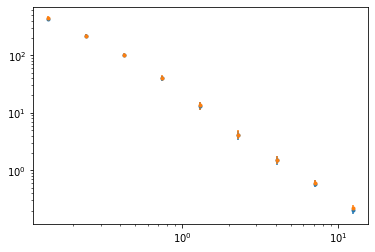

In [50]:
plt.errorbar(bincenters , cf_g1_mean,yerr = cf_g1_std,fmt='.')
plt.errorbar(bincenters , cf_g1,yerr = cf_g1_std,fmt='.')
plt.xscale('log')
plt.yscale('log')

In [51]:
from Corrfunc.theory.DD import DD
autocorr = 1
nthreads=2
N = len(g2_1)
X =g2_1[:,0]
Y =  g2_1[:,1]
Z =  g2_1[:,2]


#################################
dd = DD(autocorr, nthreads, bins, X, Y,Z,periodic=False, verbose=True)

rand_N = 3*N
rand_X =np.float32(np.random.uniform(np.amin(X), np.amax(X), rand_N))
rand_Y =np.float32(np.random.uniform(np.amin(Y), np.amax(Y), rand_N))
rand_Z = np.float32(np.random.uniform(np.amin(Z), np.amax(Z), rand_N))

autocorr = 0
nthreads=2
DR= DD(autocorr, nthreads, bins, X, Y, Z,X2 = rand_X, Y2 = rand_Y,Z2=rand_Z,periodic=False, verbose=True)

autocorr = 1
nthreads=2
RR = DD(autocorr, nthreads, bins, rand_X, rand_Y, rand_Z,periodic=False, verbose=True)
###################################

cf_g2_1 = convert_3d_counts_to_cf(N, N, 3*N, 3*N,dd, DR, DR, RR)


In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.002 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.020 secs
ND1 =        18990 [xmin,ymin,zmin] = [0.005680,0.008755,0.007152], [xmax,ymax,zmax] = [102.484665,102.497734,102.499306]
ND2 =        56970 [xmin,ymin,zmin] = [0.005680,0.008755,0.007152], [xmax,ymax,zmax] = [102.484665,102.497734,102.499306]
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.003 sec
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.005 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.061 secs
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.005 sec
0%.........10%.........20%.........30%.........40%....

In [52]:
from Corrfunc.theory.DD import DD
autocorr = 1
nthreads=2
N = len(g2_2)
X =g2_2[:,0]
Y =  g2_2[:,1]
Z =  g2_2[:,2]


#################################
dd = DD(autocorr, nthreads, bins, X, Y,Z,periodic=False, verbose=True)

rand_N = 3*N
rand_X =np.float32(np.random.uniform(np.amin(X), np.amax(X), rand_N))
rand_Y =np.float32(np.random.uniform(np.amin(Y), np.amax(Y), rand_N))
rand_Z = np.float32(np.random.uniform(np.amin(Z), np.amax(Z), rand_N))

autocorr = 0
nthreads=2
DR= DD(autocorr, nthreads, bins, X, Y, Z,X2 = rand_X, Y2 = rand_Y,Z2=rand_Z,periodic=False, verbose=True)

autocorr = 1
nthreads=2
RR = DD(autocorr, nthreads, bins, rand_X, rand_Y, rand_Z,periodic=False, verbose=True)
###################################

cf_g2_2 = convert_3d_counts_to_cf(N, N, 3*N, 3*N,dd, DR, DR, RR)


In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.003 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.026 secs
ND1 =        23845 [xmin,ymin,zmin] = [0.005554,0.002172,102.503014], [xmax,ymax,zmax] = [102.498665,102.498016,204.995804]
ND2 =        71535 [xmin,ymin,zmin] = [0.005554,0.002172,102.503014], [xmax,ymax,zmax] = [102.498665,102.498016,204.995804]
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.003 sec
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.006 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.081 secs
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.006 sec
0%.........10%.........20%.........30%.........40%

In [53]:
from Corrfunc.theory.DD import DD
autocorr = 1
nthreads=2
N = len(g2_3)
X =g2_3[:,0]
Y =  g2_3[:,1]
Z =  g2_3[:,2]


#################################
dd = DD(autocorr, nthreads, bins, X, Y,Z,periodic=False, verbose=True)

rand_N = 3*N
rand_X =np.float32(np.random.uniform(np.amin(X), np.amax(X), rand_N))
rand_Y =np.float32(np.random.uniform(np.amin(Y), np.amax(Y), rand_N))
rand_Z = np.float32(np.random.uniform(np.amin(Z), np.amax(Z), rand_N))

autocorr = 0
nthreads=2
DR= DD(autocorr, nthreads, bins, X, Y, Z,X2 = rand_X, Y2 = rand_Y,Z2=rand_Z,periodic=False, verbose=True)

autocorr = 1
nthreads=2
RR = DD(autocorr, nthreads, bins, rand_X, rand_Y, rand_Z,periodic=False, verbose=True)
###################################

cf_g2_3 = convert_3d_counts_to_cf(N, N, 3*N, 3*N,dd, DR, DR, RR)


In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.002 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.024 secs
ND1 =        20239 [xmin,ymin,zmin] = [0.006337,102.506363,0.002515], [xmax,ymax,zmax] = [102.497055,204.988739,102.474174]
ND2 =        60717 [xmin,ymin,zmin] = [0.006337,102.506363,0.002515], [xmax,ymax,zmax] = [102.497055,204.988739,102.474174]
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.003 sec
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.005 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.066 secs
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.005 sec
0%.........10%.........20%.........30%.........40%

In [54]:
from Corrfunc.theory.DD import DD
autocorr = 1
nthreads=2
N = len(g2_4)
X =g2_4[:,0]
Y =  g2_4[:,1]
Z =  g2_4[:,2]


#################################
dd = DD(autocorr, nthreads, bins, X, Y,Z,periodic=False, verbose=True)

rand_N = 3*N
rand_X =np.float32(np.random.uniform(np.amin(X), np.amax(X), rand_N))
rand_Y =np.float32(np.random.uniform(np.amin(Y), np.amax(Y), rand_N))
rand_Z = np.float32(np.random.uniform(np.amin(Z), np.amax(Z), rand_N))

autocorr = 0
nthreads=2
DR= DD(autocorr, nthreads, bins, X, Y, Z,X2 = rand_X, Y2 = rand_Y,Z2=rand_Z,periodic=False, verbose=True)

autocorr = 1
nthreads=2
RR = DD(autocorr, nthreads, bins, rand_X, rand_Y, rand_Z,periodic=False, verbose=True)
###################################

cf_g2_4 = convert_3d_counts_to_cf(N, N, 3*N, 3*N,dd, DR, DR, RR)


In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.002 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.022 secs
ND1 =        19572 [xmin,ymin,zmin] = [102.500130,0.000528,0.001221], [xmax,ymax,zmax] = [204.999954,102.497787,102.498299]
ND2 =        58716 [xmin,ymin,zmin] = [102.500130,0.000528,0.001221], [xmax,ymax,zmax] = [204.999954,102.497787,102.498299]
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.002 sec
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.004 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.064 secs
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.004 sec
0%.........10%.........20%.........30%.........40%

In [55]:
from Corrfunc.theory.DD import DD
autocorr = 1
nthreads=2
N = len(g2_5)
X =g2_5[:,0]
Y =  g2_5[:,1]
Z =  g2_5[:,2]


#################################
dd = DD(autocorr, nthreads, bins, X, Y,Z,periodic=False, verbose=True)

rand_N = 3*N
rand_X =np.float32(np.random.uniform(np.amin(X), np.amax(X), rand_N))
rand_Y =np.float32(np.random.uniform(np.amin(Y), np.amax(Y), rand_N))
rand_Z = np.float32(np.random.uniform(np.amin(Z), np.amax(Z), rand_N))

autocorr = 0
nthreads=2
DR= DD(autocorr, nthreads, bins, X, Y, Z,X2 = rand_X, Y2 = rand_Y,Z2=rand_Z,periodic=False, verbose=True)

autocorr = 1
nthreads=2
RR = DD(autocorr, nthreads, bins, rand_X, rand_Y, rand_Z,periodic=False, verbose=True)
###################################

cf_g2_5 = convert_3d_counts_to_cf(N, N, 3*N, 3*N,dd, DR, DR, RR)


In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.002 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.019 secs
ND1 =        16554 [xmin,ymin,zmin] = [102.500931,102.500633,0.003151], [xmax,ymax,zmax] = [204.998932,204.990692,102.498596]
ND2 =        49662 [xmin,ymin,zmin] = [102.500931,102.500633,0.003151], [xmax,ymax,zmax] = [204.998932,204.990692,102.498596]
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.002 sec
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.004 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.053 secs
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.004 sec
0%.........10%.........20%.........30%........

In [56]:
from Corrfunc.theory.DD import DD
autocorr = 1
nthreads=2
N = len(g2_6)
X =g2_6[:,0]
Y =  g2_6[:,1]
Z =  g2_6[:,2]


#################################
dd = DD(autocorr, nthreads, bins, X, Y,Z,periodic=False, verbose=True)

rand_N = 3*N
rand_X =np.float32(np.random.uniform(np.amin(X), np.amax(X), rand_N))
rand_Y =np.float32(np.random.uniform(np.amin(Y), np.amax(Y), rand_N))
rand_Z = np.float32(np.random.uniform(np.amin(Z), np.amax(Z), rand_N))

autocorr = 0
nthreads=2
DR= DD(autocorr, nthreads, bins, X, Y, Z,X2 = rand_X, Y2 = rand_Y,Z2=rand_Z,periodic=False, verbose=True)

autocorr = 1
nthreads=2
RR = DD(autocorr, nthreads, bins, rand_X, rand_Y, rand_Z,periodic=False, verbose=True)
###################################

cf_g2_6 = convert_3d_counts_to_cf(N, N, 3*N, 3*N,dd, DR, DR, RR)


In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.002 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.027 secs
ND1 =        20573 [xmin,ymin,zmin] = [102.520523,0.002054,102.501442], [xmax,ymax,zmax] = [204.996765,102.494850,204.998215]
ND2 =        61719 [xmin,ymin,zmin] = [102.520523,0.002054,102.501442], [xmax,ymax,zmax] = [204.996765,102.494850,204.998215]
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.003 sec
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.005 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.076 secs
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.005 sec
0%.........10%.........20%.........30%........

In [57]:
from Corrfunc.theory.DD import DD
autocorr = 1
nthreads=2
N = len(g2_7)
X =g2_7[:,0]
Y =  g2_7[:,1]
Z =  g2_7[:,2]


#################################
dd = DD(autocorr, nthreads, bins, X, Y,Z,periodic=False, verbose=True)

rand_N = 3*N
rand_X =np.float32(np.random.uniform(np.amin(X), np.amax(X), rand_N))
rand_Y =np.float32(np.random.uniform(np.amin(Y), np.amax(Y), rand_N))
rand_Z = np.float32(np.random.uniform(np.amin(Z), np.amax(Z), rand_N))

autocorr = 0
nthreads=2
DR= DD(autocorr, nthreads, bins, X, Y, Z,X2 = rand_X, Y2 = rand_Y,Z2=rand_Z,periodic=False, verbose=True)

autocorr = 1
nthreads=2
RR = DD(autocorr, nthreads, bins, rand_X, rand_Y, rand_Z,periodic=False, verbose=True)
###################################

cf_g2_7 = convert_3d_counts_to_cf(N, N, 3*N, 3*N,dd, DR, DR, RR)


In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.002 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.023 secs
ND1 =        19188 [xmin,ymin,zmin] = [0.002434,102.501686,102.508438], [xmax,ymax,zmax] = [102.475822,204.990067,204.997360]
ND2 =        57564 [xmin,ymin,zmin] = [0.002434,102.501686,102.508438], [xmax,ymax,zmax] = [102.475822,204.990067,204.997360]
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.002 sec
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.005 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.060 secs
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.005 sec
0%.........10%.........20%.........30%........

In [58]:
from Corrfunc.theory.DD import DD
autocorr = 1
nthreads=2
N = len(g2_8)
X =g2_8[:,0]
Y =  g2_8[:,1]
Z =  g2_8[:,2]


#################################
dd = DD(autocorr, nthreads, bins, X, Y,Z,periodic=False, verbose=True)

rand_N = 3*N
rand_X =np.float32(np.random.uniform(np.amin(X), np.amax(X), rand_N))
rand_Y =np.float32(np.random.uniform(np.amin(Y), np.amax(Y), rand_N))
rand_Z = np.float32(np.random.uniform(np.amin(Z), np.amax(Z), rand_N))

autocorr = 0
nthreads=2
DR= DD(autocorr, nthreads, bins, X, Y, Z,X2 = rand_X, Y2 = rand_Y,Z2=rand_Z,periodic=False, verbose=True)

autocorr = 1
nthreads=2
RR = DD(autocorr, nthreads, bins, rand_X, rand_Y, rand_Z,periodic=False, verbose=True)
###################################

cf_g2_8 = convert_3d_counts_to_cf(N, N, 3*N, 3*N,dd, DR, DR, RR)


In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.002 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.020 secs
ND1 =        18252 [xmin,ymin,zmin] = [102.509827,102.506386,102.507675], [xmax,ymax,zmax] = [204.997833,204.991623,204.995407]
ND2 =        54756 [xmin,ymin,zmin] = [102.509827,102.506386,102.507675], [xmax,ymax,zmax] = [204.997833,204.991623,204.995407]
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.002 sec
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.003 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.059 secs
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.003 sec
0%.........10%.........20%.........30%....

In [59]:
cf_g2_mean= np.mean((cf_g2_1,cf_g2_2,cf_g2_3,cf_g2_4,cf_g2_5,cf_g2_6,cf_g2_7,cf_g2_8),axis = 0)

In [60]:
cf_g2_std = np.std((cf_g2_1,cf_g2_2,cf_g2_3,cf_g2_4,cf_g2_5,cf_g2_6,cf_g2_7,cf_g2_8),axis = 0)

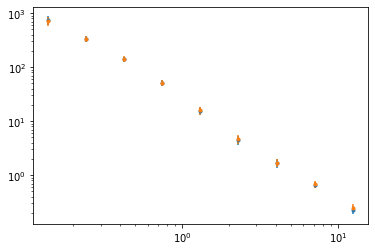

In [61]:
plt.errorbar(bincenters , cf_g2_mean,yerr = cf_g2_std,fmt='.')
plt.errorbar(bincenters , cf_g2,yerr = cf_g2_std,fmt='.')
plt.xscale('log')
plt.yscale('log')

In [62]:
from Corrfunc.theory.DD import DD
autocorr = 1
nthreads=2
N = len(g3_1)
X =g3_1[:,0]
Y =  g3_1[:,1]
Z =  g3_1[:,2]


#################################
dd = DD(autocorr, nthreads, bins, X, Y,Z,periodic=False, verbose=True)

rand_N = 3*N
rand_X =np.float32(np.random.uniform(np.amin(X), np.amax(X), rand_N))
rand_Y =np.float32(np.random.uniform(np.amin(Y), np.amax(Y), rand_N))
rand_Z = np.float32(np.random.uniform(np.amin(Z), np.amax(Z), rand_N))

autocorr = 0
nthreads=2
DR= DD(autocorr, nthreads, bins, X, Y, Z,X2 = rand_X, Y2 = rand_Y,Z2=rand_Z,periodic=False, verbose=True)

autocorr = 1
nthreads=2
RR = DD(autocorr, nthreads, bins, rand_X, rand_Y, rand_Z,periodic=False, verbose=True)
###################################

cf_g3_1 = convert_3d_counts_to_cf(N, N, 3*N, 3*N,dd, DR, DR, RR)


In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.001 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.007 secs
ND1 =         7362 [xmin,ymin,zmin] = [0.021674,0.012752,0.001462], [xmax,ymax,zmax] = [102.499870,102.493378,102.492851]
ND2 =        22086 [xmin,ymin,zmin] = [0.021674,0.012752,0.001462], [xmax,ymax,zmax] = [102.499870,102.493378,102.492851]
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.002 sec
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.002 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.024 secs
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.002 sec
0%.........10%.........20%.........30%.........40%....

In [63]:
from Corrfunc.theory.DD import DD
autocorr = 1
nthreads=2
N = len(g3_2)
X =g3_2[:,0]
Y =  g3_2[:,1]
Z =  g3_2[:,2]


#################################
dd = DD(autocorr, nthreads, bins, X, Y,Z,periodic=False, verbose=True)

rand_N = 3*N
rand_X =np.float32(np.random.uniform(np.amin(X), np.amax(X), rand_N))
rand_Y =np.float32(np.random.uniform(np.amin(Y), np.amax(Y), rand_N))
rand_Z = np.float32(np.random.uniform(np.amin(Z), np.amax(Z), rand_N))

autocorr = 0
nthreads=2
DR= DD(autocorr, nthreads, bins, X, Y, Z,X2 = rand_X, Y2 = rand_Y,Z2=rand_Z,periodic=False, verbose=True)

autocorr = 1
nthreads=2
RR = DD(autocorr, nthreads, bins, rand_X, rand_Y, rand_Z,periodic=False, verbose=True)
###################################

cf_g3_2 = convert_3d_counts_to_cf(N, N, 3*N, 3*N,dd, DR, DR, RR)


In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.001 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.010 secs
ND1 =         9377 [xmin,ymin,zmin] = [0.006556,0.010074,102.500938], [xmax,ymax,zmax] = [102.481812,102.494408,204.998276]
ND2 =        28131 [xmin,ymin,zmin] = [0.006556,0.010074,102.500938], [xmax,ymax,zmax] = [102.481812,102.494408,204.998276]
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.002 sec
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.002 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.029 secs
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.002 sec
0%.........10%.........20%.........30%.........40%

In [64]:
from Corrfunc.theory.DD import DD
autocorr = 1
nthreads=2
N = len(g3_3)
X =g3_3[:,0]
Y =  g3_3[:,1]
Z =  g3_3[:,2]


#################################
dd = DD(autocorr, nthreads, bins, X, Y,Z,periodic=False, verbose=True)

rand_N = 3*N
rand_X =np.float32(np.random.uniform(np.amin(X), np.amax(X), rand_N))
rand_Y =np.float32(np.random.uniform(np.amin(Y), np.amax(Y), rand_N))
rand_Z = np.float32(np.random.uniform(np.amin(Z), np.amax(Z), rand_N))

autocorr = 0
nthreads=2
DR= DD(autocorr, nthreads, bins, X, Y, Z,X2 = rand_X, Y2 = rand_Y,Z2=rand_Z,periodic=False, verbose=True)

autocorr = 1
nthreads=2
RR = DD(autocorr, nthreads, bins, rand_X, rand_Y, rand_Z,periodic=False, verbose=True)
###################################

cf_g3_3 = convert_3d_counts_to_cf(N, N, 3*N, 3*N,dd, DR, DR, RR)


In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.001 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.008 secs
ND1 =         7942 [xmin,ymin,zmin] = [0.002758,102.507347,0.010231], [xmax,ymax,zmax] = [102.497826,204.991425,102.499763]
ND2 =        23826 [xmin,ymin,zmin] = [0.002758,102.507347,0.010231], [xmax,ymax,zmax] = [102.497826,204.991425,102.499763]
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.001 sec
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.002 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.025 secs
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.002 sec
0%.........10%.........20%.........30%.........40%

In [65]:
from Corrfunc.theory.DD import DD
autocorr = 1
nthreads=2
N = len(g3_4)
X =g3_4[:,0]
Y =  g3_4[:,1]
Z =  g3_4[:,2]


#################################
dd = DD(autocorr, nthreads, bins, X, Y,Z,periodic=False, verbose=True)

rand_N = 3*N
rand_X =np.float32(np.random.uniform(np.amin(X), np.amax(X), rand_N))
rand_Y =np.float32(np.random.uniform(np.amin(Y), np.amax(Y), rand_N))
rand_Z = np.float32(np.random.uniform(np.amin(Z), np.amax(Z), rand_N))

autocorr = 0
nthreads=2
DR= DD(autocorr, nthreads, bins, X, Y, Z,X2 = rand_X, Y2 = rand_Y,Z2=rand_Z,periodic=False, verbose=True)

autocorr = 1
nthreads=2
RR = DD(autocorr, nthreads, bins, rand_X, rand_Y, rand_Z,periodic=False, verbose=True)
###################################

cf_g3_4 = convert_3d_counts_to_cf(N, N, 3*N, 3*N,dd, DR, DR, RR)


In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.001 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.008 secs
ND1 =         7681 [xmin,ymin,zmin] = [102.517479,0.033242,0.022314], [xmax,ymax,zmax] = [204.997574,102.463860,102.495926]
ND2 =        23043 [xmin,ymin,zmin] = [102.517479,0.033242,0.022314], [xmax,ymax,zmax] = [204.997574,102.463860,102.495926]
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.002 sec
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.002 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.027 secs
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.002 sec
0%.........10%.........20%.........30%.........40%

In [66]:
from Corrfunc.theory.DD import DD
autocorr = 1
nthreads=2
N = len(g3_5)
X =g3_5[:,0]
Y =  g3_5[:,1]
Z =  g3_5[:,2]


#################################
dd = DD(autocorr, nthreads, bins, X, Y,Z,periodic=False, verbose=True)

rand_N = 3*N
rand_X =np.float32(np.random.uniform(np.amin(X), np.amax(X), rand_N))
rand_Y =np.float32(np.random.uniform(np.amin(Y), np.amax(Y), rand_N))
rand_Z = np.float32(np.random.uniform(np.amin(Z), np.amax(Z), rand_N))

autocorr = 0
nthreads=2
DR= DD(autocorr, nthreads, bins, X, Y, Z,X2 = rand_X, Y2 = rand_Y,Z2=rand_Z,periodic=False, verbose=True)

autocorr = 1
nthreads=2
RR = DD(autocorr, nthreads, bins, rand_X, rand_Y, rand_Z,periodic=False, verbose=True)
###################################

cf_g3_5 = convert_3d_counts_to_cf(N, N, 3*N, 3*N,dd, DR, DR, RR)


In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.001 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.006 secs
ND1 =         6412 [xmin,ymin,zmin] = [102.515457,102.505447,0.024690], [xmax,ymax,zmax] = [204.992371,204.987366,102.489220]
ND2 =        19236 [xmin,ymin,zmin] = [102.515457,102.505447,0.024690], [xmax,ymax,zmax] = [204.992371,204.987366,102.489220]
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.001 sec
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.002 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.021 secs
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.002 sec
0%.........10%.........20%.........30%........

In [67]:
from Corrfunc.theory.DD import DD
autocorr = 1
nthreads=2
N = len(g3_6)
X =g3_6[:,0]
Y =  g3_6[:,1]
Z =  g3_6[:,2]


#################################
dd = DD(autocorr, nthreads, bins, X, Y,Z,periodic=False, verbose=True)

rand_N = 3*N
rand_X =np.float32(np.random.uniform(np.amin(X), np.amax(X), rand_N))
rand_Y =np.float32(np.random.uniform(np.amin(Y), np.amax(Y), rand_N))
rand_Z = np.float32(np.random.uniform(np.amin(Z), np.amax(Z), rand_N))

autocorr = 0
nthreads=2
DR= DD(autocorr, nthreads, bins, X, Y, Z,X2 = rand_X, Y2 = rand_Y,Z2=rand_Z,periodic=False, verbose=True)

autocorr = 1
nthreads=2
RR = DD(autocorr, nthreads, bins, rand_X, rand_Y, rand_Z,periodic=False, verbose=True)
###################################

cf_g3_6 = convert_3d_counts_to_cf(N, N, 3*N, 3*N,dd, DR, DR, RR)


In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.001 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.009 secs
ND1 =         8159 [xmin,ymin,zmin] = [102.502876,0.011565,102.520584], [xmax,ymax,zmax] = [204.995865,102.499680,204.985886]
ND2 =        24477 [xmin,ymin,zmin] = [102.502876,0.011565,102.520584], [xmax,ymax,zmax] = [204.995865,102.499680,204.985886]
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.002 sec
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.002 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.028 secs
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.002 sec
0%.........10%.........20%.........30%........

In [68]:
from Corrfunc.theory.DD import DD
autocorr = 1
nthreads=2
N = len(g3_7)
X =g3_7[:,0]
Y =  g3_7[:,1]
Z =  g3_7[:,2]


#################################
dd = DD(autocorr, nthreads, bins, X, Y,Z,periodic=False, verbose=True)

rand_N = 3*N
rand_X =np.float32(np.random.uniform(np.amin(X), np.amax(X), rand_N))
rand_Y =np.float32(np.random.uniform(np.amin(Y), np.amax(Y), rand_N))
rand_Z = np.float32(np.random.uniform(np.amin(Z), np.amax(Z), rand_N))

autocorr = 0
nthreads=2
DR= DD(autocorr, nthreads, bins, X, Y, Z,X2 = rand_X, Y2 = rand_Y,Z2=rand_Z,periodic=False, verbose=True)

autocorr = 1
nthreads=2
RR = DD(autocorr, nthreads, bins, rand_X, rand_Y, rand_Z,periodic=False, verbose=True)
###################################

cf_g3_7 = convert_3d_counts_to_cf(N, N, 3*N, 3*N,dd, DR, DR, RR)


In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.002 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.008 secs
ND1 =         7390 [xmin,ymin,zmin] = [0.001039,102.506706,102.500679], [xmax,ymax,zmax] = [102.481888,204.969650,204.992157]
ND2 =        22170 [xmin,ymin,zmin] = [0.001039,102.506706,102.500679], [xmax,ymax,zmax] = [102.481888,204.969650,204.992157]
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.001 sec
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.002 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.023 secs
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.002 sec
0%.........10%.........20%.........30%........

In [69]:
from Corrfunc.theory.DD import DD
autocorr = 1
nthreads=2
N = len(g3_8)
X =g3_8[:,0]
Y =  g3_8[:,1]
Z =  g3_8[:,2]


#################################
dd = DD(autocorr, nthreads, bins, X, Y,Z,periodic=False, verbose=True)

rand_N = 3*N
rand_X =np.float32(np.random.uniform(np.amin(X), np.amax(X), rand_N))
rand_Y =np.float32(np.random.uniform(np.amin(Y), np.amax(Y), rand_N))
rand_Z = np.float32(np.random.uniform(np.amin(Z), np.amax(Z), rand_N))

autocorr = 0
nthreads=2
DR= DD(autocorr, nthreads, bins, X, Y, Z,X2 = rand_X, Y2 = rand_Y,Z2=rand_Z,periodic=False, verbose=True)

autocorr = 1
nthreads=2
RR = DD(autocorr, nthreads, bins, rand_X, rand_Y, rand_Z,periodic=False, verbose=True)
###################################

cf_g3_8 = convert_3d_counts_to_cf(N, N, 3*N, 3*N,dd, DR, DR, RR)


In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.002 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.008 secs
ND1 =         7109 [xmin,ymin,zmin] = [102.510323,102.504135,102.506767], [xmax,ymax,zmax] = [204.999390,204.991760,204.920746]
ND2 =        21327 [xmin,ymin,zmin] = [102.510323,102.504135,102.506767], [xmax,ymax,zmax] = [204.999390,204.991760,204.920746]
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.001 sec
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.001 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.023 secs
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.002 sec
0%.........10%.........20%.........30%....

In [70]:
cf_g3_mean= np.mean((cf_g3_1,cf_g3_2,cf_g3_3,cf_g3_4,cf_g3_5,cf_g3_6,cf_g3_7,cf_g3_8),axis = 0)

In [71]:
cf_g3_std = np.std((cf_g3_1,cf_g3_2,cf_g3_3,cf_g3_4,cf_g3_5,cf_g3_6,cf_g3_7,cf_g3_8),axis = 0)

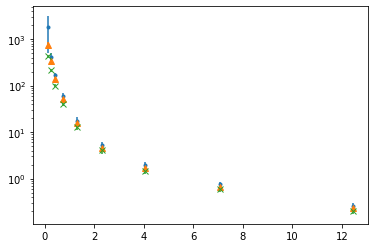

In [72]:
plt.errorbar(bincenters , cf_g3_mean,yerr = cf_g3_std,fmt='.')
plt.errorbar(bincenters , cf_g2_mean,yerr = cf_g2_std,fmt='^')
plt.errorbar(bincenters , cf_g1_mean,yerr = cf_g1_std,fmt='x')
#plt.errorbar(bincenters , cf_g3,yerr = cf_g3_std,fmt='.')
#plt.xscale('log')
plt.yscale('log')

In [73]:
from Corrfunc.theory.DD import DD
autocorr = 1
nthreads=2
N = len(g4_1)
X =g4_1[:,0]
Y =  g4_1[:,1]
Z =  g4_1[:,2]


#################################
dd = DD(autocorr, nthreads, bins, X, Y,Z,periodic=False, verbose=True)

rand_N = 3*N
rand_X =np.float32(np.random.uniform(np.amin(X), np.amax(X), rand_N))
rand_Y =np.float32(np.random.uniform(np.amin(Y), np.amax(Y), rand_N))
rand_Z = np.float32(np.random.uniform(np.amin(Z), np.amax(Z), rand_N))

autocorr = 0
nthreads=2
DR= DD(autocorr, nthreads, bins, X, Y, Z,X2 = rand_X, Y2 = rand_Y,Z2=rand_Z,periodic=False, verbose=True)

autocorr = 1
nthreads=2
RR = DD(autocorr, nthreads, bins, rand_X, rand_Y, rand_Z,periodic=False, verbose=True)
###################################

cf_g4_1 = convert_3d_counts_to_cf(N, N, 3*N, 3*N,dd, DR, DR, RR)


In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.001 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.001 secs
ND1 =          291 [xmin,ymin,zmin] = [0.495794,0.498890,0.388897], [xmax,ymax,zmax] = [102.151291,101.205826,102.476906]
ND2 =          873 [xmin,ymin,zmin] = [0.495794,0.498890,0.388897], [xmax,ymax,zmax] = [102.151291,101.205826,102.476906]
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.000 sec
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.000 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.001 secs
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.001 sec
0%.........10%.........20%.........30%.........40%....

In [282]:
from Corrfunc.theory.DD import DD
autocorr = 1
nthreads=2
N = len(g4_2)
X =g4_2[:,0]
Y =  g4_2[:,1]
Z =  g4_2[:,2]


#################################
dd = DD(autocorr, nthreads, bins, X, Y,Z,periodic=False, verbose=True)

rand_N = 3*N
rand_X =np.float32(np.random.uniform(np.amin(X), np.amax(X), rand_N))
rand_Y =np.float32(np.random.uniform(np.amin(Y), np.amax(Y), rand_N))
rand_Z = np.float32(np.random.uniform(np.amin(Z), np.amax(Z), rand_N))

autocorr = 0
nthreads=2
DR= DD(autocorr, nthreads, bins, X, Y, Z,X2 = rand_X, Y2 = rand_Y,Z2=rand_Z,periodic=False, verbose=True)

autocorr = 1
nthreads=2
RR = DD(autocorr, nthreads, bins, rand_X, rand_Y, rand_Z,periodic=False, verbose=True)
###################################

cf_g4_2 = convert_3d_counts_to_cf(N, N, 3*N, 3*N,dd, DR, DR, RR)


In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.001 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%........100% done. Time taken =  0.000 secs
ND1 =           68 [xmin,ymin,zmin] = [3.075464,0.839661,108.450493], [xmax,ymax,zmax] = [101.623352,101.893967,204.930237]
ND2 =          204 [xmin,ymin,zmin] = [3.075464,0.839661,108.450493], [xmax,ymax,zmax] = [101.623352,101.893967,204.930237]
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.001 sec
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.001 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.001 secs
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,5.  Time taken =   0.000 sec
0%.........10%.........20%.........30%.........40%.

In [283]:
from Corrfunc.theory.DD import DD
autocorr = 1
nthreads=2
N = len(g4_3)
X =g4_3[:,0]
Y =  g4_3[:,1]
Z =  g4_3[:,2]


#################################
dd = DD(autocorr, nthreads, bins, X, Y,Z,periodic=False, verbose=True)

rand_N = 3*N
rand_X =np.float32(np.random.uniform(np.amin(X), np.amax(X), rand_N))
rand_Y =np.float32(np.random.uniform(np.amin(Y), np.amax(Y), rand_N))
rand_Z = np.float32(np.random.uniform(np.amin(Z), np.amax(Z), rand_N))

autocorr = 0
nthreads=2
DR= DD(autocorr, nthreads, bins, X, Y, Z,X2 = rand_X, Y2 = rand_Y,Z2=rand_Z,periodic=False, verbose=True)

autocorr = 1
nthreads=2
RR = DD(autocorr, nthreads, bins, rand_X, rand_Y, rand_Z,periodic=False, verbose=True)
###################################

cf_g4_3 = convert_3d_counts_to_cf(N, N, 3*N, 3*N,dd, DR, DR, RR)


In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.001 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%........100% done. Time taken =  0.000 secs
ND1 =           64 [xmin,ymin,zmin] = [2.897831,103.107941,2.552618], [xmax,ymax,zmax] = [100.867844,202.369080,102.052185]
ND2 =          192 [xmin,ymin,zmin] = [2.897831,103.107941,2.552618], [xmax,ymax,zmax] = [100.867844,202.369080,102.052185]
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.001 sec
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.000 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%........100% done. Time taken =  0.001 secs
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.001 sec
0%.........10%.........20%.........30%.........40%..

In [284]:
from Corrfunc.theory.DD import DD
autocorr = 1
nthreads=2
N = len(g4_4)
X =g4_4[:,0]
Y =  g4_4[:,1]
Z =  g4_4[:,2]


#################################
dd = DD(autocorr, nthreads, bins, X, Y,Z,periodic=False, verbose=True)

rand_N = 3*N
rand_X =np.float32(np.random.uniform(np.amin(X), np.amax(X), rand_N))
rand_Y =np.float32(np.random.uniform(np.amin(Y), np.amax(Y), rand_N))
rand_Z = np.float32(np.random.uniform(np.amin(Z), np.amax(Z), rand_N))

autocorr = 0
nthreads=2
DR= DD(autocorr, nthreads, bins, X, Y, Z,X2 = rand_X, Y2 = rand_Y,Z2=rand_Z,periodic=False, verbose=True)

autocorr = 1
nthreads=2
RR = DD(autocorr, nthreads, bins, rand_X, rand_Y, rand_Z,periodic=False, verbose=True)
###################################

cf_g4_4 = convert_3d_counts_to_cf(N, N, 3*N, 3*N,dd, DR, DR, RR)


In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,11,5.  Time taken =   0.003 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%........100% done. Time taken =  0.000 secs
ND1 =           44 [xmin,ymin,zmin] = [103.281303,6.065675,1.760164], [xmax,ymax,zmax] = [203.274612,99.515541,91.708321]
ND2 =          132 [xmin,ymin,zmin] = [103.281303,6.065675,1.760164], [xmax,ymax,zmax] = [203.274612,99.515541,91.708321]
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,11,5.  Time taken =   0.000 sec
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,11,5.  Time taken =   0.000 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%....100% done. Time taken =  0.000 secs
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,11,5.  Time taken =   0.000 sec
0%.........10%.........20%.........30%.........40%.........5

In [285]:
from Corrfunc.theory.DD import DD
autocorr = 1
nthreads=2
N = len(g4_5)
X =g4_5[:,0]
Y =  g4_5[:,1]
Z =  g4_5[:,2]


#################################
dd = DD(autocorr, nthreads, bins, X, Y,Z,periodic=False, verbose=True)

rand_N = 3*N
rand_X =np.float32(np.random.uniform(np.amin(X), np.amax(X), rand_N))
rand_Y =np.float32(np.random.uniform(np.amin(Y), np.amax(Y), rand_N))
rand_Z = np.float32(np.random.uniform(np.amin(Z), np.amax(Z), rand_N))

autocorr = 0
nthreads=2
DR= DD(autocorr, nthreads, bins, X, Y, Z,X2 = rand_X, Y2 = rand_Y,Z2=rand_Z,periodic=False, verbose=True)

autocorr = 1
nthreads=2
RR = DD(autocorr, nthreads, bins, rand_X, rand_Y, rand_Z,periodic=False, verbose=True)
###################################

cf_g4_5 = convert_3d_counts_to_cf(N, N, 3*N, 3*N,dd, DR, DR, RR)


In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 11,11,6.  Time taken =   0.001 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.......100% done. Time taken =  0.000 secs
ND1 =           31 [xmin,ymin,zmin] = [109.894310,102.958115,4.074272], [xmax,ymax,zmax] = [202.037643,190.933243,101.418304]
ND2 =           93 [xmin,ymin,zmin] = [109.894310,102.958115,4.074272], [xmax,ymax,zmax] = [202.037643,190.933243,101.418304]
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 11,11,6.  Time taken =   0.001 sec
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 11,11,6.  Time taken =   0.001 sec
0%.100% done. Time taken =  0.001 secs
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 11,10,6.  Time taken =   0.000 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.......100% done. Time taken =  0.000 secs


In [286]:
from Corrfunc.theory.DD import DD
autocorr = 1
nthreads=2
N = len(g4_6)
X =g4_6[:,0]
Y =  g4_6[:,1]
Z =  g4_6[:,2]


#################################
dd = DD(autocorr, nthreads, bins, X, Y,Z,periodic=False, verbose=True)

rand_N = 3*N
rand_X =np.float32(np.random.uniform(np.amin(X), np.amax(X), rand_N))
rand_Y =np.float32(np.random.uniform(np.amin(Y), np.amax(Y), rand_N))
rand_Z = np.float32(np.random.uniform(np.amin(Z), np.amax(Z), rand_N))

autocorr = 0
nthreads=2
DR= DD(autocorr, nthreads, bins, X, Y, Z,X2 = rand_X, Y2 = rand_Y,Z2=rand_Z,periodic=False, verbose=True)

autocorr = 1
nthreads=2
RR = DD(autocorr, nthreads, bins, rand_X, rand_Y, rand_Z,periodic=False, verbose=True)
###################################

cf_g4_6 = convert_3d_counts_to_cf(N, N, 3*N, 3*N,dd, DR, DR, RR)


In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,11,6.  Time taken =   0.001 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%......100% done. Time taken =  0.000 secs
ND1 =           53 [xmin,ymin,zmin] = [103.420639,7.203955,104.166084], [xmax,ymax,zmax] = [204.254456,100.953362,203.494751]
ND2 =          159 [xmin,ymin,zmin] = [103.420639,7.203955,104.166084], [xmax,ymax,zmax] = [204.254456,100.953362,203.494751]
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,11,6.  Time taken =   0.000 sec
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,11,6.  Time taken =   0.000 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.000 secs
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,11,6.  Time taken =   0.000 sec
0%.........10%.........20%.........30%.........40

In [287]:
from Corrfunc.theory.DD import DD
autocorr = 1
nthreads=2
N = len(g4_7)
X =g4_7[:,0]
Y =  g4_7[:,1]
Z =  g4_7[:,2]


#################################
dd = DD(autocorr, nthreads, bins, X, Y,Z,periodic=False, verbose=True)

rand_N = 3*N
rand_X =np.float32(np.random.uniform(np.amin(X), np.amax(X), rand_N))
rand_Y =np.float32(np.random.uniform(np.amin(Y), np.amax(Y), rand_N))
rand_Z = np.float32(np.random.uniform(np.amin(Z), np.amax(Z), rand_N))

autocorr = 0
nthreads=2
DR= DD(autocorr, nthreads, bins, X, Y, Z,X2 = rand_X, Y2 = rand_Y,Z2=rand_Z,periodic=False, verbose=True)

autocorr = 1
nthreads=2
RR = DD(autocorr, nthreads, bins, rand_X, rand_Y, rand_Z,periodic=False, verbose=True)
###################################

cf_g4_7 = convert_3d_counts_to_cf(N, N, 3*N, 3*N,dd, DR, DR, RR)


In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.001 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%..100% done. Time taken =  0.000 secs
ND1 =           38 [xmin,ymin,zmin] = [0.660406,102.985893,104.567719], [xmax,ymax,zmax] = [100.924438,200.660080,201.071564]
ND2 =          114 [xmin,ymin,zmin] = [0.660406,102.985893,104.567719], [xmax,ymax,zmax] = [100.924438,200.660080,201.071564]
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.001 sec
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,6.  Time taken =   0.001 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.......100% done. Time taken =  0.001 secs
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 12,12,5.  Time taken =   0.000 sec
0%.........10%.........20%.........30%.........40%.....

In [288]:
from Corrfunc.theory.DD import DD
autocorr = 1
nthreads=2
N = len(g4_8)
X =g4_8[:,0]
Y =  g4_8[:,1]
Z =  g4_8[:,2]


#################################
dd = DD(autocorr, nthreads, bins, X, Y,Z,periodic=False, verbose=True)

rand_N = 3*N
rand_X =np.float32(np.random.uniform(np.amin(X), np.amax(X), rand_N))
rand_Y =np.float32(np.random.uniform(np.amin(Y), np.amax(Y), rand_N))
rand_Z = np.float32(np.random.uniform(np.amin(Z), np.amax(Z), rand_N))

autocorr = 0
nthreads=2
DR= DD(autocorr, nthreads, bins, X, Y, Z,X2 = rand_X, Y2 = rand_Y,Z2=rand_Z,periodic=False, verbose=True)

autocorr = 1
nthreads=2
RR = DD(autocorr, nthreads, bins, rand_X, rand_Y, rand_Z,periodic=False, verbose=True)
###################################

cf_g4_8 = convert_3d_counts_to_cf(N, N, 3*N, 3*N,dd, DR, DR, RR)


In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 11,12,6.  Time taken =   0.001 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.100% done. Time taken =  0.000 secs
ND1 =           45 [xmin,ymin,zmin] = [110.213135,105.315498,103.608376], [xmax,ymax,zmax] = [204.287323,204.065689,203.298309]
ND2 =          135 [xmin,ymin,zmin] = [110.213135,105.315498,103.608376], [xmax,ymax,zmax] = [204.287323,204.065689,203.298309]
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 11,12,6.  Time taken =   0.000 sec
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 11,12,6.  Time taken =   0.001 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%......100% done. Time taken =  0.001 secs
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 11,12,6.  Time taken =   0.001 sec
0%.........10%.........20%.........30%.........40%...

In [289]:
cf_g4_mean= np.mean((cf_g4_1,cf_g4_2,cf_g4_3,cf_g4_4,cf_g4_5,cf_g4_6,cf_g4_7,cf_g4_8),axis = 0)

In [290]:
cf_g4_std = np.std((cf_g4_1,cf_g4_2,cf_g4_3,cf_g4_4,cf_g4_5,cf_g4_6,cf_g4_7,cf_g4_8),axis = 0)

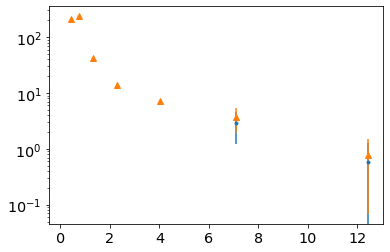

In [291]:
plt.errorbar(bincenters , cf_g4_mean,yerr = cf_g4_std,fmt='.')
plt.errorbar(bincenters , cf_g4,yerr = cf_g4_std,fmt='^')
#plt.errorbar(bincenters , cf_g1_mean,yerr = cf_g1_std,fmt='x')
#plt.errorbar(bincenters , cf_g3,yerr = cf_g3_std,fmt='.')
#plt.xscale('log')
plt.yscale('log')

In [74]:
from scipy import stats
s_g1, int_g1,a,b,z = stats.linregress(np.log10(bincenters),np.log10(cf_g1_mean))

s_g2, int_g2,a,b,z = stats.linregress(np.log10(bincenters),np.log10(cf_g2_mean))
s_g3, int_g3,a,b,z = stats.linregress(np.log10(bincenters[2:]),np.log10(cf_g3_mean[2:]))


In [75]:
cf_g3_mean

array([1.80502143e+03, 4.16101964e+02, 1.72237108e+02, 5.86530213e+01,
       1.73758426e+01, 5.27027613e+00, 1.96806864e+00, 7.58058065e-01,
       2.52318276e-01])

In [76]:
gamma_g1 = -s_g1
gamma_g2 = -s_g2
r_g1= 10**(int_g1/gamma_g1)
r_g2= 10**(int_g2/gamma_g2)


gamma_g3 = -s_g3

r_g3= 10**(int_g3/gamma_g3)


In [77]:
r_red_8_5

NameError: name 'r_red_8_5' is not defined

In [78]:
xi_g1 = (bincenters/r_g1)**(-gamma_g1)
xi_g2= (bincenters/r_g2)**(-gamma_g2)

xi_g3 = (bincenters/r_g3)**(-gamma_g3)


# 

<ErrorbarContainer object of 3 artists>

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


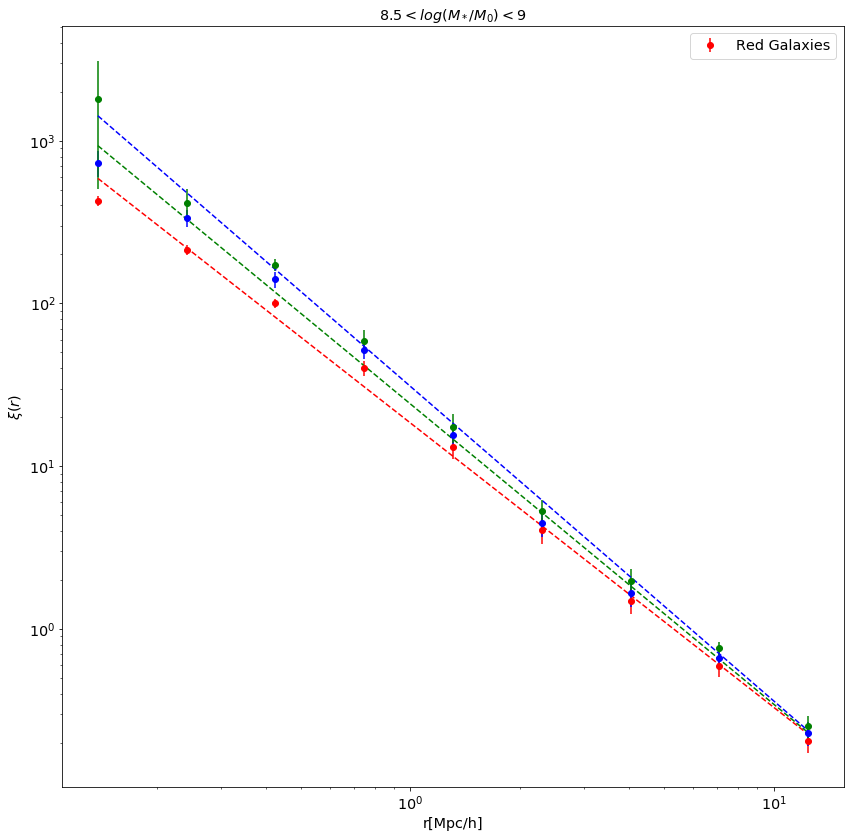

In [79]:
fig = plt.figure(figsize=(14,14))
params = {'legend.fontsize': 'x-large',
          'font.family':'Times New Roman',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)      
#ax = fig.add_subplot(231,xlabel='r(Mpc/h)',ylabel ='$\\xi(r)$',title = '$8<log(M_*/M_0)<8.5$')
#ax.scatter(bincenters,corr_blue_8,color ='blue',marker = 's')
#ax.plot(bincenters,corr_red_8,'ro')

ax = fig.add_subplot(111,xlabel='r[Mpc/h]',ylabel ='$\\xi(r)$',title = '$8.5<log(M_*/M_0)<9$')
ax.errorbar(bincenters,cf_g1_mean,yerr=cf_g1_std,fmt = 'o',color = 'red',label='Red Galaxies')
#ax.errorbar(bincenters,cf_blue_8_5_mean,yerr=cf_blue_8_5_std,fmt = 's',color = 'blue',label='Blue Galaxies')
ax.plot(bincenters,xi_g1,'--r')
ax.plot(bincenters,xi_g2,'--g')
ax.plot(bincenters,xi_g3,'--b')
ax.plot()
plt.legend(loc=0)
plt.yscale('log')
plt.xscale('log')
#ax = fig.add_subplot(111,xlabel='r[Mpc/h]',ylabel = '$\\xi(r)$',title ='$9<log(M_*/M_0)<9.5$')
ax.errorbar(bincenters,cf_g2_mean,yerr=cf_g2_std,fmt = 'o',color = 'blue')
#ax.errorbar(bincenters,cf_blue_9_mean,yerr=cf_blue_9_std,fmt = 's',color = 'blue')
#ax.plot(bincenters,xi_red_9,'--r')
#ax.plot(bincenters,xi_blue_9,'--b')
#plt.legend(loc='upper left')   

#plt.yscale('log')
#plt.xscale('log')
#ax = fig.add_subplot(111,xlabel='r[Mpc/h]',ylabel = '$\\xi(r)$',title = '$9.5<log(M_*/M_0)<10$')
ax.errorbar(bincenters,cf_g3_mean,yerr=cf_g3_std,fmt = 'o',color = 'green')
#ax.errorbar(bincenters,cf_blue_9_5_mean,yerr=cf_blue_9_5_std,fmt = 's',color = 'blue')
#ax.plot(bincenters,xi_red_9_5,'--r')
#ax.plot(bincenters,xi_blue_9_5,'--b')
#plt.yscale('log')
#plt.xscale('log')
#ax = fig.add_subplot(111,xlabel='r[Mpc/h]',ylabel ='$\\xi(r)$',title = '$10<log(M_*/M_0)<10.5$')
#ax.errorbar(bincenters,cf_g4_mean,yerr=cf_g4_std,fmt = 'o',color = 'yellow')
#ax.errorbar(bincenters,cf_blue_10_mean,yerr=cf_blue_10_std,fmt = 's',color = 'blue')
#ax.plot(bincenters,xi_red_10,'--r')
#ax.plot(bincenters,xi_blue_10,'--b')
#plt.yscale('log')
#plt.xscale('log')
##ax = fig.add_subplot(236,xlabel='r(Mpc/h)',ylabel ='$\\xi(r)$',title = '$10<log(M_*/M_0)<10.5$')
#ax.scatter(bincenters,corr_blue_10_5,color ='blue',marker = 's')
#ax.plot(bincenters,corr_red_10_5,'ro')

#plt.legend(loc=0)


#plt.savefig('color_mass_ranges_witherror.png')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


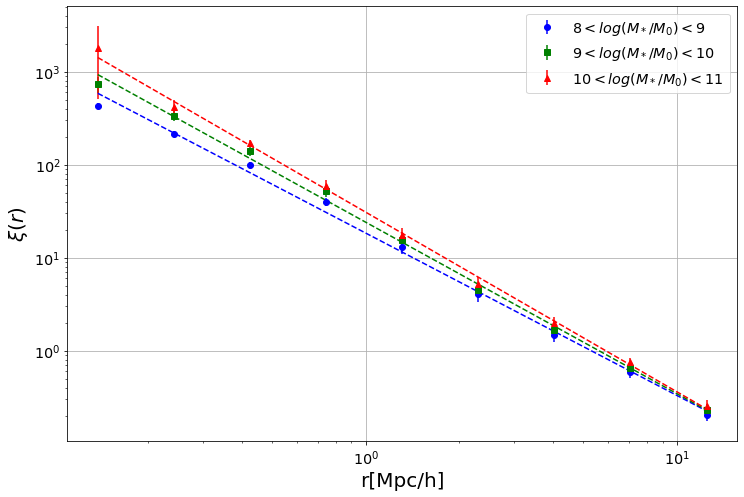

In [82]:
fig = plt.figure(figsize=(12,8))
params = {'legend.fontsize': 'x-large',
          'font.family':'Times New Roman',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)      
#ax = fig.add_subplot(231,xlabel='r(Mpc/h)',ylabel ='$\\xi(r)$',title = '$8<log(M_*/M_0)<8.5$')
#ax.scatter(bincenters,corr_blue_8,color ='blue',marker = 's')
#ax.plot(bincenters,corr_red_8,'ro')

ax = fig.add_subplot(111)
ax.errorbar(bincenters,cf_g1_mean,yerr=cf_g1_std,fmt = 'o',color = 'blue',label='$8<log(M_*/M_0)<9$')
#ax.errorbar(bincenters,cf_blue_8_5_mean,yerr=cf_blue_8_5_std,fmt = 's',color = 'blue',label='Blue Galaxies')
#ax.plot(bincenters,xi_red_8_5,'--r')
#ax.plot(bincenters,xi_blue_8_5,'--b')
ax.plot()

plt.yscale('log')
plt.xscale('log')
ax.plot(bincenters,xi_g1,'--b')
ax.plot(bincenters,xi_g2,'--g')
ax.plot(bincenters,xi_g3,'--r')
#ax = fig.add_subplot(111,xlabel='r[Mpc/h]',ylabel = '$\\xi(r)$',title ='$9<log(M_*/M_0)<9.5$')
ax.errorbar(bincenters,cf_g2_mean,yerr=cf_g2_std,fmt = 's',color = 'green',label='$9<log(M_*/M_0)<10$')
#ax.errorbar(bincenters,cf_blue_9_mean,yerr=cf_blue_9_std,fmt = 's',color = 'blue')
#ax.plot(bincenters,xi_red_9,'--r')
#ax.plot(bincenters,xi_blue_9,'--b')
#plt.legend(loc='upper left')   

#plt.yscale('log')
#plt.xscale('log')
#ax = fig.add_subplot(111,xlabel='r[Mpc/h]',ylabel = '$\\xi(r)$',title = '$9.5<log(M_*/M_0)<10$')
ax.errorbar(bincenters,cf_g3_mean,yerr=cf_g3_std,fmt = '^',color = 'red', label='$10<log(M_*/M_0)<11$')
#ax.errorbar(bincenters,cf_blue_9_5_mean,yerr=cf_blue_9_5_std,fmt = 's',color = 'blue')
#ax.plot(bincenters,xi_red_9_5,'--r')
#ax.plot(bincenters,xi_blue_9_5,'--b')
#plt.yscale('log')
#plt.xscale('log')
#ax = fig.add_subplot(111,xlabel='r[Mpc/h]',ylabel ='$\\xi(r)$',title = '$10<log(M_*/M_0)<10.5$')
#ax.errorbar(bincenters,cf_g4_mean,yerr=cf_g4_std,fmt = 'o',color = 'yellow')
#ax.errorbar(bincenters,cf_blue_10_mean,yerr=cf_blue_10_std,fmt = 's',color = 'blue')
#ax.plot(bincenters,xi_red_10,'--r')
#ax.plot(bincenters,xi_blue_10,'--b')
#plt.yscale('log')
#plt.xscale('log')
##ax = fig.add_subplot(236,xlabel='r(Mpc/h)',ylabel ='$\\xi(r)$',title = '$10<log(M_*/M_0)<10.5$')
#ax.scatter(bincenters,corr_blue_10_5,color ='blue',marker = 's')
#ax.plot(bincenters,corr_red_10_5,'ro')
plt.legend(loc=0)
#plt.legend(loc=0)
plt.grid('on')
plt.xlabel('r[Mpc/h]',fontsize=20)
plt.ylabel('$\\xi(r)$',fontsize=20)
plt.savefig('clustering_stellar_massfit22.eps')

In [83]:
print(gamma_g1)
print(gamma_g2)
print(gamma_g3)

print('...................')
print(r_g1)
print(r_g2)
print(r_g3)

1.7467056773416167
1.844423738275401
1.9323139551497164
...................
5.301091325430057
5.61458573201159
5.903853216829047


In [17]:
gal_g1 = gal[(gal['log_mass']>8.6)&(gal['log_mass']<9)]
gal_g2 = gal[(gal['log_mass']>9)&(gal['log_mass']<9.553)]
gal_g3 = gal[(gal['log_mass']>9.6)&(gal['log_mass']<10.5)]

In [18]:
len(gal_g2)

99522

In [19]:
len(gal_g3)

99538

In [20]:
len(gal_g1)

99544

# J function 

In [20]:
def distance(x1,y1,z1,x2,y2,z2):
    return (((x2 - x1)**2 + (y2 - y1)**2 + (z2 - z1)**2)**0.5)

In [21]:
gal = gal[gal['log_mass']>8]

In [22]:
gal

,x,y,z,stellarmass,sfr,U,B,V,K,g,r,i,z_color,g_r,log_mass
0,43718.812500,48813.640625,147594.953125,3.527934e+12,0.000000,-24.791388,-25.177679,-26.034241,-28.911427,-25.628429,-26.373409,-26.728613,-26.975189,0.744980,12.547520
1,45442.273438,51850.199219,146416.500000,1.735250e+12,0.000000,-24.046928,-24.439625,-25.297689,-28.171772,-24.891636,-25.636240,-25.990240,-26.236513,0.744604,12.239362
2,44490.761719,49091.714844,147870.578125,3.824088e+11,0.000000,-22.093132,-22.588654,-23.502014,-26.553734,-23.062399,-23.858458,-24.239382,-24.516970,0.796059,11.582528
3,43820.785156,50939.398438,147711.046875,1.671727e+11,0.000000,-21.287239,-21.744883,-22.638138,-25.620272,-22.211082,-22.987967,-23.359406,-23.624681,0.776884,11.223165
4,44302.578125,49630.972656,147869.484375,1.522151e+11,0.000000,-21.176722,-21.637291,-22.531923,-25.517952,-22.103907,-22.881990,-23.252897,-23.519327,0.778084,11.182458
5,44014.527344,52243.406250,144518.000000,6.353196e+10,0.000000,-20.403265,-20.839859,-21.720675,-24.674942,-21.301176,-22.065657,-22.429335,-22.688301,0.764481,10.802992
6,45629.851562,52255.410156,146021.906250,1.336082e+11,0.000000,-21.010229,-21.474455,-22.370104,-25.354071,-21.941839,-22.720127,-23.091192,-23.357435,0.778288,11.125833
7,46637.632812,53009.378906,146825.515625,7.962063e+10,0.000000,-20.520794,-20.973169,-21.860506,-24.834127,-21.437376,-22.206985,-22.572983,-22.836420,0.769609,10.901026
8,44246.441406,52066.492188,145527.484375,4.195562e+10,0.000000,-19.859842,-20.293501,-21.175650,-24.135769,-20.754671,-21.522858,-21.890797,-22.151075,0.768187,10.622790
9,43609.500000,48269.984375,146391.796875,4.714380e+10,0.000000,-20.026405,-20.455057,-21.333075,-24.271595,-20.915113,-21.677898,-22.041645,-22.298491,0.762785,10.673425


In [22]:
xyz_g1 = gal_g1[['x','y','z']]/1000
xyz_g2 = gal_g2[['x','y','z']]/1000
xyz_g3 = gal_g3[['x','y','z']]/1000
#xyz_g4 = gal_g4[['x','y','z']]/1000

In [23]:
g1_1 = xyz_g1[(xyz_g1['x']<102.5)&(xyz_g1['y']<102.5)&(xyz_g1['z']<102.5)]
g1_2 = xyz_g1[(xyz_g1['x']<102.5)&(xyz_g1['y']<102.5)&(xyz_g1['z']>102.5)]
g1_3 = xyz_g1[(xyz_g1['x']<102.5)&(xyz_g1['y']>102.5)&(xyz_g1['z']<102.5)]
g1_4 = xyz_g1[(xyz_g1['x']>102.5)&(xyz_g1['y']<102.5)&(xyz_g1['z']<102.5)]
g1_5 = xyz_g1[(xyz_g1['x']>102.5)&(xyz_g1['y']>102.5)&(xyz_g1['z']<102.5)]
g1_6 = xyz_g1[(xyz_g1['x']>102.5)&(xyz_g1['y']<102.5)&(xyz_g1['z']>102.5)]
g1_7 = xyz_g1[(xyz_g1['x']<102.5)&(xyz_g1['y']>102.5)&(xyz_g1['z']>102.5)]
g1_8 = xyz_g1[(xyz_g1['x']>102.5)&(xyz_g1['y']>102.5)&(xyz_g1['z']>102.5)]

In [24]:
g2_1 = xyz_g2[(xyz_g2['x']<102.5)&(xyz_g2['y']<102.5)&(xyz_g2['z']<102.5)]
g2_2 = xyz_g2[(xyz_g2['x']<102.5)&(xyz_g2['y']<102.5)&(xyz_g2['z']>102.5)]
g2_3 = xyz_g2[(xyz_g2['x']<102.5)&(xyz_g2['y']>102.5)&(xyz_g2['z']<102.5)]
g2_4 = xyz_g2[(xyz_g2['x']>102.5)&(xyz_g2['y']<102.5)&(xyz_g2['z']<102.5)]
g2_5 = xyz_g2[(xyz_g2['x']>102.5)&(xyz_g2['y']>102.5)&(xyz_g2['z']<102.5)]
g2_6 = xyz_g2[(xyz_g2['x']>102.5)&(xyz_g2['y']<102.5)&(xyz_g2['z']>102.5)]
g2_7 = xyz_g2[(xyz_g2['x']<102.5)&(xyz_g2['y']>102.5)&(xyz_g2['z']>102.5)]
g2_8 = xyz_g2[(xyz_g2['x']>102.5)&(xyz_g2['y']>102.5)&(xyz_g2['z']>102.5)]

In [25]:
g3_1 = xyz_g3[(xyz_g3['x']<102.5)&(xyz_g3['y']<102.5)&(xyz_g3['z']<102.5)]
g3_2 = xyz_g3[(xyz_g3['x']<102.5)&(xyz_g3['y']<102.5)&(xyz_g3['z']>102.5)]
g3_3 = xyz_g3[(xyz_g3['x']<102.5)&(xyz_g3['y']>102.5)&(xyz_g3['z']<102.5)]
g3_4 = xyz_g3[(xyz_g3['x']>102.5)&(xyz_g3['y']<102.5)&(xyz_g3['z']<102.5)]
g3_5 = xyz_g3[(xyz_g3['x']>102.5)&(xyz_g3['y']>102.5)&(xyz_g3['z']<102.5)]
g3_6 = xyz_g3[(xyz_g3['x']>102.5)&(xyz_g3['y']<102.5)&(xyz_g3['z']>102.5)]
g3_7 = xyz_g3[(xyz_g3['x']<102.5)&(xyz_g3['y']>102.5)&(xyz_g3['z']>102.5)]
g3_8 = xyz_g3[(xyz_g3['x']>102.5)&(xyz_g3['y']>102.5)&(xyz_g3['z']>102.5)]

In [176]:
x1 =g1_1['x'].values
y1 = g1_1['y'].values
z1 = g1_1['z'].values

x2 = g1_2['x'].values
y2 = g1_2['y'].values
z2 = g1_2['z'].values

x3 = g1_3['x'].values
y3 = g1_3['y'].values
z3 = g1_3['z'].values

x4 = g1_4['x'].values
y4 = g1_4['y'].values
z4 = g1_4['z'].values

x5 = g1_5['x'].values
y5 = g1_5['y'].values
z5 =g1_5['z'].values

x6 = g1_6['x'].values
y6 = g1_6['y'].values
z6 = g1_6['z'].values

x7 = g1_7['x'].values
y7 = g1_7['y'].values
z7 =g1_7['z'].values

x8 = g1_8['x'].values
y8 = g1_8['y'].values
z8 = g1_8['z'].values

In [177]:
%%time
minimum1 = []
for i in range(len(x1)):
    dist = []
        
    for j in range(len(x1)):
        if (j != i ):
            dist.append(distance(x1[i],y1[i],z1[i],x1[j],y1[j],z1[j]))
    minimum1.append(min(dist))
    
print(len(minimum1))

xr = np.random.uniform(np.amin(x1),np.amax(x1),len(x1))
yr = np.random.uniform(np.amin(y1),np.amax(y1),len(y1))
zr = np.random.uniform(np.amin(z1),np.amax(z1),len(z1))

minimum_r1 = []
for i in range(len(xr)):
    dist = []
        
    for j in range(len(xr)):
        if (j != i ):
            dist.append(distance(xr[i],yr[i],zr[i],x1[j],y1[j],z1[j]))
    minimum_r1.append(min(dist))
    
print(len(minimum_r1))

11796
11796
CPU times: user 51min 26s, sys: 553 ms, total: 51min 26s
Wall time: 51min 26s


In [178]:
%%time
minimum2 = []
for i in range(len(x2)):
    dist = []
        
    for j in range(len(x2)):
        if (j != i ):
            dist.append(distance(x2[i],y2[i],z2[i],x2[j],y2[j],z2[j]))
    minimum2.append(min(dist))
    
print(len(minimum2))

xr = np.random.uniform(np.amin(x2),np.amax(x2),len(x2))
yr = np.random.uniform(np.amin(y2),np.amax(y2),len(y2))
zr = np.random.uniform(np.amin(z2),np.amax(z2),len(z2))

minimum_r2 = []
for i in range(len(xr)):
    dist = []
        
    for j in range(len(xr)):
        if (j != i ):
            dist.append(distance(xr[i],yr[i],zr[i],x2[j],y2[j],z2[j]))
    minimum_r2.append(min(dist))
    
print(len(minimum_r2))

15299
15299
CPU times: user 1h 24min 37s, sys: 551 ms, total: 1h 24min 38s
Wall time: 1h 24min 38s


In [179]:
%%time
minimum3 = []
for i in range(len(x3)):
    dist = []
        
    for j in range(len(x3)):
        if (j != i ):
            dist.append(distance(x3[i],y3[i],z3[i],x3[j],y3[j],z3[j]))
    minimum3.append(min(dist))
    
print(len(minimum3))

xr = np.random.uniform(np.amin(x3),np.amax(x3),len(x3))
yr = np.random.uniform(np.amin(y3),np.amax(y3),len(y3))
zr = np.random.uniform(np.amin(z3),np.amax(z3),len(z3))

minimum_r3 = []
for i in range(len(xr)):
    dist = []
        
    for j in range(len(xr)):
        if (j != i ):
            dist.append(distance(xr[i],yr[i],zr[i],x3[j],y3[j],z3[j]))
    minimum_r3.append(min(dist))
    
print(len(minimum_r3))

12832
12832
CPU times: user 58min 37s, sys: 284 ms, total: 58min 37s
Wall time: 58min 37s


In [180]:
%%time
minimum4 = []
for i in range(len(x4)):
    dist = []
        
    for j in range(len(x4)):
        if (j != i ):
            dist.append(distance(x4[i],y4[i],z4[i],x4[j],y4[j],z4[j]))
    minimum4.append(min(dist))
    
print(len(minimum4))

xr = np.random.uniform(np.amin(x4),np.amax(x4),len(x4))
yr = np.random.uniform(np.amin(y4),np.amax(y4),len(y4))
zr = np.random.uniform(np.amin(z4),np.amax(z4),len(z4))

minimum_r4 = []
for i in range(len(xr)):
    dist = []
        
    for j in range(len(xr)):
        if (j != i ):
            dist.append(distance(xr[i],yr[i],zr[i],x4[j],y4[j],z4[j]))
    minimum_r4.append(min(dist))
    
print(len(minimum_r4))

12333
12333
CPU times: user 54min 42s, sys: 120 ms, total: 54min 42s
Wall time: 54min 42s


In [181]:
%%time
minimum5 = []
for i in range(len(x5)):
    dist = []
        
    for j in range(len(x5)):
        if (j != i ):
            dist.append(distance(x5[i],y5[i],z5[i],x5[j],y5[j],z5[j]))
    minimum5.append(min(dist))
    
print(len(minimum5))

xr = np.random.uniform(np.amin(x5),np.amax(x5),len(x5))
yr = np.random.uniform(np.amin(y5),np.amax(y5),len(y5))
zr = np.random.uniform(np.amin(z5),np.amax(z5),len(z5))

minimum_r5 = []
for i in range(len(xr)):
    dist = []
        
    for j in range(len(xr)):
        if (j != i ):
            dist.append(distance(xr[i],yr[i],zr[i],x5[j],y5[j],z5[j]))
    minimum_r5.append(min(dist))
    
print(len(minimum_r5))

10637
10637
CPU times: user 40min 47s, sys: 612 ms, total: 40min 47s
Wall time: 40min 47s


In [182]:
%%time
minimum6 = []
for i in range(len(x6)):
    dist = []
        
    for j in range(len(x6)):
        if (j != i ):
            dist.append(distance(x6[i],y6[i],z6[i],x6[j],y6[j],z6[j]))
    minimum6.append(min(dist))
    
print(len(minimum6))

xr = np.random.uniform(np.amin(x6),np.amax(x6),len(x6))
yr = np.random.uniform(np.amin(y6),np.amax(y6),len(y6))
zr = np.random.uniform(np.amin(z6),np.amax(z6),len(z6))

minimum_r6 = []
for i in range(len(xr)):
    dist = []
        
    for j in range(len(xr)):
        if (j != i ):
            dist.append(distance(xr[i],yr[i],zr[i],x6[j],y6[j],z6[j]))
    minimum_r6.append(min(dist))
    
print(len(minimum_r6))

12916
12916
CPU times: user 59min 46s, sys: 464 ms, total: 59min 46s
Wall time: 59min 46s


In [183]:
%%time
minimum7 = []
for i in range(len(x7)):
    dist = []
        
    for j in range(len(x7)):
        if (j != i ):
            dist.append(distance(x7[i],y7[i],z7[i],x7[j],y7[j],z7[j]))
    minimum7.append(min(dist))
    
print(len(minimum7))

xr = np.random.uniform(np.amin(x7),np.amax(x7),len(x7))
yr = np.random.uniform(np.amin(y7),np.amax(y7),len(y7))
zr = np.random.uniform(np.amin(z7),np.amax(z7),len(z7))

minimum_r7 = []
for i in range(len(xr)):
    dist = []
        
    for j in range(len(xr)):
        if (j != i ):
            dist.append(distance(xr[i],yr[i],zr[i],x7[j],y7[j],z7[j]))
    minimum_r7.append(min(dist))
    
print(len(minimum_r7))

12259
12259
CPU times: user 53min 46s, sys: 760 ms, total: 53min 47s
Wall time: 53min 47s


In [184]:
%%time
minimum8 = []
for i in range(len(x8)):
    dist = []
        
    for j in range(len(x8)):
        if (j != i ):
            dist.append(distance(x8[i],y8[i],z8[i],x8[j],y8[j],z8[j]))
    minimum8.append(min(dist))
    
print(len(minimum8))

xr = np.random.uniform(np.amin(x8),np.amax(x8),len(x8))
yr = np.random.uniform(np.amin(y8),np.amax(y8),len(y8))
zr = np.random.uniform(np.amin(z8),np.amax(z8),len(z8))

minimum_r8 = []
for i in range(len(xr)):
    dist = []
        
    for j in range(len(xr)):
        if (j != i ):
            dist.append(distance(xr[i],yr[i],zr[i],x8[j],y8[j],z8[j]))
    minimum_r8.append(min(dist))
    
print(len(minimum_r8))

11472
11472
CPU times: user 47min 14s, sys: 37.2 s, total: 47min 51s
Wall time: 47min 51s


In [185]:
pd.DataFrame(np.array(minimum1)).to_csv('1min_g1_newn.csv',index = False)
pd.DataFrame(np.array(minimum_r1)).to_csv('1rmin_g1_newn.csv',index = False)
pd.DataFrame(np.array(minimum2)).to_csv('2min_g1_newn.csv',index = False)
pd.DataFrame(np.array(minimum_r2)).to_csv('2rmin_g1_newn.csv',index = False)
pd.DataFrame(np.array(minimum3)).to_csv('3min_g1_newn.csv',index = False)
pd.DataFrame(np.array(minimum_r3)).to_csv('3rmin_g1_newn.csv',index = False)
pd.DataFrame(np.array(minimum4)).to_csv('4min_g1_newn.csv',index = False)
pd.DataFrame(np.array(minimum_r4)).to_csv('4rmin_g1_newn.csv',index = False)
pd.DataFrame(np.array(minimum5)).to_csv('5min_g1_newn.csv',index = False)
pd.DataFrame(np.array(minimum_r5)).to_csv('5rmin_g1_newn.csv',index = False)
pd.DataFrame(np.array(minimum6)).to_csv('6min_g1_newn.csv',index = False)
pd.DataFrame(np.array(minimum_r6)).to_csv('6rmin_g1_newn.csv',index = False)
pd.DataFrame(np.array(minimum7)).to_csv('7min_g1_newn.csv',index = False)
pd.DataFrame(np.array(minimum_r7)).to_csv('7rmin_g1_newn.csv',index = False)
pd.DataFrame(np.array(minimum8)).to_csv('8min_g1_newn.csv',index = False)
pd.DataFrame(np.array(minimum_r8)).to_csv('8rmin_g1_newn.csv',index = False)

In [46]:
minimum1 = pd.read_csv('1min_g1_newn.csv')
minimum_r1= pd.read_csv('1rmin_g1_newn.csv')
minimum2= pd.read_csv('2min_g1_newn.csv')
minimum_r2= pd.read_csv('2rmin_g1_newn.csv')
minimum3 = pd.read_csv('3min_g1_newn.csv')
minimum_r3=pd.read_csv('3rmin_g1_newn.csv')
minimum4 = pd.read_csv('4min_g1_newn.csv')
minimum_r4=pd.read_csv('4rmin_g1_newn.csv')
minimum5 = pd.read_csv('5min_g1_newn.csv')
minimum_r5=pd.read_csv('5rmin_g1_newn.csv')
minimum6 = pd.read_csv('6min_g1_newn.csv')
minimum_r6=pd.read_csv('6rmin_g1_newn.csv')
minimum7 = pd.read_csv('7min_g1_newn.csv')
minimum_r7=pd.read_csv('7rmin_g1_newn.csv')
minimum8 = pd.read_csv('8min_g1_newn.csv')
minimum_r8=pd.read_csv('8rmin_g1_newn.csv')

In [47]:
minimum1 = np.array(minimum1)
minimum2 = np.array(minimum2)
minimum3 = np.array(minimum3)
minimum4 = np.array(minimum4)
minimum5 = np.array(minimum5)
minimum6 = np.array(minimum6)
minimum7 = np.array(minimum7)
minimum8 = np.array(minimum8)

minimum_r1 = np.array(minimum_r1)
minimum_r2 = np.array(minimum_r2)
minimum_r3 = np.array(minimum_r3)
minimum_r4 = np.array(minimum_r4)
minimum_r5 = np.array(minimum_r5)
minimum_r6 = np.array(minimum_r6)
minimum_r7 = np.array(minimum_r7)
minimum_r8 = np.array(minimum_r8)

In [48]:
bins = np.logspace(-2,1,101)

In [49]:
bins

array([ 0.01      ,  0.01071519,  0.01148154,  0.01230269,  0.01318257,
        0.01412538,  0.01513561,  0.0162181 ,  0.01737801,  0.01862087,
        0.01995262,  0.02137962,  0.02290868,  0.02454709,  0.02630268,
        0.02818383,  0.03019952,  0.03235937,  0.03467369,  0.03715352,
        0.03981072,  0.04265795,  0.04570882,  0.04897788,  0.05248075,
        0.05623413,  0.06025596,  0.06456542,  0.0691831 ,  0.07413102,
        0.07943282,  0.0851138 ,  0.09120108,  0.09772372,  0.10471285,
        0.11220185,  0.12022644,  0.12882496,  0.13803843,  0.14791084,
        0.15848932,  0.16982437,  0.18197009,  0.19498446,  0.20892961,
        0.22387211,  0.23988329,  0.25703958,  0.27542287,  0.29512092,
        0.31622777,  0.33884416,  0.36307805,  0.38904514,  0.41686938,
        0.44668359,  0.47863009,  0.51286138,  0.54954087,  0.58884366,
        0.63095734,  0.67608298,  0.72443596,  0.77624712,  0.83176377,
        0.89125094,  0.95499259,  1.02329299,  1.0964782 ,  1.17

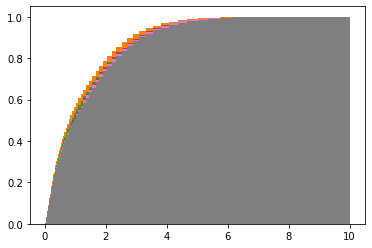

In [50]:
g1_1,bins,_ = plt.hist(minimum1,bins,density=True,cumulative = True,range=(0,7.5))
g2_1,bins,_  = plt.hist(minimum2,bins,density=True,cumulative = True,range=(0,7.5))
g3_1,bins,_  = plt.hist(minimum3,bins,density=True,cumulative = True,range=(0,7.5))
g4_1,bins,_  = plt.hist(minimum4,bins,density=True,cumulative = True,range=(0,7.5))
g5_1,bins,_  = plt.hist(minimum5,bins,density=True,cumulative = True,range=(0,7.5))
g6_1,bins,_  = plt.hist(minimum6,bins,density=True,cumulative = True,range=(0,7.5))
g7_1,bins,_  = plt.hist(minimum7,bins,density=True,cumulative = True,range=(0,7.5))
g8_1,bins,_  = plt.hist(minimum8,bins,density=True,cumulative = True,range=(0,7.5))

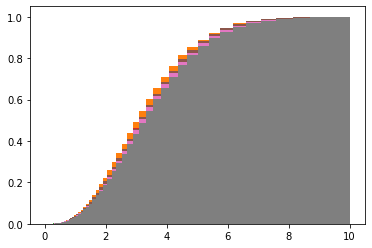

In [51]:
f1_1,bins,_  = plt.hist(minimum_r1,bins,density=True,cumulative = True,range=(0,7.5))
f2_1,bins,_  = plt.hist(minimum_r2,bins,density=True,cumulative = True,range=(0,7.5))
f3_1,bins,_  = plt.hist(minimum_r3,bins,density=True,cumulative = True,range=(0,7.5))
f4_1,bins,_  = plt.hist(minimum_r4,bins,density=True,cumulative = True,range=(0,7.5))
f5_1,bins,_  = plt.hist(minimum_r5,bins,density=True,cumulative = True,range=(0,7.5))
f6_1,bins,_  = plt.hist(minimum_r6,bins,density=True,cumulative = True,range=(0,7.5))
f7_1,bins,_  = plt.hist(minimum_r7,bins,density=True,cumulative = True,range=(0,7.5))
f8_1,bins,_  = plt.hist(minimum_r8,bins,density=True,cumulative = True,range=(0,7.5))

In [52]:
j1_1 = (np.ones(100)-g1_1)/(np.ones(100)-f1_1)
j2_1 = (np.ones(100)-g2_1)/(np.ones(100)-f2_1)
j3_1 = (np.ones(100)-g3_1)/(np.ones(100)-f3_1)
j4_1 = (np.ones(100)-g4_1)/(np.ones(100)-f4_1)
j5_1 = (np.ones(100)-g5_1)/(np.ones(100)-f5_1)
j6_1 = (np.ones(100)-g6_1)/(np.ones(100)-f6_1)
j7_1 = (np.ones(100)-g7_1)/(np.ones(100)-f7_1)
j8_1 = (np.ones(100)-g8_1)/(np.ones(100)-f8_1)

/home/zb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/home/zb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/home/zb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/home/zb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


In [53]:
j_mean_1 = np.mean((j1_1,j2_1,j3_1,j4_1,j5_1,j6_1,j7_1,j8_1),axis = 0)
j_std_1 = np.std((j1_1,j2_1,j3_1,j4_1,j5_1,j6_1,j7_1,j8_1),axis = 0)

In [54]:
j_mean_1

array([0.99975889, 0.99957583, 0.99928818, 0.9987682 , 0.99836481,
       0.99786265, 0.99719448, 0.9965304 , 0.99585414, 0.99485986,
       0.99404024, 0.9931684 , 0.99203993, 0.99084432, 0.98936416,
       0.98784989, 0.98608314, 0.98414952, 0.98237555, 0.98038415,
       0.97812104, 0.97609213, 0.97340286, 0.97066593, 0.9673884 ,
       0.96405902, 0.96096967, 0.95711309, 0.95330357, 0.94931185,
       0.94460212, 0.94054458, 0.93544245, 0.9300545 , 0.92413169,
       0.91809562, 0.91152854, 0.90422593, 0.89639823, 0.88764652,
       0.87865442, 0.8693395 , 0.85892361, 0.8482368 , 0.83691659,
       0.82523661, 0.8128405 , 0.80015802, 0.78759323, 0.77422941,
       0.75893575, 0.74413508, 0.72978929, 0.71533849, 0.69982215,
       0.6847856 , 0.66935712, 0.65248063, 0.63637022, 0.61958152,
       0.60337514, 0.5874978 , 0.57013784, 0.55353763, 0.53708009,
       0.51970468, 0.50303832, 0.48455371, 0.46647746, 0.44891443,
       0.43000328, 0.41066501, 0.39052963, 0.37113057, 0.35039

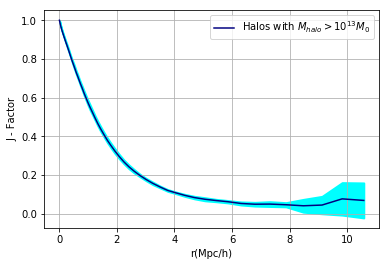

In [241]:
#plt.plot(bins[:-2], j_mean,label='poisson point process')
#plt.fill_between(bins[:-2], j_mean-j_std, j_mean+j_std,color = 'lightblue',lw=2)
bincenters = 0.5*(bins[1:]+bins[:-1])
plt.plot(bincenters, j_mean_blue,color = 'navy',label = 'Halos with $M_{halo}>10^{13}M_0$')
plt.fill_between(bincenters, j_mean_blue-j_std_blue,j_mean_blue+j_std_blue,color = 'cyan',lw=2)
#plt.xlim(0,4)
#plt.xscale('log')
#plt.xlim(0,4)
#plt.yscale('log')
plt.xlabel('r(Mpc/h)');
plt.ylabel('J - Factor')
#plt.title('Poisson Point Process');
plt.grid('on')
plt.legend(loc=0)
#plt.savefig('piosson-smdpl.jpg')

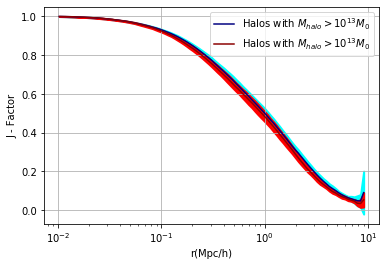

In [55]:
#plt.plot(bins[:-2], j_mean,label='poisson point process')
#plt.fill_between(bins[:-2], j_mean-j_std, j_mean+j_std,color = 'lightblue',lw=2)
bincenters = 0.5*(bins[1:]+bins[:-1])
plt.plot(bincenters, j_mean_1,color = 'navy',label = 'Halos with $M_{halo}>10^{13}M_0$')
plt.fill_between(bincenters, j_mean_1-j_std_1,j_mean_1+j_std_1,color = 'cyan',lw=2)

plt.plot(bincenters, j_mean_2,color = 'darkred',label = 'Halos with $M_{halo}>10^{13}M_0$')
plt.fill_between(bincenters, j_mean_2-j_std_2,j_mean_2+j_std_2,color = 'red',lw=2)
#plt.xlim(0,4)
plt.xscale('log')
#plt.xlim(0,4)
#plt.yscale('log')
plt.xlabel('r(Mpc/h)');
plt.ylabel('J - Factor')
#plt.title('Poisson Point Process');
plt.grid('on')
plt.legend(loc=0)
#plt.savefig('piosson-smdpl.jpg')

In [206]:
###################################################

In [29]:
x1 = g2_1['x'].values
y1 = g2_1['y'].values
z1 = g2_1['z'].values

x2 = g2_2['x'].values
y2 = g2_2['y'].values
z2 = g2_2['z'].values

x3 = g2_3['x'].values
y3 = g2_3['y'].values
z3 = g2_3['z'].values

x4 = g2_4['x'].values
y4 = g2_4['y'].values
z4 = g2_4['z'].values

x5 = g2_5['x'].values
y5 = g2_5['y'].values
z5 = g2_5['z'].values

x6 = g2_6['x'].values
y6 = g2_6['y'].values
z6 = g2_6['z'].values

x7 = g2_7['x'].values
y7 = g2_7['y'].values
z7 = g2_7['z'].values

x8 = g2_8['x'].values
y8 = g2_8['y'].values
z8 = g2_8['z'].values

In [30]:
%%time
minimum1 = []
for i in range(len(x1)):
    dist = []
        
    for j in range(len(x1)):
        if (j != i ):
            dist.append(distance(x1[i],y1[i],z1[i],x1[j],y1[j],z1[j]))
    minimum1.append(min(dist))
    
print(len(minimum1))

xr = np.random.uniform(np.amin(x1),np.amax(x1),len(x1))
yr = np.random.uniform(np.amin(y1),np.amax(y1),len(y1))
zr = np.random.uniform(np.amin(z1),np.amax(z1),len(z1))

minimum_r1 = []
for i in range(len(xr)):
    dist = []
        
    for j in range(len(xr)):
        if (j != i ):
            dist.append(distance(xr[i],yr[i],zr[i],x1[j],y1[j],z1[j]))
    minimum_r1.append(min(dist))
    
print(len(minimum_r1))

11922
11922
CPU times: user 49min 24s, sys: 332 ms, total: 49min 24s
Wall time: 49min 24s


In [31]:
%%time
minimum2 = []
for i in range(len(x2)):
    dist = []
        
    for j in range(len(x2)):
        if (j != i ):
            dist.append(distance(x2[i],y2[i],z2[i],x2[j],y2[j],z2[j]))
    minimum2.append(min(dist))
    
print(len(minimum2))

xr = np.random.uniform(np.amin(x2),np.amax(x2),len(x2))
yr = np.random.uniform(np.amin(y2),np.amax(y2),len(y2))
zr = np.random.uniform(np.amin(z2),np.amax(z2),len(z2))

minimum_r2 = []
for i in range(len(xr)):
    dist = []
        
    for j in range(len(xr)):
        if (j != i ):
            dist.append(distance(xr[i],yr[i],zr[i],x2[j],y2[j],z2[j]))
    minimum_r2.append(min(dist))
    
print(len(minimum_r2))

15057
15057
CPU times: user 1h 18min 36s, sys: 592 ms, total: 1h 18min 36s
Wall time: 1h 18min 37s


In [32]:
%%time
minimum3 = []
for i in range(len(x3)):
    dist = []
        
    for j in range(len(x3)):
        if (j != i ):
            dist.append(distance(x3[i],y3[i],z3[i],x3[j],y3[j],z3[j]))
    minimum3.append(min(dist))
    
print(len(minimum3))

xr = np.random.uniform(np.amin(x3),np.amax(x3),len(x3))
yr = np.random.uniform(np.amin(y3),np.amax(y3),len(y3))
zr = np.random.uniform(np.amin(z3),np.amax(z3),len(z3))

minimum_r3 = []
for i in range(len(xr)):
    dist = []
        
    for j in range(len(xr)):
        if (j != i ):
            dist.append(distance(xr[i],yr[i],zr[i],x3[j],y3[j],z3[j]))
    minimum_r3.append(min(dist))
    
print(len(minimum_r3))

12862
12862
CPU times: user 57min 49s, sys: 1min, total: 58min 50s
Wall time: 58min 50s


In [33]:
%%time
minimum4 = []
for i in range(len(x4)):
    dist = []
        
    for j in range(len(x4)):
        if (j != i ):
            dist.append(distance(x4[i],y4[i],z4[i],x4[j],y4[j],z4[j]))
    minimum4.append(min(dist))
    
print(len(minimum4))

xr = np.random.uniform(np.amin(x4),np.amax(x4),len(x4))
yr = np.random.uniform(np.amin(y4),np.amax(y4),len(y4))
zr = np.random.uniform(np.amin(z4),np.amax(z4),len(z4))

minimum_r4 = []
for i in range(len(xr)):
    dist = []
        
    for j in range(len(xr)):
        if (j != i ):
            dist.append(distance(xr[i],yr[i],zr[i],x4[j],y4[j],z4[j]))
    minimum_r4.append(min(dist))
    
print(len(minimum_r4))

12379
12379
CPU times: user 53min 42s, sys: 440 ms, total: 53min 43s
Wall time: 53min 43s


In [34]:
%%time
minimum5 = []
for i in range(len(x5)):
    dist = []
        
    for j in range(len(x5)):
        if (j != i ):
            dist.append(distance(x5[i],y5[i],z5[i],x5[j],y5[j],z5[j]))
    minimum5.append(min(dist))
    
print(len(minimum5))

xr = np.random.uniform(np.amin(x5),np.amax(x5),len(x5))
yr = np.random.uniform(np.amin(y5),np.amax(y5),len(y5))
zr = np.random.uniform(np.amin(z5),np.amax(z5),len(z5))

minimum_r5 = []
for i in range(len(xr)):
    dist = []
        
    for j in range(len(xr)):
        if (j != i ):
            dist.append(distance(xr[i],yr[i],zr[i],x5[j],y5[j],z5[j]))
    minimum_r5.append(min(dist))
    
print(len(minimum_r5))

10533
10533
CPU times: user 38min 27s, sys: 224 ms, total: 38min 27s
Wall time: 38min 27s


In [35]:
%%time
minimum6 = []
for i in range(len(x6)):
    dist = []
        
    for j in range(len(x6)):
        if (j != i ):
            dist.append(distance(x6[i],y6[i],z6[i],x6[j],y6[j],z6[j]))
    minimum6.append(min(dist))
    
print(len(minimum6))

xr = np.random.uniform(np.amin(x6),np.amax(x6),len(x6))
yr = np.random.uniform(np.amin(y6),np.amax(y6),len(y6))
zr = np.random.uniform(np.amin(z6),np.amax(z6),len(z6))

minimum_r6 = []
for i in range(len(xr)):
    dist = []
        
    for j in range(len(xr)):
        if (j != i ):
            dist.append(distance(xr[i],yr[i],zr[i],x6[j],y6[j],z6[j]))
    minimum_r6.append(min(dist))
    
print(len(minimum_r6))

12937
12937
CPU times: user 57min 49s, sys: 672 ms, total: 57min 50s
Wall time: 57min 50s


In [36]:
%%time
minimum7 = []
for i in range(len(x7)):
    dist = []
        
    for j in range(len(x7)):
        if (j != i ):
            dist.append(distance(x7[i],y7[i],z7[i],x7[j],y7[j],z7[j]))
    minimum7.append(min(dist))
    
print(len(minimum7))

xr = np.random.uniform(np.amin(x7),np.amax(x7),len(x7))
yr = np.random.uniform(np.amin(y7),np.amax(y7),len(y7))
zr = np.random.uniform(np.amin(z7),np.amax(z7),len(z7))

minimum_r7 = []
for i in range(len(xr)):
    dist = []
        
    for j in range(len(xr)):
        if (j != i ):
            dist.append(distance(xr[i],yr[i],zr[i],x7[j],y7[j],z7[j]))
    minimum_r7.append(min(dist))
    
print(len(minimum_r7))

12177
12177
CPU times: user 51min 20s, sys: 252 ms, total: 51min 21s
Wall time: 51min 20s


In [37]:
%%time
minimum8 = []
for i in range(len(x8)):
    dist = []
        
    for j in range(len(x8)):
        if (j != i ):
            dist.append(distance(x8[i],y8[i],z8[i],x8[j],y8[j],z8[j]))
    minimum8.append(min(dist))
    
print(len(minimum8))

xr = np.random.uniform(np.amin(x8),np.amax(x8),len(x8))
yr = np.random.uniform(np.amin(y8),np.amax(y8),len(y8))
zr = np.random.uniform(np.amin(z8),np.amax(z8),len(z8))

minimum_r8 = []
for i in range(len(xr)):
    dist = []
        
    for j in range(len(xr)):
        if (j != i ):
            dist.append(distance(xr[i],yr[i],zr[i],x8[j],y8[j],z8[j]))
    minimum_r8.append(min(dist))
    
print(len(minimum_r8))

11655
11655
CPU times: user 46min 48s, sys: 212 ms, total: 46min 48s
Wall time: 46min 48s


In [38]:
pd.DataFrame(np.array(minimum1)).to_csv('1min_g2_newn.csv',index = False)
pd.DataFrame(np.array(minimum_r1)).to_csv('1rmin_g2_newn.csv',index = False)
pd.DataFrame(np.array(minimum2)).to_csv('2min_g2_newn.csv',index = False)
pd.DataFrame(np.array(minimum_r2)).to_csv('2rmin_g2_newn.csv',index = False)
pd.DataFrame(np.array(minimum3)).to_csv('3min_g2_newn.csv',index = False)
pd.DataFrame(np.array(minimum_r3)).to_csv('3rmin_g2_newn.csv',index = False)
pd.DataFrame(np.array(minimum4)).to_csv('4min_g2_newn.csv',index = False)
pd.DataFrame(np.array(minimum_r4)).to_csv('4rmin_g2_newn.csv',index = False)
pd.DataFrame(np.array(minimum5)).to_csv('5min_g2_newn.csv',index = False)
pd.DataFrame(np.array(minimum_r5)).to_csv('5rmin_g2_newn.csv',index = False)
pd.DataFrame(np.array(minimum6)).to_csv('6min_g2_newn.csv',index = False)
pd.DataFrame(np.array(minimum_r6)).to_csv('6rmin_g2_newn.csv',index = False)
pd.DataFrame(np.array(minimum7)).to_csv('7min_g2_newn.csv',index = False)
pd.DataFrame(np.array(minimum_r7)).to_csv('7rmin_g2_newn.csv',index = False)
pd.DataFrame(np.array(minimum8)).to_csv('8min_g2_newn.csv',index = False)
pd.DataFrame(np.array(minimum_r8)).to_csv('8rmin_g2_newn.csv',index = False)

In [39]:
minimum1 = np.array(minimum1)
minimum2 = np.array(minimum2)
minimum3 = np.array(minimum3)
minimum4 = np.array(minimum4)
minimum5 = np.array(minimum5)
minimum6 = np.array(minimum6)
minimum7 = np.array(minimum7)
minimum8 = np.array(minimum8)

minimum_r1 = np.array(minimum_r1)
minimum_r2 = np.array(minimum_r2)
minimum_r3 = np.array(minimum_r3)
minimum_r4 = np.array(minimum_r4)
minimum_r5 = np.array(minimum_r5)
minimum_r6 = np.array(minimum_r6)
minimum_r7 = np.array(minimum_r7)
minimum_r8 = np.array(minimum_r8)

In [40]:
bins

array([ 0.01      ,  0.01071519,  0.01148154,  0.01230269,  0.01318257,
        0.01412538,  0.01513561,  0.0162181 ,  0.01737801,  0.01862087,
        0.01995262,  0.02137962,  0.02290868,  0.02454709,  0.02630268,
        0.02818383,  0.03019952,  0.03235937,  0.03467369,  0.03715352,
        0.03981072,  0.04265795,  0.04570882,  0.04897788,  0.05248075,
        0.05623413,  0.06025596,  0.06456542,  0.0691831 ,  0.07413102,
        0.07943282,  0.0851138 ,  0.09120108,  0.09772372,  0.10471285,
        0.11220185,  0.12022644,  0.12882496,  0.13803843,  0.14791084,
        0.15848932,  0.16982437,  0.18197009,  0.19498446,  0.20892961,
        0.22387211,  0.23988329,  0.25703958,  0.27542287,  0.29512092,
        0.31622777,  0.33884416,  0.36307805,  0.38904514,  0.41686938,
        0.44668359,  0.47863009,  0.51286138,  0.54954087,  0.58884366,
        0.63095734,  0.67608298,  0.72443596,  0.77624712,  0.83176377,
        0.89125094,  0.95499259,  1.02329299,  1.0964782 ,  1.17

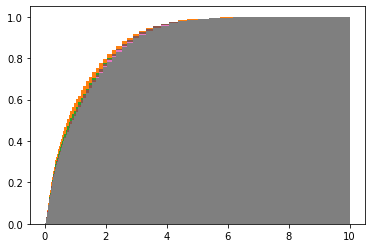

In [41]:
g1_2,bins,_ = plt.hist(minimum1,bins,density=True,cumulative = True)
g2_2,bins,_  = plt.hist(minimum2,bins,density=True,cumulative = True)
g3_2,bins,_  = plt.hist(minimum3,bins,density=True,cumulative = True)
g4_2,bins,_  = plt.hist(minimum4,bins,density=True,cumulative = True)
g5_2,bins,_  = plt.hist(minimum5,bins,density=True,cumulative = True)
g6_2,bins,_  = plt.hist(minimum6,bins,density=True,cumulative = True)
g7_2,bins,_  = plt.hist(minimum7,bins,density=True,cumulative = True)
g8_2,bins,_  = plt.hist(minimum8,bins,density=True,cumulative = True)

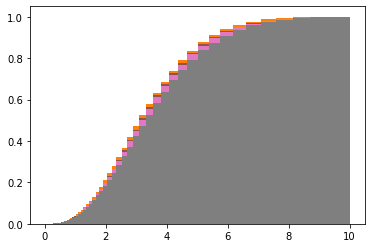

In [42]:
f1_2,bins,_  = plt.hist(minimum_r1,bins,density=True,cumulative = True)
f2_2,bins,_  = plt.hist(minimum_r2,bins,density=True,cumulative = True)
f3_2,bins,_  = plt.hist(minimum_r3,bins,density=True,cumulative = True)
f4_2,bins,_  = plt.hist(minimum_r4,bins,density=True,cumulative = True)
f5_2,bins,_  = plt.hist(minimum_r5,bins,density=True,cumulative = True)
f6_2,bins,_  = plt.hist(minimum_r6,bins,density=True,cumulative = True)
f7_2,bins,_  = plt.hist(minimum_r7,bins,density=True,cumulative = True)
f8_2,bins,_  = plt.hist(minimum_r8,bins,density=True,cumulative = True)

In [43]:
j1_2 = (np.ones(100)-g1_2)/(np.ones(100)-f1_2)
j2_2 = (np.ones(100)-g2_2)/(np.ones(100)-f2_2)
j3_2 = (np.ones(100)-g3_2)/(np.ones(100)-f3_2)
j4_2 = (np.ones(100)-g4_2)/(np.ones(100)-f4_2)
j5_2 = (np.ones(100)-g5_2)/(np.ones(100)-f5_2)
j6_2 = (np.ones(100)-g6_2)/(np.ones(100)-f6_2)
j7_2 = (np.ones(100)-g7_2)/(np.ones(100)-f7_2)
j8_2 = (np.ones(100)-g8_2)/(np.ones(100)-f8_2)

/home/zb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/home/zb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/home/zb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/home/zb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/home/zb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


In [44]:
j_mean_2= np.mean((j1_2,j2_2,j3_2,j4_2,j5_2,j6_2,j7_2,j8_2),axis = 0)
j_std_2 = np.std((j1_2,j2_2,j3_2,j4_2,j5_2,j6_2,j7_2,j8_2),axis = 0)

In [45]:
x1 = g3_1['x'].values
y1 = g3_1['y'].values
z1 = g3_1['z'].values

x2 = g3_2['x'].values
y2 = g3_2['y'].values
z2 = g3_2['z'].values

x3 = g3_3['x'].values
y3 = g3_3['y'].values
z3 = g3_3['z'].values

x4 = g3_4['x'].values
y4 = g3_4['y'].values
z4 = g3_4['z'].values

x5 = g3_5['x'].values
y5 = g3_5['y'].values
z5 = g3_5['z'].values

x6 = g3_6['x'].values
y6 = g3_6['y'].values
z6 = g3_6['z'].values

x7 = g3_7['x'].values
y7 = g3_7['y'].values
z7 = g3_7['z'].values

x8 = g3_8['x'].values
y8 = g3_8['y'].values
z8 = g3_8['z'].values

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
%%time
minimum1 = []
for i in range(len(x1)):
    dist = []
        
    for j in range(len(x1)):
        if (j != i ):
            dist.append(distance(x1[i],y1[i],z1[i],x1[j],y1[j],z1[j]))
    minimum1.append(min(dist))
    
print(len(minimum1))

xr = np.random.uniform(np.amin(x1),np.amax(x1),len(x1))
yr = np.random.uniform(np.amin(y1),np.amax(y1),len(y1))
zr = np.random.uniform(np.amin(z1),np.amax(z1),len(z1))

minimum_r1 = []
for i in range(len(xr)):
    dist = []
        
    for j in range(len(xr)):
        if (j != i ):
            dist.append(distance(xr[i],yr[i],zr[i],x1[j],y1[j],z1[j]))
    minimum_r1.append(min(dist))
    
print(len(minimum_r1))

In [ ]:
%%time
minimum2 = []
for i in range(len(x2)):
    dist = []
        
    for j in range(len(x2)):
        if (j != i ):
            dist.append(distance(x2[i],y2[i],z2[i],x2[j],y2[j],z2[j]))
    minimum2.append(min(dist))
    
print(len(minimum2))

xr = np.random.uniform(np.amin(x2),np.amax(x2),len(x2))
yr = np.random.uniform(np.amin(y2),np.amax(y2),len(y2))
zr = np.random.uniform(np.amin(z2),np.amax(z2),len(z2))

minimum_r2 = []
for i in range(len(xr)):
    dist = []
        
    for j in range(len(xr)):
        if (j != i ):
            dist.append(distance(xr[i],yr[i],zr[i],x2[j],y2[j],z2[j]))
    minimum_r2.append(min(dist))
    
print(len(minimum_r2))

In [ ]:
%%time
minimum3 = []
for i in range(len(x3)):
    dist = []
        
    for j in range(len(x3)):
        if (j != i ):
            dist.append(distance(x3[i],y3[i],z3[i],x3[j],y3[j],z3[j]))
    minimum3.append(min(dist))
    
print(len(minimum3))

xr = np.random.uniform(np.amin(x3),np.amax(x3),len(x3))
yr = np.random.uniform(np.amin(y3),np.amax(y3),len(y3))
zr = np.random.uniform(np.amin(z3),np.amax(z3),len(z3))

minimum_r3 = []
for i in range(len(xr)):
    dist = []
        
    for j in range(len(xr)):
        if (j != i ):
            dist.append(distance(xr[i],yr[i],zr[i],x3[j],y3[j],z3[j]))
    minimum_r3.append(min(dist))
    
print(len(minimum_r3))

In [ ]:
%%time
minimum4 = []
for i in range(len(x4)):
    dist = []
        
    for j in range(len(x4)):
        if (j != i ):
            dist.append(distance(x4[i],y4[i],z4[i],x4[j],y4[j],z4[j]))
    minimum4.append(min(dist))
    
print(len(minimum4))

xr = np.random.uniform(np.amin(x4),np.amax(x4),len(x4))
yr = np.random.uniform(np.amin(y4),np.amax(y4),len(y4))
zr = np.random.uniform(np.amin(z4),np.amax(z4),len(z4))

minimum_r4 = []
for i in range(len(xr)):
    dist = []
        
    for j in range(len(xr)):
        if (j != i ):
            dist.append(distance(xr[i],yr[i],zr[i],x4[j],y4[j],z4[j]))
    minimum_r4.append(min(dist))
    
print(len(minimum_r4))

In [ ]:
%%time
minimum5 = []
for i in range(len(x5)):
    dist = []
        
    for j in range(len(x5)):
        if (j != i ):
            dist.append(distance(x5[i],y5[i],z5[i],x5[j],y5[j],z5[j]))
    minimum5.append(min(dist))
    
print(len(minimum5))

xr = np.random.uniform(np.amin(x5),np.amax(x5),len(x5))
yr = np.random.uniform(np.amin(y5),np.amax(y5),len(y5))
zr = np.random.uniform(np.amin(z5),np.amax(z5),len(z5))

minimum_r5 = []
for i in range(len(xr)):
    dist = []
        
    for j in range(len(xr)):
        if (j != i ):
            dist.append(distance(xr[i],yr[i],zr[i],x5[j],y5[j],z5[j]))
    minimum_r5.append(min(dist))
    
print(len(minimum_r5))

In [ ]:
%%time
minimum6 = []
for i in range(len(x6)):
    dist = []
        
    for j in range(len(x6)):
        if (j != i ):
            dist.append(distance(x6[i],y6[i],z6[i],x6[j],y6[j],z6[j]))
    minimum6.append(min(dist))
    
print(len(minimum6))

xr = np.random.uniform(np.amin(x6),np.amax(x6),len(x6))
yr = np.random.uniform(np.amin(y6),np.amax(y6),len(y6))
zr = np.random.uniform(np.amin(z6),np.amax(z6),len(z6))

minimum_r6 = []
for i in range(len(xr)):
    dist = []
        
    for j in range(len(xr)):
        if (j != i ):
            dist.append(distance(xr[i],yr[i],zr[i],x6[j],y6[j],z6[j]))
    minimum_r6.append(min(dist))
    
print(len(minimum_r6))

In [ ]:
%%time
minimum7 = []
for i in range(len(x7)):
    dist = []
        
    for j in range(len(x7)):
        if (j != i ):
            dist.append(distance(x7[i],y7[i],z7[i],x7[j],y7[j],z7[j]))
    minimum7.append(min(dist))
    
print(len(minimum7))

xr = np.random.uniform(np.amin(x7),np.amax(x7),len(x7))
yr = np.random.uniform(np.amin(y7),np.amax(y7),len(y7))
zr = np.random.uniform(np.amin(z7),np.amax(z7),len(z7))

minimum_r7 = []
for i in range(len(xr)):
    dist = []
        
    for j in range(len(xr)):
        if (j != i ):
            dist.append(distance(xr[i],yr[i],zr[i],x7[j],y7[j],z7[j]))
    minimum_r7.append(min(dist))
    
print(len(minimum_r7))

In [ ]:
%%time
minimum8 = []
for i in range(len(x8)):
    dist = []
        
    for j in range(len(x8)):
        if (j != i ):
            dist.append(distance(x8[i],y8[i],z8[i],x8[j],y8[j],z8[j]))
    minimum8.append(min(dist))
    
print(len(minimum8))

xr = np.random.uniform(np.amin(x8),np.amax(x8),len(x8))
yr = np.random.uniform(np.amin(y8),np.amax(y8),len(y8))
zr = np.random.uniform(np.amin(z8),np.amax(z8),len(z8))

minimum_r8 = []
for i in range(len(xr)):
    dist = []
        
    for j in range(len(xr)):
        if (j != i ):
            dist.append(distance(xr[i],yr[i],zr[i],x8[j],y8[j],z8[j]))
    minimum_r8.append(min(dist))
    
print(len(minimum_r8))

In [ ]:
pd.DataFrame(np.array(minimum1)).to_csv('1min_g3_newn.csv',index = False)
pd.DataFrame(np.array(minimum_r1)).to_csv('1rmin_g3_newn.csv',index = False)
pd.DataFrame(np.array(minimum2)).to_csv('2min_g3_newn.csv',index = False)
pd.DataFrame(np.array(minimum_r2)).to_csv('2rmin_g3_newn.csv',index = False)
pd.DataFrame(np.array(minimum3)).to_csv('3min_g3_newn.csv',index = False)
pd.DataFrame(np.array(minimum_r3)).to_csv('3rmin_g3_newn.csv',index = False)
pd.DataFrame(np.array(minimum4)).to_csv('4min_g3_newn.csv',index = False)
pd.DataFrame(np.array(minimum_r4)).to_csv('4rmin_g3_newn.csv',index = False)
pd.DataFrame(np.array(minimum5)).to_csv('5min_g3_newn.csv',index = False)
pd.DataFrame(np.array(minimum_r5)).to_csv('5rmin_g3_newn.csv',index = False)
pd.DataFrame(np.array(minimum6)).to_csv('6min_g3_newn.csv',index = False)
pd.DataFrame(np.array(minimum_r6)).to_csv('6rmin_g3_newn.csv',index = False)
pd.DataFrame(np.array(minimum7)).to_csv('7min_g3_newn.csv',index = False)
pd.DataFrame(np.array(minimum_r7)).to_csv('7rmin_g3_newn.csv',index = False)
pd.DataFrame(np.array(minimum8)).to_csv('8min_g3_newn.csv',index = False)
pd.DataFrame(np.array(minimum_r8)).to_csv('8rmin_g3_newn.csv',index = False)

In [ ]:
minimum1 = np.array(minimum1)
minimum2 = np.array(minimum2)
minimum3 = np.array(minimum3)
minimum4 = np.array(minimum4)
minimum5 = np.array(minimum5)
minimum6 = np.array(minimum6)
minimum7 = np.array(minimum7)
minimum8 = np.array(minimum8)

minimum_r1 = np.array(minimum_r1)
minimum_r2 = np.array(minimum_r2)
minimum_r3 = np.array(minimum_r3)
minimum_r4 = np.array(minimum_r4)
minimum_r5 = np.array(minimum_r5)
minimum_r6 = np.array(minimum_r6)
minimum_r7 = np.array(minimum_r7)
minimum_r8 = np.array(minimum_r8)

In [ ]:
bins

In [ ]:
g1_3,bins,_ = plt.hist(minimum1,bins,density=True,cumulative = True)
g2_3,bins,_  = plt.hist(minimum2,bins,density=True,cumulative = True)
g3_3,bins,_  = plt.hist(minimum3,bins,density=True,cumulative = True)
g4_3,bins,_  = plt.hist(minimum4,bins,density=True,cumulative = True)
g5_3,bins,_  = plt.hist(minimum5,bins,density=True,cumulative = True)
g6_3,bins,_  = plt.hist(minimum6,bins,density=True,cumulative = True)
g7_3,bins,_  = plt.hist(minimum7,bins,density=True,cumulative = True)
g8_3,bins,_  = plt.hist(minimum8,bins,density=True,cumulative = True)

In [ ]:
f1_3,bins,_  = plt.hist(minimum_r1,bins,density=True,cumulative = True)
f2_3,bins,_  = plt.hist(minimum_r2,bins,density=True,cumulative = True)
f3_3,bins,_  = plt.hist(minimum_r3,bins,density=True,cumulative = True)
f4_3,bins,_  = plt.hist(minimum_r4,bins,density=True,cumulative = True)
f5_3,bins,_  = plt.hist(minimum_r5,bins,density=True,cumulative = True)
f6_3,bins,_  = plt.hist(minimum_r6,bins,density=True,cumulative = True)
f7_3,bins,_  = plt.hist(minimum_r7,bins,density=True,cumulative = True)
f8_3,bins,_  = plt.hist(minimum_r8,bins,density=True,cumulative = True)

In [ ]:
j1_3 = (np.ones(100)-g1_3)/(np.ones(100)-f1_3)
j2_3 = (np.ones(100)-g2_3)/(np.ones(100)-f2_3)
j3_3 = (np.ones(100)-g3_3)/(np.ones(100)-f3_3)
j4_3 = (np.ones(100)-g4_3)/(np.ones(100)-f4_3)
j5_3 = (np.ones(100)-g5_3)/(np.ones(100)-f5_3)
j6_3 = (np.ones(100)-g6_3)/(np.ones(100)-f6_3)
j7_3 = (np.ones(100)-g7_3)/(np.ones(100)-f7_3)
j8_3 = (np.ones(100)-g8_3)/(np.ones(100)-f8_3)

In [ ]:
j_mean_3= np.mean((j1_3,j2_3,j3_3,j4_3,j5_3,j6_3,j7_3,j8_3),axis = 0)
j_std_3 = np.std((j1_3,j2_3,j3_3,j4_3,j5_3,j6_3,j7_3,j8_3),axis = 0)

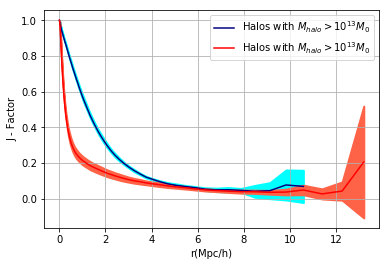

In [265]:
#plt.plot(bins[:-2], j_mean,label='poisson point process')
#plt.fill_between(bins[:-2], j_mean-j_std, j_mean+j_std,color = 'lightblue',lw=2)
bincenters = 0.5*(bins[1:]+bins[:-1])
plt.plot(bincenters, j_mean_blue,color = 'navy',label = 'Halos with $M_{halo}>10^{13}M_0$')
plt.fill_between(bincenters, j_mean_blue-j_std_blue,j_mean_blue+j_std_blue,color = 'cyan',lw=2)

plt.plot(bincenters, j_mean_red,color = 'red',label = 'Halos with $M_{halo}>10^{13}M_0$')
plt.fill_between(bincenters, j_mean_red-j_std_red,j_mean_red+j_std_red,color = 'tomato',lw=2)
#plt.xlim(0,4)
#plt.xscale('log')
#plt.xlim(0,4)
#plt.yscale('log')
plt.xlabel('r(Mpc/h)');
plt.ylabel('J - Factor')
#plt.title('Poisson Point Process');
plt.grid('on')
plt.legend(loc=0)
#plt.savefig('piosson-smdpl.jpg')

/home/zb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


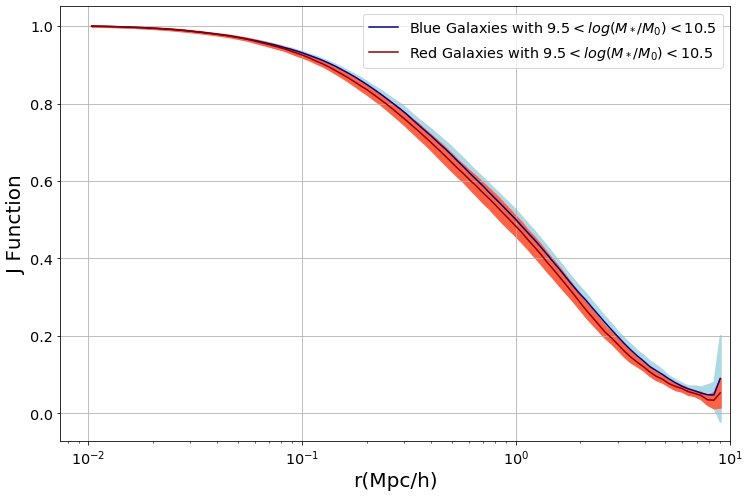

In [56]:
#plt.plot(bins[:-2], j_mean,label='poisson point process')
#plt.fill_between(bins[:-2], j_mean-j_std, j_mean+j_std,color = 'lightblue',lw=2)
fig = plt.figure(figsize=(12,8))
params = {'legend.fontsize': 'x-large',
          'font.family':'Times New Roman',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)                

bincenters = 0.5*(bins[1:]+bins[:-1])
plt.plot(bincenters, j_mean_1,color = 'navy',label = 'Blue Galaxies with $9.5<log(M_*/M_0)<10.5$')
plt.fill_between(bincenters, j_mean_1-j_std_1,j_mean_1+j_std_1,color = 'lightblue',lw=2)

plt.plot(bincenters, j_mean_2,color = 'darkred',label = 'Red Galaxies with $9.5<log(M_*/M_0)<10.5$')
plt.fill_between(bincenters, j_mean_2-j_std_2,j_mean_2+j_std_2,color = 'tomato',lw=2)
#plt.xlim(0,4)
plt.xscale('log')
plt.xlim(0,10)
#plt.yscale('log')
plt.xlabel('r(Mpc/h)',fontsize=20);
plt.ylabel('J Function',fontsize=20)
#plt.title('Poisson Point Process');
plt.grid('on')
plt.legend(loc=0)
#plt.savefig('j_function_red_blue.png')

In [58]:
v1_1 = 1 - f1_1
v2_1 = 1 - f2_1
v3_1 = 1 - f3_1
v4_1 = 1 - f4_1
v5_1 = 1 - f5_1
v6_1 = 1 - f6_1
v7_1 = 1 - f7_1
v8_1 = 1 - f8_1


v1_2 = 1 - f1_2
v2_2 = 1 - f2_2
v3_2 = 1 - f3_2
v4_2 = 1 - f4_2
v5_2 = 1 - f5_2
v6_2 = 1 - f6_2
v7_2 = 1 - f7_2
v8_2 = 1 - f8_2

In [59]:
v_mean_1= np.mean((v1_1,v2_1,v3_1,v4_1,v5_1,v6_1,v7_1,v8_1),axis = 0)
v_std_1 = np.std((v1_1,v2_1,v3_1,v4_1,v5_1,v6_1,v7_1,v8_1),axis = 0)

In [60]:
v_mean_2= np.mean((v1_2,v2_2,v3_2,v4_2,v5_2,v6_2,v7_2,v8_2),axis = 0)
v_std_2 = np.std((v1_2,v2_2,v3_2,v4_2,v5_2,v6_2,v7_2,v8_2),axis = 0)

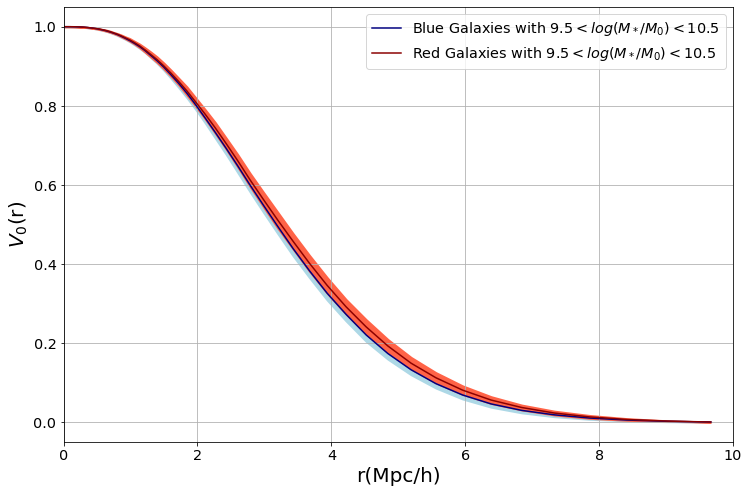

In [61]:
#plt.plot(bins[:-2], j_mean,label='poisson point process')
#plt.fill_between(bins[:-2], j_mean-j_std, j_mean+j_std,color = 'lightblue',lw=2)
fig = plt.figure(figsize=(12,8))
params = {'legend.fontsize': 'x-large',
          'font.family':'Times New Roman',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)                

bincenters = 0.5*(bins[1:]+bins[:-1])
plt.plot(bincenters, v_mean_1,color = 'navy',label = 'Blue Galaxies with $9.5<log(M_*/M_0)<10.5$')
plt.fill_between(bincenters, v_mean_1-v_std_1,v_mean_1+v_std_1,color = 'lightblue',lw=2)

plt.plot(bincenters, v_mean_2,color = 'darkred',label = 'Red Galaxies with $9.5<log(M_*/M_0)<10.5$')
plt.fill_between(bincenters, v_mean_2-v_std_2,v_mean_2+v_std_2,color = 'tomato',lw=2)
#plt.xlim(0,4)
#plt.xscale('log')
plt.xlim(0,10)
#plt.yscale('log')
plt.xlabel('r(Mpc/h)',fontsize=20);
plt.ylabel('$V_0$(r)',fontsize=20)
#plt.title('Poisson Point Process');
plt.grid('on')
plt.legend(loc=0)
#plt.savefig('void_red_blue.png')

In [ ]:
fig = plt.figure(figsize=(12,8))
params = {'legend.fontsize': 'x-large',
          
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)                
ax = fig.add_subplot(111,xlabel='r(Mpc/h)',ylabel = '$(\\xi_{red}(r)-\\xi_{blue}(r)))/\\xi_{all}(r)$')
ax.plot(bincenters,corr,color = 'purple')
ax.fill_between(bincenters,corr_rand_mean - corr_rand_std,corr_rand_mean + corr_rand_std,color = 'lightgreen')
ax.grid('on')
plt.savefig('delta_correlation.png')

In [36]:
%%time
minimum2 = []
for i in range(len(xyz_red_9_5)):
    dist = []
        
    for j in range(len(xyz_red_9_5)):
        if (j != i ):
            dist.append(distance(x_red_9_5[i],y_red_9_5[i],z_red_9_5[i],x_red_9_5[j],y_red_9_5[j],z_red_9_5[j]))
    minimum2.append(min(dist))
    
print(len(minimum2))

xr = np.random.uniform(np.amin(x_red_9_5),np.amax(x_red_9_5),len(x_red_9_5))
yr = np.random.uniform(np.amin(y_red_9_5),np.amax(y_red_9_5),len(y_red_9_5))
zr = np.random.uniform(np.amin(z_red_9_5),np.amax(z_red_9_5),len(z_red_9_5))

minimum_r2 = []
for i in range(len(xr)):
    dist = []
        
    for j in range(len(xyz_red_9_5)):
        if (j != i ):
            dist.append(distance(xr[i],yr[i],zr[i],x_red_9_5[j],y_red_9_5[j],z_red_9_5[j]))
    minimum_r2.append(min(dist))
    
print(len(minimum_r2))

19365
19365
Wall time: 2h 28min 23s


In [37]:
%%time
minimum3 = []
for i in range(len(xyz_blue_9_5)):
    dist = []
        
    for j in range(len(xyz_blue_9_5)):
        if (j != i ):
            dist.append(distance(x_blue_9_5[i],y_blue_9_5[i],z_blue_9_5[i],x_blue_9_5[j],y_blue_9_5[j],z_blue_9_5[j]))
    minimum3.append(min(dist))
    
print(len(minimum3))

xr = np.random.uniform(np.amin(x_blue_9_5),np.amax(x_blue_9_5),len(x_blue_9_5))
yr = np.random.uniform(np.amin(y_blue_9_5),np.amax(y_blue_9_5),len(y_blue_9_5))
zr = np.random.uniform(np.amin(z_blue_9_5),np.amax(z_blue_9_5),len(z_blue_9_5))

minimum_r3 = []
for i in range(len(xr)):
    dist = []
        
    for j in range(len(xyz_blue_9_5)):
        if (j != i ):
            dist.append(distance(xr[i],yr[i],zr[i],x_blue_9_5[j],y_blue_9_5[j],z_blue_9_5[j]))
    minimum_r3.append(min(dist))
    
print(len(minimum_r3))

46326
46326
Wall time: 14h 21min 40s


In [38]:
minimum_blue_9_5 = np.array(minimum3)
minimum_r_blue_9_5 = np.array(minimum_r3)
minimum_red_9_5 = np.array(minimum2)
minimum_r_red_9_5 = np.array(minimum_r2)

In [39]:
pd.DataFrame(minimum_blue_9_5).to_csv('minblue_9_5.csv',index = False)
pd.DataFrame(minimum_r_blue_9_5).to_csv('minrblue_9_5.csv',index = False)
pd.DataFrame(minimum_red_9_5).to_csv('minred_9_5.csv',index = False)
pd.DataFrame(minimum_r_red_9_5).to_csv('minrred_9_5.csv',index = False)

In [3]:
minimum_blue_9_5=np.array(pd.read_csv('minblue_9_5.csv'))
minimum_red_9_5=np.array(pd.read_csv('minred_9_5.csv'))
minimum_r_blue_9_5=np.array(pd.read_csv('minrblue_9_5.csv'))
minimum_r_red_9_5=np.array(pd.read_csv('minrred_9_5.csv'))

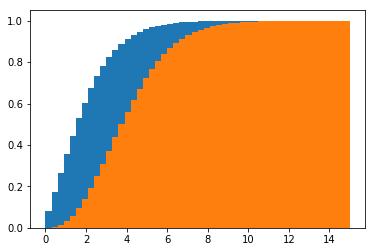

In [4]:
g_b,bins,_ = plt.hist(minimum_blue_9_5,50,density=True,cumulative = True,range=(0,15))
f_b,bins,_  = plt.hist(minimum_r_blue_9_5,50,density=True,cumulative = True,range=(0,15))

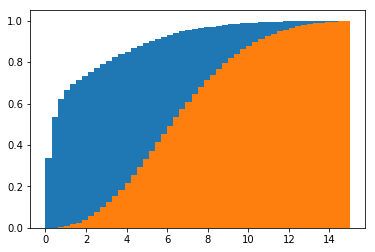

In [5]:
g_r,bins,_ = plt.hist(minimum_red_9_5,50,density=True,cumulative = True,range=(0,15))
f_r,bins,_  = plt.hist(minimum_r_red_9_5,50,density=True,cumulative = True,range=(0,15))

In [6]:
j_r = (np.ones(50)-g_r)/(np.ones(50)-f_r)

In [7]:
j_b = (np.ones(50)-g_b)/(np.ones(50)-f_b)

(0.3, 0.01)

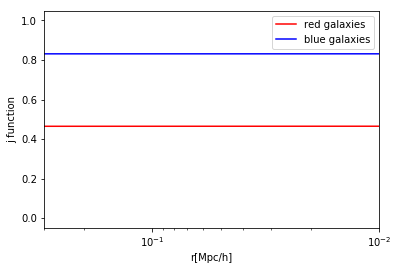

In [13]:
plt.plot(bins[:-2],j_r[:-1],color ='red',label='red galaxies')
plt.plot(bins[:-2],j_b[:-1],color ='blue',label='blue galaxies')
plt.xscale('log')
plt.xlim(0,10)
plt.ylabel('j function')
plt.xlabel('r[Mpc/h]')
plt.legend(loc=0)
#plt.yscale('log')
plt.xlim(0,0.01)

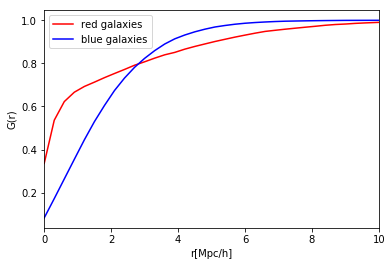

In [62]:
plt.plot(bins[:-1],g_r,color ='red',label='red galaxies')
plt.plot(bins[:-1],g_b,color ='blue',label='blue galaxies')
#plt.xscale('log')
plt.xlim(0,10)
plt.ylabel('G(r)')
plt.xlabel('r[Mpc/h]')
plt.legend(loc=0)
#plt.yscale('log')

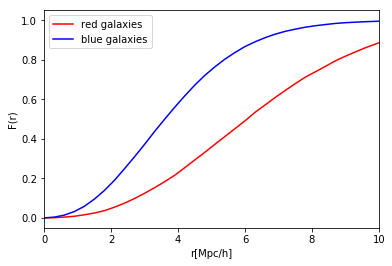

In [61]:
plt.plot(bins[:-1],f_r,color ='red',label='red galaxies')
plt.plot(bins[:-1],f_b,color ='blue',label='blue galaxies')
#plt.xscale('log')
plt.xlim(0,10)
plt.ylabel('F(r)')
plt.xlabel('r[Mpc/h]')
plt.legend(loc=0)
#plt.yscale('log')

In [59]:
V_b = 1 - f_b
V_r = 1 - f_r

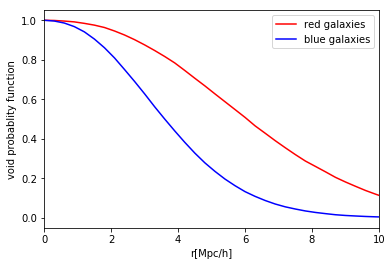

In [60]:
plt.plot(bins[:-1],V_r,color ='red',label='red galaxies')
plt.plot(bins[:-1],V_b,color ='blue',label='blue galaxies')
#plt.xscale('log')
plt.xlim(0,10)
plt.ylabel('void probablity function')
plt.xlabel('r[Mpc/h]')
plt.legend(loc=0)
#plt.yscale('log')

In [79]:
import random
gg = random.sample(minimum3,len(minimum2))
ff = random.sample(minimum_r3,len(minimum_r2))

In [85]:
len(minimum_r2)

19365

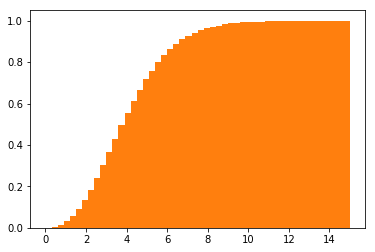

In [81]:
ff_r,bins,_  = plt.hist(np.array(minimum_r2),50,density=True,cumulative = True,range=(0,15))
ff_b,bins,_  = plt.hist(np.array(ff),50,density=True,cumulative = True,range=(0,15))

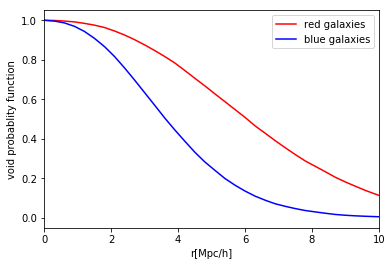

In [82]:
plt.plot(bins[:-1],1-ff_r,color ='red',label='red galaxies')
plt.plot(bins[:-1],1-ff_b,color ='blue',label='blue galaxies')
#plt.xscale('log')
plt.xlim(0,10)
plt.ylabel('void probablity function')
plt.xlabel('r[Mpc/h]')
plt.legend(loc=0)
#plt.yscale('log')

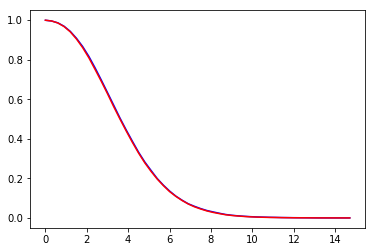

In [87]:
plt.plot(bins[:-1],1-ff_b,color ='blue',label='blue galaxies')
plt.plot(bins[:-1],V_b,color ='red',label='blue galaxies')

In [72]:
rbins = np.linspace(0.001,10,50)
from halotools import mock_observables
v1 = mock_observables.void_prob_func(xyz_red_9_5,rbins,n_ran=len(xyz_red_9_5))
v2 = mock_observables.void_prob_func(xyz_blue_9_5,rbins,n_ran=len(xyz_blue_9_5))

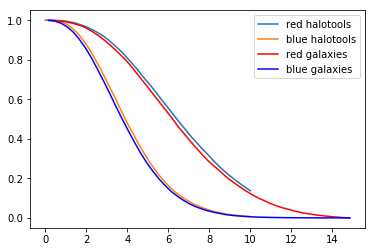

In [77]:
bincenters = 0.5*(bins[1:] + bins[:-1])
plt.plot(rbins,v1,label='red halotools')
plt.plot(rbins,v2,label='blue halotools')
plt.plot(bincenters,V_r,color ='red',label='red galaxies')
plt.plot(bincenters,V_b,color ='blue',label='blue galaxies')
plt.legend(loc=0)

# assembly bias

In [25]:
xyz_blue = gal_blue[['x','y','z']]/1000
xyz_red =gal_red[['x','y','z']]/1000
xyz_all =gal[['x','y','z']]/1000

In [26]:
len(xyz_all)

515334

In [27]:
blue_1 = xyz_blue[(xyz_blue['x']<102.5)&(xyz_blue['y']<102.5)&(xyz_blue['z']<102.5)]
blue_2 = xyz_blue[(xyz_blue['x']<102.5)&(xyz_blue['y']<102.5)&(xyz_blue['z']>102.5)]
blue_3 = xyz_blue[(xyz_blue['x']<102.5)&(xyz_blue['y']>102.5)&(xyz_blue['z']<102.5)]
blue_4 = xyz_blue[(xyz_blue['x']>102.5)&(xyz_blue['y']<102.5)&(xyz_blue['z']<102.5)]
blue_5 = xyz_blue[(xyz_blue['x']>102.5)&(xyz_blue['y']>102.5)&(xyz_blue['z']<102.5)]
blue_6 = xyz_blue[(xyz_blue['x']>102.5)&(xyz_blue['y']<102.5)&(xyz_blue['z']>102.5)]
blue_7 = xyz_blue[(xyz_blue['x']<102.5)&(xyz_blue['y']>102.5)&(xyz_blue['z']>102.5)]
blue_8 = xyz_blue[(xyz_blue['x']>102.5)&(xyz_blue['y']>102.5)&(xyz_blue['z']>102.5)]

In [28]:
red_1 = xyz_red[(xyz_red['x']<102.5)&(xyz_red['y']<102.5)&(xyz_red['z']<102.5)]
red_2 = xyz_red[(xyz_red['x']<102.5)&(xyz_red['y']<102.5)&(xyz_red['z']>102.5)]
red_3 = xyz_red[(xyz_red['x']<102.5)&(xyz_red['y']>102.5)&(xyz_red['z']<102.5)]
red_4 = xyz_red[(xyz_red['x']>102.5)&(xyz_red['y']<102.5)&(xyz_red['z']<102.5)]
red_5 = xyz_red[(xyz_red['x']>102.5)&(xyz_red['y']>102.5)&(xyz_red['z']<102.5)]
red_6 = xyz_red[(xyz_red['x']>102.5)&(xyz_red['y']<102.5)&(xyz_red['z']>102.5)]
red_7 = xyz_red[(xyz_red['x']<102.5)&(xyz_red['y']>102.5)&(xyz_red['z']>102.5)]
red_8 = xyz_red[(xyz_red['x']>102.5)&(xyz_red['y']>102.5)&(xyz_red['z']>102.5)]

In [29]:
all_1 = xyz_all[(xyz_all['x']<102.5)&(xyz_all['y']<102.5)&(xyz_all['z']<102.5)]
all_2 = xyz_all[(xyz_all['x']<102.5)&(xyz_all['y']<102.5)&(xyz_all['z']>102.5)]
all_3 = xyz_all[(xyz_all['x']<102.5)&(xyz_all['y']>102.5)&(xyz_all['z']<102.5)]
all_4 = xyz_all[(xyz_all['x']>102.5)&(xyz_all['y']<102.5)&(xyz_all['z']<102.5)]
all_5 = xyz_all[(xyz_all['x']>102.5)&(xyz_all['y']>102.5)&(xyz_all['z']<102.5)]
all_6 = xyz_all[(xyz_all['x']>102.5)&(xyz_all['y']<102.5)&(xyz_all['z']>102.5)]
all_7 = xyz_all[(xyz_all['x']<102.5)&(xyz_all['y']>102.5)&(xyz_all['z']>102.5)]
all_8 = xyz_all[(xyz_all['x']>102.5)&(xyz_all['y']>102.5)&(xyz_all['z']>102.5)]

In [30]:
xyz_blue_1 = blue_1[['x','y','z']].values

xyz_blue_2 = blue_2[['x','y','z']].values

xyz_blue_3 = blue_3[['x','y','z']].values

xyz_blue_4 = blue_4[['x','y','z']].values

xyz_blue_5 = blue_5[['x','y','z']].values

xyz_blue_6 = blue_6[['x','y','z']].values

xyz_blue_7 = blue_7[['x','y','z']].values

xyz_blue_8 = blue_8[['x','y','z']].values


In [31]:
xyz_red_1 = red_1[['x','y','z']].values

xyz_red_2 = red_2[['x','y','z']].values

xyz_red_3 = red_3[['x','y','z']].values

xyz_red_4 = red_4[['x','y','z']].values

xyz_red_5 = red_5[['x','y','z']].values

xyz_red_6 = red_6[['x','y','z']].values

xyz_red_7 = red_7[['x','y','z']].values

xyz_red_8 = red_8[['x','y','z']].values

In [32]:
xyz_all_1 = all_1[['x','y','z']].values

xyz_all_2 = all_2[['x','y','z']].values

xyz_all_3 = all_3[['x','y','z']].values

xyz_all_4 = all_4[['x','y','z']].values

xyz_all_5 = all_5[['x','y','z']].values

xyz_all_6 = all_6[['x','y','z']].values

xyz_all_7 = all_7[['x','y','z']].values

xyz_all_8 = all_8[['x','y','z']].values

In [77]:
bins = np.logspace(-1,1.3,10)
bincenters= 0.5*(bins[1:]+bins[:-1])

In [78]:
bins

array([ 0.1       ,  0.18011735,  0.32442261,  0.58434141,  1.05250029,
        1.89573565,  3.41454887,  6.15019504, 11.07756851, 19.95262315])

In [79]:
from Corrfunc.utils import convert_3d_counts_to_cf

In [80]:
from Corrfunc.theory.DD import DD
autocorr = 1
nthreads=2
N = len(xyz_blue_1)
X = xyz_blue_1[:,0]
Y =  xyz_blue_1[:,1]
Z =  xyz_blue_1[:,2]


#################################
dd = DD(autocorr, nthreads, bins, X, Y,Z,periodic=False, verbose=True)

rand_N = 3*N
rand_X =np.float32(np.random.uniform(np.amin(X), np.amax(X), rand_N))
rand_Y =np.float32(np.random.uniform(np.amin(Y), np.amax(Y), rand_N))
rand_Z = np.float32(np.random.uniform(np.amin(Z), np.amax(Z), rand_N))

autocorr = 0
nthreads=2
DR= DD(autocorr, nthreads, bins, X, Y, Z,X2 = rand_X, Y2 = rand_Y,Z2=rand_Z,periodic=False, verbose=True)

autocorr = 1
nthreads=2
RR = DD(autocorr, nthreads, bins, rand_X, rand_Y, rand_Z,periodic=False, verbose=True)
###################################

cf_blue_1 = convert_3d_counts_to_cf(N, N, 3*N, 3*N,dd, DR, DR, RR)


In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 10,10,5.  Time taken =   0.003 sec
countpairs_float> gridlink seems inefficient. nmesh = (10, 10, 5); avg_np = 76.3. Boosting bin refine factor - should lead to better performance
xmin = 0.005039 xmax=102.499870 rpmax = 19.952623
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 15,15,5.  Time taken =   0.003 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.075 secs
ND1 =        38130 [xmin,ymin,zmin] = [0.005039,0.003587,0.001462], [xmax,ymax,zmax] = [102.499870,102.498245,102.499306]
ND2 =       114390 [xmin,ymin,zmin] = [0.005039,0.003587,0.001462], [xmax,ymax,zmax] = [102.499870,102.498245,102.499306]
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 10,10,5.  Time taken =   0.003 sec
countpairs_float> gridlink seems inefficient. nmesh = (10, 10, 5); avg_np = 76.3. Boosting bin refine factor - s

In [81]:
from Corrfunc.theory.DD import DD
autocorr = 1
nthreads=2
N = len(xyz_blue_2)
X = xyz_blue_2[:,0]
Y =  xyz_blue_2[:,1]
Z =  xyz_blue_2[:,2]


#################################
dd = DD(autocorr, nthreads, bins, X, Y,Z,periodic=False, verbose=True)

rand_N = 3*N
rand_X =np.float32(np.random.uniform(np.amin(X), np.amax(X), rand_N))
rand_Y =np.float32(np.random.uniform(np.amin(Y), np.amax(Y), rand_N))
rand_Z = np.float32(np.random.uniform(np.amin(Z), np.amax(Z), rand_N))

autocorr = 0
nthreads=2
DR= DD(autocorr, nthreads, bins, X, Y, Z,X2 = rand_X, Y2 = rand_Y,Z2=rand_Z,periodic=False, verbose=True)

autocorr = 1
nthreads=2
RR = DD(autocorr, nthreads, bins, rand_X, rand_Y, rand_Z,periodic=False, verbose=True)
###################################

cf_blue_2 = convert_3d_counts_to_cf(N, N, 3*N, 3*N,dd, DR, DR, RR)


In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 10,10,5.  Time taken =   0.005 sec
countpairs_float> gridlink seems inefficient. nmesh = (10, 10, 5); avg_np = 89.6. Boosting bin refine factor - should lead to better performance
xmin = 0.002310 xmax=102.499260 rpmax = 19.952623
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 15,15,5.  Time taken =   0.006 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.114 secs
ND1 =        44790 [xmin,ymin,zmin] = [0.002310,0.002172,102.501968], [xmax,ymax,zmax] = [102.499260,102.498016,204.999146]
ND2 =       134370 [xmin,ymin,zmin] = [0.002310,0.002172,102.501968], [xmax,ymax,zmax] = [102.499260,102.498016,204.999146]
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 10,10,5.  Time taken =   0.004 sec
countpairs_float> gridlink seems inefficient. nmesh = (10, 10, 5); avg_np = 89.6. Boosting bin refine factor

In [82]:
from Corrfunc.theory.DD import DD
autocorr = 1
nthreads=2
N = len(xyz_blue_3)
X = xyz_blue_3[:,0]
Y =  xyz_blue_3[:,1]
Z =  xyz_blue_3[:,2]


#################################
dd = DD(autocorr, nthreads, bins, X, Y,Z,periodic=False, verbose=True)

rand_N = 3*N
rand_X =np.float32(np.random.uniform(np.amin(X), np.amax(X), rand_N))
rand_Y =np.float32(np.random.uniform(np.amin(Y), np.amax(Y), rand_N))
rand_Z = np.float32(np.random.uniform(np.amin(Z), np.amax(Z), rand_N))

autocorr = 0
nthreads=2
DR= DD(autocorr, nthreads, bins, X, Y, Z,X2 = rand_X, Y2 = rand_Y,Z2=rand_Z,periodic=False, verbose=True)

autocorr = 1
nthreads=2
RR = DD(autocorr, nthreads, bins, rand_X, rand_Y, rand_Z,periodic=False, verbose=True)
###################################

cf_blue_3 = convert_3d_counts_to_cf(N, N, 3*N, 3*N,dd, DR, DR, RR)


In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 10,10,5.  Time taken =   0.003 sec
countpairs_float> gridlink seems inefficient. nmesh = (10, 10, 5); avg_np = 80. Boosting bin refine factor - should lead to better performance
xmin = 0.006119 xmax=102.497055 rpmax = 19.952623
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 15,15,5.  Time taken =   0.004 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.081 secs
ND1 =        39977 [xmin,ymin,zmin] = [0.006119,102.506363,0.002515], [xmax,ymax,zmax] = [102.497055,204.996887,102.499763]
ND2 =       119931 [xmin,ymin,zmin] = [0.006119,102.506363,0.002515], [xmax,ymax,zmax] = [102.497055,204.996887,102.499763]
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 10,10,5.  Time taken =   0.004 sec
countpairs_float> gridlink seems inefficient. nmesh = (10, 10, 5); avg_np = 80. Boosting bin refine factor - s

In [83]:
from Corrfunc.theory.DD import DD
autocorr = 1
nthreads=2
N = len(xyz_blue_4)
X = xyz_blue_4[:,0]
Y =  xyz_blue_4[:,1]
Z =  xyz_blue_4[:,2]


#################################
dd = DD(autocorr, nthreads, bins, X, Y,Z,periodic=False, verbose=True)

rand_N = 3*N
rand_X =np.float32(np.random.uniform(np.amin(X), np.amax(X), rand_N))
rand_Y =np.float32(np.random.uniform(np.amin(Y), np.amax(Y), rand_N))
rand_Z = np.float32(np.random.uniform(np.amin(Z), np.amax(Z), rand_N))

autocorr = 0
nthreads=2
DR= DD(autocorr, nthreads, bins, X, Y, Z,X2 = rand_X, Y2 = rand_Y,Z2=rand_Z,periodic=False, verbose=True)

autocorr = 1
nthreads=2
RR = DD(autocorr, nthreads, bins, rand_X, rand_Y, rand_Z,periodic=False, verbose=True)
###################################

cf_blue_4 = convert_3d_counts_to_cf(N, N, 3*N, 3*N,dd, DR, DR, RR)


In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 10,10,5.  Time taken =   0.003 sec
countpairs_float> gridlink seems inefficient. nmesh = (10, 10, 5); avg_np = 79. Boosting bin refine factor - should lead to better performance
xmin = 102.500130 xmax=204.996490 rpmax = 19.952623
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 15,15,5.  Time taken =   0.004 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.086 secs
ND1 =        39514 [xmin,ymin,zmin] = [102.500130,0.000528,0.000877], [xmax,ymax,zmax] = [204.996490,102.497955,102.499741]
ND2 =       118542 [xmin,ymin,zmin] = [102.500130,0.000528,0.000877], [xmax,ymax,zmax] = [204.996490,102.497955,102.499741]
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 10,10,5.  Time taken =   0.003 sec
countpairs_float> gridlink seems inefficient. nmesh = (10, 10, 5); avg_np = 79. Boosting bin refine factor -

In [84]:
from Corrfunc.theory.DD import DD
autocorr = 1
nthreads=2
N = len(xyz_blue_5)
X = xyz_blue_5[:,0]
Y =  xyz_blue_5[:,1]
Z =  xyz_blue_5[:,2]


#################################
dd = DD(autocorr, nthreads, bins, X, Y,Z,periodic=False, verbose=True)

rand_N = 3*N
rand_X =np.float32(np.random.uniform(np.amin(X), np.amax(X), rand_N))
rand_Y =np.float32(np.random.uniform(np.amin(Y), np.amax(Y), rand_N))
rand_Z = np.float32(np.random.uniform(np.amin(Z), np.amax(Z), rand_N))

autocorr = 0
nthreads=2
DR= DD(autocorr, nthreads, bins, X, Y, Z,X2 = rand_X, Y2 = rand_Y,Z2=rand_Z,periodic=False, verbose=True)

autocorr = 1
nthreads=2
RR = DD(autocorr, nthreads, bins, rand_X, rand_Y, rand_Z,periodic=False, verbose=True)
###################################

cf_blue_5 = convert_3d_counts_to_cf(N, N, 3*N, 3*N,dd, DR, DR, RR)


In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 10,10,5.  Time taken =   0.004 sec
countpairs_float> gridlink seems inefficient. nmesh = (10, 10, 5); avg_np = 72. Boosting bin refine factor - should lead to better performance
xmin = 102.500259 xmax=204.996277 rpmax = 19.952623
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 15,15,5.  Time taken =   0.004 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.088 secs
ND1 =        35999 [xmin,ymin,zmin] = [102.500259,102.500633,0.001301], [xmax,ymax,zmax] = [204.996277,204.994888,102.498596]
ND2 =       107997 [xmin,ymin,zmin] = [102.500259,102.500633,0.001301], [xmax,ymax,zmax] = [204.996277,204.994888,102.498596]
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 10,10,5.  Time taken =   0.003 sec
countpairs_float> gridlink seems inefficient. nmesh = (10, 10, 5); avg_np = 72. Boosting bin refine fact

In [85]:
from Corrfunc.theory.DD import DD
autocorr = 1
nthreads=2
N = len(xyz_blue_6)
X = xyz_blue_6[:,0]
Y =  xyz_blue_6[:,1]
Z =  xyz_blue_6[:,2]


#################################
dd = DD(autocorr, nthreads, bins, X, Y,Z,periodic=False, verbose=True)

rand_N = 3*N
rand_X =np.float32(np.random.uniform(np.amin(X), np.amax(X), rand_N))
rand_Y =np.float32(np.random.uniform(np.amin(Y), np.amax(Y), rand_N))
rand_Z = np.float32(np.random.uniform(np.amin(Z), np.amax(Z), rand_N))

autocorr = 0
nthreads=2
DR= DD(autocorr, nthreads, bins, X, Y, Z,X2 = rand_X, Y2 = rand_Y,Z2=rand_Z,periodic=False, verbose=True)

autocorr = 1
nthreads=2
RR = DD(autocorr, nthreads, bins, rand_X, rand_Y, rand_Z,periodic=False, verbose=True)
###################################

cf_blue_6 = convert_3d_counts_to_cf(N, N, 3*N, 3*N,dd, DR, DR, RR)


In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 10,10,5.  Time taken =   0.003 sec
countpairs_float> gridlink seems inefficient. nmesh = (10, 10, 5); avg_np = 82.4. Boosting bin refine factor - should lead to better performance
xmin = 102.513000 xmax=204.998001 rpmax = 19.952623
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 15,15,5.  Time taken =   0.004 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.105 secs
ND1 =        41213 [xmin,ymin,zmin] = [102.513000,0.002054,102.501442], [xmax,ymax,zmax] = [204.998001,102.499680,204.999405]
ND2 =       123639 [xmin,ymin,zmin] = [102.513000,0.002054,102.501442], [xmax,ymax,zmax] = [204.998001,102.499680,204.999405]
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 10,10,5.  Time taken =   0.003 sec
countpairs_float> gridlink seems inefficient. nmesh = (10, 10, 5); avg_np = 82.4. Boosting bin refine 

In [86]:
from Corrfunc.theory.DD import DD
autocorr = 1
nthreads=2
N = len(xyz_blue_7)
X = xyz_blue_7[:,0]
Y =  xyz_blue_7[:,1]
Z =  xyz_blue_7[:,2]


#################################
dd = DD(autocorr, nthreads, bins, X, Y,Z,periodic=False, verbose=True)

rand_N = 3*N
rand_X =np.float32(np.random.uniform(np.amin(X), np.amax(X), rand_N))
rand_Y =np.float32(np.random.uniform(np.amin(Y), np.amax(Y), rand_N))
rand_Z = np.float32(np.random.uniform(np.amin(Z), np.amax(Z), rand_N))

autocorr = 0
nthreads=2
DR= DD(autocorr, nthreads, bins, X, Y, Z,X2 = rand_X, Y2 = rand_Y,Z2=rand_Z,periodic=False, verbose=True)

autocorr = 1
nthreads=2
RR = DD(autocorr, nthreads, bins, rand_X, rand_Y, rand_Z,periodic=False, verbose=True)
###################################

cf_blue_7 = convert_3d_counts_to_cf(N, N, 3*N, 3*N,dd, DR, DR, RR)


In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 10,10,5.  Time taken =   0.003 sec
countpairs_float> gridlink seems inefficient. nmesh = (10, 10, 5); avg_np = 79. Boosting bin refine factor - should lead to better performance
xmin = 0.000780 xmax=102.492104 rpmax = 19.952623
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 15,15,5.  Time taken =   0.004 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.098 secs
ND1 =        39491 [xmin,ymin,zmin] = [0.000780,102.504349,102.503685], [xmax,ymax,zmax] = [102.492104,204.999466,204.999359]
ND2 =       118473 [xmin,ymin,zmin] = [0.000780,102.504349,102.503685], [xmax,ymax,zmax] = [102.492104,204.999466,204.999359]
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 10,10,5.  Time taken =   0.003 sec
countpairs_float> gridlink seems inefficient. nmesh = (10, 10, 5); avg_np = 79. Boosting bin refine factor

In [87]:
from Corrfunc.theory.DD import DD
autocorr = 1
nthreads=2
N = len(xyz_blue_8)
X = xyz_blue_8[:,0]
Y =  xyz_blue_8[:,1]
Z =  xyz_blue_8[:,2]


#################################
dd = DD(autocorr, nthreads, bins, X, Y,Z,periodic=False, verbose=True)

rand_N = 3*N
rand_X =np.float32(np.random.uniform(np.amin(X), np.amax(X), rand_N))
rand_Y =np.float32(np.random.uniform(np.amin(Y), np.amax(Y), rand_N))
rand_Z = np.float32(np.random.uniform(np.amin(Z), np.amax(Z), rand_N))

autocorr = 0
nthreads=2
DR= DD(autocorr, nthreads, bins, X, Y, Z,X2 = rand_X, Y2 = rand_Y,Z2=rand_Z,periodic=False, verbose=True)

autocorr = 1
nthreads=2
RR = DD(autocorr, nthreads, bins, rand_X, rand_Y, rand_Z,periodic=False, verbose=True)
###################################

cf_blue_8 = convert_3d_counts_to_cf(N, N, 3*N, 3*N,dd, DR, DR, RR)


In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 10,10,5.  Time taken =   0.004 sec
countpairs_float> gridlink seems inefficient. nmesh = (10, 10, 5); avg_np = 74.7. Boosting bin refine factor - should lead to better performance
xmin = 102.501770 xmax=204.999390 rpmax = 19.952623
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 15,15,5.  Time taken =   0.004 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.073 secs
ND1 =        37361 [xmin,ymin,zmin] = [102.501770,102.500412,102.506767], [xmax,ymax,zmax] = [204.999390,204.993423,204.998062]
ND2 =       112083 [xmin,ymin,zmin] = [102.501770,102.500412,102.506767], [xmax,ymax,zmax] = [204.999390,204.993423,204.998062]
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 10,10,5.  Time taken =   0.003 sec
countpairs_float> gridlink seems inefficient. nmesh = (10, 10, 5); avg_np = 74.7. Boosting bin ref

In [88]:
cf_blue_mean = np.mean((cf_blue_1,cf_blue_2,cf_blue_3,cf_blue_4,cf_blue_5,cf_blue_6,cf_blue_7,cf_blue_8),axis = 0)
cf_blue_std = np.std((cf_blue_1,cf_blue_2,cf_blue_3,cf_blue_4,cf_blue_5,cf_blue_6,cf_blue_7,cf_blue_8),axis = 0)

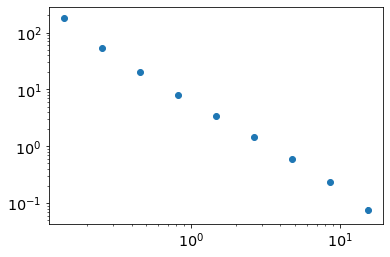

In [89]:
plt.errorbar(bincenters,cf_blue_mean,yerr=cf_blue_std,fmt = 'o')
plt.xscale('log')
plt.yscale('log')

In [90]:
from Corrfunc.theory.DD import DD
autocorr = 1
nthreads=2
N = len(xyz_red_1)
X = xyz_red_1[:,0]
Y =  xyz_red_1[:,1]
Z =  xyz_red_1[:,2]


#################################
dd = DD(autocorr, nthreads, bins, X, Y,Z,periodic=False, verbose=True)

rand_N = 3*N
rand_X =np.float32(np.random.uniform(np.amin(X), np.amax(X), rand_N))
rand_Y =np.float32(np.random.uniform(np.amin(Y), np.amax(Y), rand_N))
rand_Z = np.float32(np.random.uniform(np.amin(Z), np.amax(Z), rand_N))

autocorr = 0
nthreads=2
DR= DD(autocorr, nthreads, bins, X, Y, Z,X2 = rand_X, Y2 = rand_Y,Z2=rand_Z,periodic=False, verbose=True)

autocorr = 1
nthreads=2
RR = DD(autocorr, nthreads, bins, rand_X, rand_Y, rand_Z,periodic=False, verbose=True)
###################################

cf_red_1 = convert_3d_counts_to_cf(N, N, 3*N, 3*N,dd, DR, DR, RR)


In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 10,10,5.  Time taken =   0.002 sec
countpairs_float> gridlink seems inefficient. nmesh = (10, 10, 5); avg_np = 47.4. Boosting bin refine factor - should lead to better performance
xmin = 0.009450 xmax=102.499527 rpmax = 19.952623
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 15,15,5.  Time taken =   0.004 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.043 secs
ND1 =        23691 [xmin,ymin,zmin] = [0.009450,0.003139,0.000129], [xmax,ymax,zmax] = [102.499527,102.493378,102.498573]
ND2 =        71073 [xmin,ymin,zmin] = [0.009450,0.003139,0.000129], [xmax,ymax,zmax] = [102.499527,102.493378,102.498573]
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 10,10,5.  Time taken =   0.002 sec
countpairs_float> gridlink seems inefficient. nmesh = (10, 10, 5); avg_np = 47.4. Boosting bin refine factor - s

In [91]:
from Corrfunc.theory.DD import DD
autocorr = 1
nthreads=2
N = len(xyz_red_2)
X = xyz_red_2[:,0]
Y =  xyz_red_2[:,1]
Z =  xyz_red_2[:,2]


#################################
dd = DD(autocorr, nthreads, bins, X, Y,Z,periodic=False, verbose=True)

rand_N = 3*N
rand_X =np.float32(np.random.uniform(np.amin(X), np.amax(X), rand_N))
rand_Y =np.float32(np.random.uniform(np.amin(Y), np.amax(Y), rand_N))
rand_Z = np.float32(np.random.uniform(np.amin(Z), np.amax(Z), rand_N))

autocorr = 0
nthreads=2
DR= DD(autocorr, nthreads, bins, X, Y, Z,X2 = rand_X, Y2 = rand_Y,Z2=rand_Z,periodic=False, verbose=True)

autocorr = 1
nthreads=2
RR = DD(autocorr, nthreads, bins, rand_X, rand_Y, rand_Z,periodic=False, verbose=True)
###################################

cf_red_2 = convert_3d_counts_to_cf(N, N, 3*N, 3*N,dd, DR, DR, RR)


In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 10,10,5.  Time taken =   0.003 sec
countpairs_float> gridlink seems inefficient. nmesh = (10, 10, 5); avg_np = 66.9. Boosting bin refine factor - should lead to better performance
xmin = 0.002758 xmax=102.499863 rpmax = 19.952623
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 15,15,5.  Time taken =   0.003 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.061 secs
ND1 =        33430 [xmin,ymin,zmin] = [0.002758,0.007144,102.500702], [xmax,ymax,zmax] = [102.499863,102.496513,204.998276]
ND2 =       100290 [xmin,ymin,zmin] = [0.002758,0.007144,102.500702], [xmax,ymax,zmax] = [102.499863,102.496513,204.998276]
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 10,10,5.  Time taken =   0.003 sec
countpairs_float> gridlink seems inefficient. nmesh = (10, 10, 5); avg_np = 66.9. Boosting bin refine factor

In [92]:
from Corrfunc.theory.DD import DD
autocorr = 1
nthreads=2
N = len(xyz_red_3)
X = xyz_red_3[:,0]
Y =  xyz_red_3[:,1]
Z =  xyz_red_3[:,2]


#################################
dd = DD(autocorr, nthreads, bins, X, Y,Z,periodic=False, verbose=True)

rand_N = 3*N
rand_X =np.float32(np.random.uniform(np.amin(X), np.amax(X), rand_N))
rand_Y =np.float32(np.random.uniform(np.amin(Y), np.amax(Y), rand_N))
rand_Z = np.float32(np.random.uniform(np.amin(Z), np.amax(Z), rand_N))

autocorr = 0
nthreads=2
DR= DD(autocorr, nthreads, bins, X, Y, Z,X2 = rand_X, Y2 = rand_Y,Z2=rand_Z,periodic=False, verbose=True)

autocorr = 1
nthreads=2
RR = DD(autocorr, nthreads, bins, rand_X, rand_Y, rand_Z,periodic=False, verbose=True)
###################################

cf_red_3 = convert_3d_counts_to_cf(N, N, 3*N, 3*N,dd, DR, DR, RR)


In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 10,10,5.  Time taken =   0.003 sec
countpairs_float> gridlink seems inefficient. nmesh = (10, 10, 5); avg_np = 52.6. Boosting bin refine factor - should lead to better performance
xmin = 0.000967 xmax=102.497826 rpmax = 19.952623
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 15,15,5.  Time taken =   0.004 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.052 secs
ND1 =        26276 [xmin,ymin,zmin] = [0.000967,102.505722,0.005977], [xmax,ymax,zmax] = [102.497826,204.994965,102.487236]
ND2 =        78828 [xmin,ymin,zmin] = [0.000967,102.505722,0.005977], [xmax,ymax,zmax] = [102.497826,204.994965,102.487236]
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 10,10,5.  Time taken =   0.003 sec
countpairs_float> gridlink seems inefficient. nmesh = (10, 10, 5); avg_np = 52.6. Boosting bin refine factor

In [93]:
from Corrfunc.theory.DD import DD
autocorr = 1
nthreads=2
N = len(xyz_red_4)
X = xyz_red_4[:,0]
Y =  xyz_red_4[:,1]
Z =  xyz_red_4[:,2]


#################################
dd = DD(autocorr, nthreads, bins, X, Y,Z,periodic=False, verbose=True)

rand_N = 3*N
rand_X =np.float32(np.random.uniform(np.amin(X), np.amax(X), rand_N))
rand_Y =np.float32(np.random.uniform(np.amin(Y), np.amax(Y), rand_N))
rand_Z = np.float32(np.random.uniform(np.amin(Z), np.amax(Z), rand_N))

autocorr = 0
nthreads=2
DR= DD(autocorr, nthreads, bins, X, Y, Z,X2 = rand_X, Y2 = rand_Y,Z2=rand_Z,periodic=False, verbose=True)

autocorr = 1
nthreads=2
RR = DD(autocorr, nthreads, bins, rand_X, rand_Y, rand_Z,periodic=False, verbose=True)
###################################

cf_red_4 = convert_3d_counts_to_cf(N, N, 3*N, 3*N,dd, DR, DR, RR)


In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 10,10,5.  Time taken =   0.002 sec
countpairs_float> gridlink seems inefficient. nmesh = (10, 10, 5); avg_np = 49.2. Boosting bin refine factor - should lead to better performance
xmin = 102.509689 xmax=204.999954 rpmax = 19.952623
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 15,15,5.  Time taken =   0.002 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.039 secs
ND1 =        24609 [xmin,ymin,zmin] = [102.509689,0.026791,0.001406], [xmax,ymax,zmax] = [204.999954,102.497787,102.498299]
ND2 =        73827 [xmin,ymin,zmin] = [102.509689,0.026791,0.001406], [xmax,ymax,zmax] = [204.999954,102.497787,102.498299]
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 10,10,5.  Time taken =   0.002 sec
countpairs_float> gridlink seems inefficient. nmesh = (10, 10, 5); avg_np = 49.2. Boosting bin refine fact

In [94]:
from Corrfunc.theory.DD import DD
autocorr = 1
nthreads=2
N = len(xyz_red_5)
X = xyz_red_5[:,0]
Y =  xyz_red_5[:,1]
Z =  xyz_red_5[:,2]


#################################
dd = DD(autocorr, nthreads, bins, X, Y,Z,periodic=False, verbose=True)

rand_N = 3*N
rand_X =np.float32(np.random.uniform(np.amin(X), np.amax(X), rand_N))
rand_Y =np.float32(np.random.uniform(np.amin(Y), np.amax(Y), rand_N))
rand_Z = np.float32(np.random.uniform(np.amin(Z), np.amax(Z), rand_N))

autocorr = 0
nthreads=2
DR= DD(autocorr, nthreads, bins, X, Y, Z,X2 = rand_X, Y2 = rand_Y,Z2=rand_Z,periodic=False, verbose=True)

autocorr = 1
nthreads=2
RR = DD(autocorr, nthreads, bins, rand_X, rand_Y, rand_Z,periodic=False, verbose=True)
###################################

cf_red_5 = convert_3d_counts_to_cf(N, N, 3*N, 3*N,dd, DR, DR, RR)


In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 10,10,5.  Time taken =   0.002 sec
countpairs_float> gridlink seems inefficient. nmesh = (10, 10, 5); avg_np = 37. Boosting bin refine factor - should lead to better performance
xmin = 102.500420 xmax=204.998932 rpmax = 19.952623
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 15,15,5.  Time taken =   0.003 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.029 secs
ND1 =        18507 [xmin,ymin,zmin] = [102.500420,102.503349,0.005945], [xmax,ymax,zmax] = [204.998932,204.988342,102.489220]
ND2 =        55521 [xmin,ymin,zmin] = [102.500420,102.503349,0.005945], [xmax,ymax,zmax] = [204.998932,204.988342,102.489220]
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 10,10,5.  Time taken =   0.002 sec
countpairs_float> gridlink seems inefficient. nmesh = (10, 10, 5); avg_np = 37. Boosting bin refine fact

In [95]:
from Corrfunc.theory.DD import DD
autocorr = 1
nthreads=2
N = len(xyz_red_6)
X = xyz_red_6[:,0]
Y =  xyz_red_6[:,1]
Z =  xyz_red_6[:,2]


#################################
dd = DD(autocorr, nthreads, bins, X, Y,Z,periodic=False, verbose=True)

rand_N = 3*N
rand_X =np.float32(np.random.uniform(np.amin(X), np.amax(X), rand_N))
rand_Y =np.float32(np.random.uniform(np.amin(Y), np.amax(Y), rand_N))
rand_Z = np.float32(np.random.uniform(np.amin(Z), np.amax(Z), rand_N))

autocorr = 0
nthreads=2
DR= DD(autocorr, nthreads, bins, X, Y, Z,X2 = rand_X, Y2 = rand_Y,Z2=rand_Z,periodic=False, verbose=True)

autocorr = 1
nthreads=2
RR = DD(autocorr, nthreads, bins, rand_X, rand_Y, rand_Z,periodic=False, verbose=True)
###################################

cf_red_6 = convert_3d_counts_to_cf(N, N, 3*N, 3*N,dd, DR, DR, RR)


In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 10,10,5.  Time taken =   0.002 sec
countpairs_float> gridlink seems inefficient. nmesh = (10, 10, 5); avg_np = 52.9. Boosting bin refine factor - should lead to better performance
xmin = 102.500465 xmax=204.998459 rpmax = 19.952623
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 15,15,5.  Time taken =   0.002 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.044 secs
ND1 =        26429 [xmin,ymin,zmin] = [102.500465,0.011565,102.502502], [xmax,ymax,zmax] = [204.998459,102.484161,204.998215]
ND2 =        79287 [xmin,ymin,zmin] = [102.500465,0.011565,102.502502], [xmax,ymax,zmax] = [204.998459,102.484161,204.998215]
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 10,10,5.  Time taken =   0.002 sec
countpairs_float> gridlink seems inefficient. nmesh = (10, 10, 5); avg_np = 52.9. Boosting bin refine 

In [96]:
from Corrfunc.theory.DD import DD
autocorr = 1
nthreads=2
N = len(xyz_red_7)
X = xyz_red_7[:,0]
Y =  xyz_red_7[:,1]
Z =  xyz_red_7[:,2]


#################################
dd = DD(autocorr, nthreads, bins, X, Y,Z,periodic=False, verbose=True)

rand_N = 3*N
rand_X =np.float32(np.random.uniform(np.amin(X), np.amax(X), rand_N))
rand_Y =np.float32(np.random.uniform(np.amin(Y), np.amax(Y), rand_N))
rand_Z = np.float32(np.random.uniform(np.amin(Z), np.amax(Z), rand_N))

autocorr = 0
nthreads=2
DR= DD(autocorr, nthreads, bins, X, Y, Z,X2 = rand_X, Y2 = rand_Y,Z2=rand_Z,periodic=False, verbose=True)

autocorr = 1
nthreads=2
RR = DD(autocorr, nthreads, bins, rand_X, rand_Y, rand_Z,periodic=False, verbose=True)
###################################

cf_red_7 = convert_3d_counts_to_cf(N, N, 3*N, 3*N,dd, DR, DR, RR)


In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 10,10,5.  Time taken =   0.002 sec
countpairs_float> gridlink seems inefficient. nmesh = (10, 10, 5); avg_np = 46.6. Boosting bin refine factor - should lead to better performance
xmin = -0.000094 xmax=102.492783 rpmax = 19.952623
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 15,15,5.  Time taken =   0.004 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.042 secs
ND1 =        23303 [xmin,ymin,zmin] = [-0.000094,102.500862,102.500679], [xmax,ymax,zmax] = [102.492783,204.999466,204.997360]
ND2 =        69909 [xmin,ymin,zmin] = [-0.000094,102.500862,102.500679], [xmax,ymax,zmax] = [102.492783,204.999466,204.997360]
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 10,10,5.  Time taken =   0.003 sec
countpairs_float> gridlink seems inefficient. nmesh = (10, 10, 5); avg_np = 46.6. Boosting bin refine

In [97]:
from Corrfunc.theory.DD import DD
autocorr = 1
nthreads=2
N = len(xyz_red_8)
X = xyz_red_8[:,0]
Y =  xyz_red_8[:,1]
Z =  xyz_red_8[:,2]


#################################
dd = DD(autocorr, nthreads, bins, X, Y,Z,periodic=False, verbose=True)

rand_N = 3*N
rand_X =np.float32(np.random.uniform(np.amin(X), np.amax(X), rand_N))
rand_Y =np.float32(np.random.uniform(np.amin(Y), np.amax(Y), rand_N))
rand_Z = np.float32(np.random.uniform(np.amin(Z), np.amax(Z), rand_N))

autocorr = 0
nthreads=2
DR= DD(autocorr, nthreads, bins, X, Y, Z,X2 = rand_X, Y2 = rand_Y,Z2=rand_Z,periodic=False, verbose=True)

autocorr = 1
nthreads=2
RR = DD(autocorr, nthreads, bins, rand_X, rand_Y, rand_Z,periodic=False, verbose=True)
###################################

cf_red_8 = convert_3d_counts_to_cf(N, N, 3*N, 3*N,dd, DR, DR, RR)


In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 10,10,5.  Time taken =   0.002 sec
countpairs_float> gridlink seems inefficient. nmesh = (10, 10, 5); avg_np = 45.2. Boosting bin refine factor - should lead to better performance
xmin = 102.508194 xmax=204.999710 rpmax = 19.952623
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 15,15,5.  Time taken =   0.004 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.044 secs
ND1 =        22613 [xmin,ymin,zmin] = [102.508194,102.518234,102.506935], [xmax,ymax,zmax] = [204.999710,204.991760,204.998627]
ND2 =        67839 [xmin,ymin,zmin] = [102.508194,102.518234,102.506935], [xmax,ymax,zmax] = [204.999710,204.991760,204.998627]
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 10,10,5.  Time taken =   0.002 sec
countpairs_float> gridlink seems inefficient. nmesh = (10, 10, 5); avg_np = 45.2. Boosting bin ref

In [98]:
cf_red_mean = np.mean((cf_red_1,cf_red_2,cf_red_3,cf_red_4,cf_red_5,cf_red_6,cf_red_7,cf_red_8),axis = 0)
cf_red_std = np.std((cf_red_1,cf_red_2,cf_red_3,cf_red_4,cf_red_5,cf_red_6,cf_red_7,cf_red_8),axis = 0)

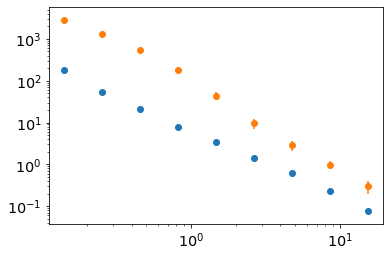

In [99]:
plt.errorbar(bincenters,cf_blue_mean,yerr=cf_blue_std,fmt = 'o')
plt.errorbar(bincenters,cf_red_mean,yerr=cf_red_std,fmt = 'o')
plt.xscale('log')
plt.yscale('log')

In [100]:
from Corrfunc.theory.DD import DD
autocorr = 1
nthreads=2
N = len(xyz_all_1)
X = xyz_all_1[:,0]
Y =  xyz_all_1[:,1]
Z =  xyz_all_1[:,2]


#################################
dd = DD(autocorr, nthreads, bins, X, Y,Z,periodic=False, verbose=True)

rand_N = 3*N
rand_X =np.float32(np.random.uniform(np.amin(X), np.amax(X), rand_N))
rand_Y =np.float32(np.random.uniform(np.amin(Y), np.amax(Y), rand_N))
rand_Z = np.float32(np.random.uniform(np.amin(Z), np.amax(Z), rand_N))

autocorr = 0
nthreads=2
DR= DD(autocorr, nthreads, bins, X, Y, Z,X2 = rand_X, Y2 = rand_Y,Z2=rand_Z,periodic=False, verbose=True)

autocorr = 1
nthreads=2
RR = DD(autocorr, nthreads, bins, rand_X, rand_Y, rand_Z,periodic=False, verbose=True)
###################################

cf_all_1 = convert_3d_counts_to_cf(N, N, 3*N, 3*N,dd, DR, DR, RR)


In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 10,10,5.  Time taken =   0.005 sec
countpairs_float> gridlink seems inefficient. nmesh = (10, 10, 5); avg_np = 124. Boosting bin refine factor - should lead to better performance
xmin = 0.005039 xmax=102.499870 rpmax = 19.952623
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 15,15,5.  Time taken =   0.005 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.134 secs
ND1 =        61821 [xmin,ymin,zmin] = [0.005039,0.003139,0.000129], [xmax,ymax,zmax] = [102.499870,102.498245,102.499306]
ND2 =       185463 [xmin,ymin,zmin] = [0.005039,0.003139,0.000129], [xmax,ymax,zmax] = [102.499870,102.498245,102.499306]
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 10,10,5.  Time taken =   0.004 sec
countpairs_float> gridlink seems inefficient. nmesh = (10, 10, 5); avg_np = 124. Boosting bin refine factor - sho

In [101]:
from Corrfunc.theory.DD import DD
autocorr = 1
nthreads=2
N = len(xyz_all_2)
X = xyz_all_2[:,0]
Y =  xyz_all_2[:,1]
Z =  xyz_all_2[:,2]


#################################
dd = DD(autocorr, nthreads, bins, X, Y,Z,periodic=False, verbose=True)

rand_N = 3*N
rand_X =np.float32(np.random.uniform(np.amin(X), np.amax(X), rand_N))
rand_Y =np.float32(np.random.uniform(np.amin(Y), np.amax(Y), rand_N))
rand_Z = np.float32(np.random.uniform(np.amin(Z), np.amax(Z), rand_N))

autocorr = 0
nthreads=2
DR= DD(autocorr, nthreads, bins, X, Y, Z,X2 = rand_X, Y2 = rand_Y,Z2=rand_Z,periodic=False, verbose=True)

autocorr = 1
nthreads=2
RR = DD(autocorr, nthreads, bins, rand_X, rand_Y, rand_Z,periodic=False, verbose=True)
###################################

cf_all_2 = convert_3d_counts_to_cf(N, N, 3*N, 3*N,dd, DR, DR, RR)


In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 10,10,5.  Time taken =   0.006 sec
countpairs_float> gridlink seems inefficient. nmesh = (10, 10, 5); avg_np = 156. Boosting bin refine factor - should lead to better performance
xmin = 0.002310 xmax=102.499863 rpmax = 19.952623
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 15,15,5.  Time taken =   0.007 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.201 secs
ND1 =        78220 [xmin,ymin,zmin] = [0.002310,0.002172,102.500702], [xmax,ymax,zmax] = [102.499863,102.498016,204.999146]
ND2 =       234660 [xmin,ymin,zmin] = [0.002310,0.002172,102.500702], [xmax,ymax,zmax] = [102.499863,102.498016,204.999146]
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 10,10,5.  Time taken =   0.006 sec
countpairs_float> gridlink seems inefficient. nmesh = (10, 10, 5); avg_np = 156. Boosting bin refine factor -

In [102]:
from Corrfunc.theory.DD import DD
autocorr = 1
nthreads=2
N = len(xyz_all_3)
X = xyz_all_3[:,0]
Y =  xyz_all_3[:,1]
Z =  xyz_all_3[:,2]


#################################
dd = DD(autocorr, nthreads, bins, X, Y,Z,periodic=False, verbose=True)

rand_N = 3*N
rand_X =np.float32(np.random.uniform(np.amin(X), np.amax(X), rand_N))
rand_Y =np.float32(np.random.uniform(np.amin(Y), np.amax(Y), rand_N))
rand_Z = np.float32(np.random.uniform(np.amin(Z), np.amax(Z), rand_N))

autocorr = 0
nthreads=2
DR= DD(autocorr, nthreads, bins, X, Y, Z,X2 = rand_X, Y2 = rand_Y,Z2=rand_Z,periodic=False, verbose=True)

autocorr = 1
nthreads=2
RR = DD(autocorr, nthreads, bins, rand_X, rand_Y, rand_Z,periodic=False, verbose=True)
###################################

cf_all_3 = convert_3d_counts_to_cf(N, N, 3*N, 3*N,dd, DR, DR, RR)


In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 10,10,5.  Time taken =   0.004 sec
countpairs_float> gridlink seems inefficient. nmesh = (10, 10, 5); avg_np = 133. Boosting bin refine factor - should lead to better performance
xmin = 0.000967 xmax=102.497826 rpmax = 19.952623
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 15,15,5.  Time taken =   0.005 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.155 secs
ND1 =        66253 [xmin,ymin,zmin] = [0.000967,102.505722,0.002515], [xmax,ymax,zmax] = [102.497826,204.996887,102.499763]
ND2 =       198759 [xmin,ymin,zmin] = [0.000967,102.505722,0.002515], [xmax,ymax,zmax] = [102.497826,204.996887,102.499763]
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 10,10,5.  Time taken =   0.006 sec
countpairs_float> gridlink seems inefficient. nmesh = (10, 10, 5); avg_np = 133. Boosting bin refine factor -

In [103]:
from Corrfunc.theory.DD import DD
autocorr = 1
nthreads=2
N = len(xyz_all_4)
X = xyz_all_4[:,0]
Y =  xyz_all_4[:,1]
Z =  xyz_all_4[:,2]


#################################
dd = DD(autocorr, nthreads, bins, X, Y,Z,periodic=False, verbose=True)

rand_N = 3*N
rand_X =np.float32(np.random.uniform(np.amin(X), np.amax(X), rand_N))
rand_Y =np.float32(np.random.uniform(np.amin(Y), np.amax(Y), rand_N))
rand_Z = np.float32(np.random.uniform(np.amin(Z), np.amax(Z), rand_N))

autocorr = 0
nthreads=2
DR= DD(autocorr, nthreads, bins, X, Y, Z,X2 = rand_X, Y2 = rand_Y,Z2=rand_Z,periodic=False, verbose=True)

autocorr = 1
nthreads=2
RR = DD(autocorr, nthreads, bins, rand_X, rand_Y, rand_Z,periodic=False, verbose=True)
###################################

cf_all_4 = convert_3d_counts_to_cf(N, N, 3*N, 3*N,dd, DR, DR, RR)


In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 10,10,5.  Time taken =   0.004 sec
countpairs_float> gridlink seems inefficient. nmesh = (10, 10, 5); avg_np = 128. Boosting bin refine factor - should lead to better performance
xmin = 102.500130 xmax=204.999954 rpmax = 19.952623
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 15,15,5.  Time taken =   0.005 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.147 secs
ND1 =        64123 [xmin,ymin,zmin] = [102.500130,0.000528,0.000877], [xmax,ymax,zmax] = [204.999954,102.497955,102.499741]
ND2 =       192369 [xmin,ymin,zmin] = [102.500130,0.000528,0.000877], [xmax,ymax,zmax] = [204.999954,102.497955,102.499741]
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 10,10,5.  Time taken =   0.004 sec
countpairs_float> gridlink seems inefficient. nmesh = (10, 10, 5); avg_np = 128. Boosting bin refine factor

In [104]:
from Corrfunc.theory.DD import DD
autocorr = 1
nthreads=2
N = len(xyz_all_5)
X = xyz_all_5[:,0]
Y =  xyz_all_5[:,1]
Z =  xyz_all_5[:,2]


#################################
dd = DD(autocorr, nthreads, bins, X, Y,Z,periodic=False, verbose=True)

rand_N = 3*N
rand_X =np.float32(np.random.uniform(np.amin(X), np.amax(X), rand_N))
rand_Y =np.float32(np.random.uniform(np.amin(Y), np.amax(Y), rand_N))
rand_Z = np.float32(np.random.uniform(np.amin(Z), np.amax(Z), rand_N))

autocorr = 0
nthreads=2
DR= DD(autocorr, nthreads, bins, X, Y, Z,X2 = rand_X, Y2 = rand_Y,Z2=rand_Z,periodic=False, verbose=True)

autocorr = 1
nthreads=2
RR = DD(autocorr, nthreads, bins, rand_X, rand_Y, rand_Z,periodic=False, verbose=True)
###################################

cf_all_5 = convert_3d_counts_to_cf(N, N, 3*N, 3*N,dd, DR, DR, RR)


In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 10,10,5.  Time taken =   0.005 sec
countpairs_float> gridlink seems inefficient. nmesh = (10, 10, 5); avg_np = 109. Boosting bin refine factor - should lead to better performance
xmin = 102.500259 xmax=204.998932 rpmax = 19.952623
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 15,15,5.  Time taken =   0.006 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.145 secs
ND1 =        54506 [xmin,ymin,zmin] = [102.500259,102.500633,0.001301], [xmax,ymax,zmax] = [204.998932,204.994888,102.498596]
ND2 =       163518 [xmin,ymin,zmin] = [102.500259,102.500633,0.001301], [xmax,ymax,zmax] = [204.998932,204.994888,102.498596]
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 10,10,5.  Time taken =   0.004 sec
countpairs_float> gridlink seems inefficient. nmesh = (10, 10, 5); avg_np = 109. Boosting bin refine fa

In [105]:
from Corrfunc.theory.DD import DD
autocorr = 1
nthreads=2
N = len(xyz_all_6)
X = xyz_all_6[:,0]
Y =  xyz_all_6[:,1]
Z =  xyz_all_6[:,2]


#################################
dd = DD(autocorr, nthreads, bins, X, Y,Z,periodic=False, verbose=True)

rand_N = 3*N
rand_X =np.float32(np.random.uniform(np.amin(X), np.amax(X), rand_N))
rand_Y =np.float32(np.random.uniform(np.amin(Y), np.amax(Y), rand_N))
rand_Z = np.float32(np.random.uniform(np.amin(Z), np.amax(Z), rand_N))

autocorr = 0
nthreads=2
DR= DD(autocorr, nthreads, bins, X, Y, Z,X2 = rand_X, Y2 = rand_Y,Z2=rand_Z,periodic=False, verbose=True)

autocorr = 1
nthreads=2
RR = DD(autocorr, nthreads, bins, rand_X, rand_Y, rand_Z,periodic=False, verbose=True)
###################################

cf_all_6 = convert_3d_counts_to_cf(N, N, 3*N, 3*N,dd, DR, DR, RR)


In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 10,10,5.  Time taken =   0.006 sec
countpairs_float> gridlink seems inefficient. nmesh = (10, 10, 5); avg_np = 135. Boosting bin refine factor - should lead to better performance
xmin = 102.500465 xmax=204.998459 rpmax = 19.952623
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 15,15,5.  Time taken =   0.006 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.159 secs
ND1 =        67642 [xmin,ymin,zmin] = [102.500465,0.002054,102.501442], [xmax,ymax,zmax] = [204.998459,102.499680,204.999405]
ND2 =       202926 [xmin,ymin,zmin] = [102.500465,0.002054,102.501442], [xmax,ymax,zmax] = [204.998459,102.499680,204.999405]
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 10,10,5.  Time taken =   0.006 sec
countpairs_float> gridlink seems inefficient. nmesh = (10, 10, 5); avg_np = 135. Boosting bin refine fa

In [106]:
from Corrfunc.theory.DD import DD
autocorr = 1
nthreads=2
N = len(xyz_all_7)
X = xyz_all_7[:,0]
Y =  xyz_all_7[:,1]
Z =  xyz_all_7[:,2]


#################################
dd = DD(autocorr, nthreads, bins, X, Y,Z,periodic=False, verbose=True)

rand_N = 3*N
rand_X =np.float32(np.random.uniform(np.amin(X), np.amax(X), rand_N))
rand_Y =np.float32(np.random.uniform(np.amin(Y), np.amax(Y), rand_N))
rand_Z = np.float32(np.random.uniform(np.amin(Z), np.amax(Z), rand_N))

autocorr = 0
nthreads=2
DR= DD(autocorr, nthreads, bins, X, Y, Z,X2 = rand_X, Y2 = rand_Y,Z2=rand_Z,periodic=False, verbose=True)

autocorr = 1
nthreads=2
RR = DD(autocorr, nthreads, bins, rand_X, rand_Y, rand_Z,periodic=False, verbose=True)
###################################

cf_all_7 = convert_3d_counts_to_cf(N, N, 3*N, 3*N,dd, DR, DR, RR)


In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 10,10,5.  Time taken =   0.004 sec
countpairs_float> gridlink seems inefficient. nmesh = (10, 10, 5); avg_np = 126. Boosting bin refine factor - should lead to better performance
xmin = -0.000094 xmax=102.492783 rpmax = 19.952623
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 15,15,5.  Time taken =   0.006 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.138 secs
ND1 =        62794 [xmin,ymin,zmin] = [-0.000094,102.500862,102.500679], [xmax,ymax,zmax] = [102.492783,204.999466,204.999359]
ND2 =       188382 [xmin,ymin,zmin] = [-0.000094,102.500862,102.500679], [xmax,ymax,zmax] = [102.492783,204.999466,204.999359]
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 10,10,5.  Time taken =   0.005 sec
countpairs_float> gridlink seems inefficient. nmesh = (10, 10, 5); avg_np = 126. Boosting bin refine f

In [107]:
from Corrfunc.theory.DD import DD
autocorr = 1
nthreads=2
N = len(xyz_all_8)
X = xyz_all_8[:,0]
Y =  xyz_all_8[:,1]
Z =  xyz_all_8[:,2]


#################################
dd = DD(autocorr, nthreads, bins, X, Y,Z,periodic=False, verbose=True)

rand_N = 3*N
rand_X =np.float32(np.random.uniform(np.amin(X), np.amax(X), rand_N))
rand_Y =np.float32(np.random.uniform(np.amin(Y), np.amax(Y), rand_N))
rand_Z = np.float32(np.random.uniform(np.amin(Z), np.amax(Z), rand_N))

autocorr = 0
nthreads=2
DR= DD(autocorr, nthreads, bins, X, Y, Z,X2 = rand_X, Y2 = rand_Y,Z2=rand_Z,periodic=False, verbose=True)

autocorr = 1
nthreads=2
RR = DD(autocorr, nthreads, bins, rand_X, rand_Y, rand_Z,periodic=False, verbose=True)
###################################

cf_all_8 = convert_3d_counts_to_cf(N, N, 3*N, 3*N,dd, DR, DR, RR)


In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 10,10,5.  Time taken =   0.005 sec
countpairs_float> gridlink seems inefficient. nmesh = (10, 10, 5); avg_np = 120. Boosting bin refine factor - should lead to better performance
xmin = 102.501770 xmax=204.999710 rpmax = 19.952623
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 15,15,5.  Time taken =   0.006 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.133 secs
ND1 =        59974 [xmin,ymin,zmin] = [102.501770,102.500412,102.506767], [xmax,ymax,zmax] = [204.999710,204.993423,204.998627]
ND2 =       179922 [xmin,ymin,zmin] = [102.501770,102.500412,102.506767], [xmax,ymax,zmax] = [204.999710,204.993423,204.998627]
In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 10,10,5.  Time taken =   0.004 sec
countpairs_float> gridlink seems inefficient. nmesh = (10, 10, 5); avg_np = 120. Boosting bin refin

In [108]:
cf_all_mean = np.mean((cf_all_1,cf_all_2,cf_all_3,cf_all_4,cf_all_5,cf_all_6,cf_all_7,cf_all_8),axis = 0)
cf_all_std = np.std((cf_all_1,cf_all_2,cf_all_3,cf_all_4,cf_all_5,cf_all_6,cf_all_7,cf_all_8),axis = 0)


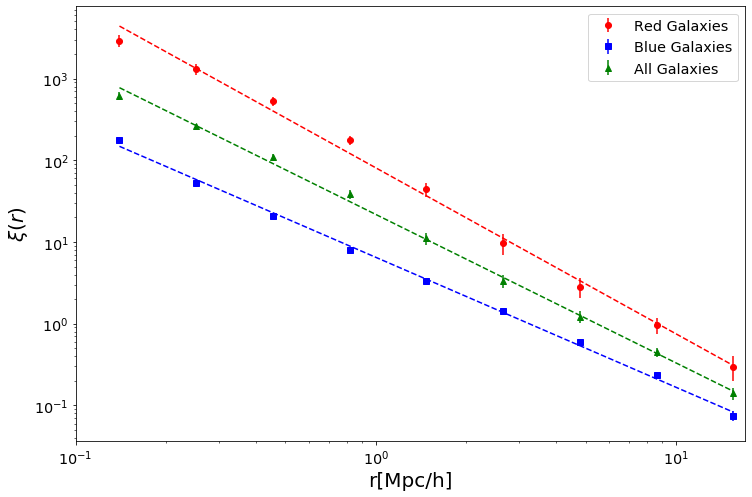

In [120]:
bincenters= 0.5*(bins[1:]+bins[:-1])

#plt.plot(bins[:-2], j_mean,label='poisson point process')
#plt.fill_between(bins[:-2], j_mean-j_std, j_mean+j_std,color = 'lightblue',lw=2)
fig = plt.figure(figsize=(12,8))
params = {'legend.fontsize': 'x-large',
          'font.family':'Times New Roman',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)                

bincenters = 0.5*(bins[1:]+bins[:-1])

#plt.scatter(bincenters,corr_red_mean,color = 'red')

plt.errorbar(bincenters, cf_red_mean,yerr= cf_red_std,color = 'red',fmt = 'o',label = 'Red Galaxies')

#plt.scatter(bincenters,corr_blue_mean,color = 'navy')
plt.errorbar(bincenters, cf_blue_mean,yerr= cf_blue_std,color = 'blue',fmt = 's',label = 'Blue Galaxies')
#plt.scatter(bincenters,corr_all_mean,color = 'green')
plt.errorbar(bincenters,cf_all_mean,yerr= cf_all_std,color = 'green',fmt = '^',label = 'All Galaxies')
#plt.plot(bincenters, corr_red_mean,color = 'red',label = 'Blue Galaxies with $9.1<log(M_*/M_0)<10$')
#plt.fill_between(bincenters, corr_red_mean-corr_red_std,corr_red_mean+corr_red_std,color = 'magenta',lw=2)

#plt.plot(bincenters, corr_blue_mean,color = 'navy',label = 'Red Galaxies with $8.5<log(M_*/M_0)<10$')
#plt.fill_between(bincenters,corr_blue_mean-corr_blue_std,corr_blue_mean+corr_blue_std,color = 'lightblue',lw=2)

#plt.plot(bincenters, corr_all_mean,color = 'green',label = 'Blue Galaxies with $9.1<log(M_*/M_0)<10$')
#plt.fill_between(bincenters, corr_all_mean-corr_all_std,corr_all_mean+corr_all_std,color = 'lightgreen',lw=2)

plt.plot(bincenters,xi_red,'r--')
plt.plot(bincenters,xi_blue,'b--')
plt.plot(bincenters,xi_all,'g--')
plt.xlim(0.1,17)
plt.xscale('log')
plt.yscale('log')

#plt.yscale('log')
plt.xlabel('r[Mpc/h]',fontsize=20);
plt.ylabel('$\\xi(r)$',fontsize=20)
#plt.title('Poisson Point Process');
#plt.grid('on')
plt.legend(loc=0)
plt.yscale('log')
x = np.linspace(0.1,10,10)
#y = x*(-1000) + 10000
#plt.plot(x,y)
#plt.grid('on')
plt.savefig('corr_red_blue.png')

In [121]:
from scipy import stats
s_red, int_red,a,b,z = stats.linregress(np.log10(bincenters),np.log10(cf_red_mean))
s_blue, int_blue,a,b,z = stats.linregress(np.log10(bincenters),np.log10(cf_blue_mean))
s_all, int_all,a,b,z = stats.linregress(np.log10(bincenters),np.log10(cf_all_mean))

In [122]:
gamma_red = -s_red
gamma_blue = -s_blue
gamma_all = -s_all

r_red = 10**(int_red/gamma_red)
r_blue =10**(int_blue/gamma_blue)
r_all =10**(int_all/gamma_all)

In [123]:
xi_red = (bincenters/r_red)**(-gamma_red)
xi_blue= (bincenters/r_blue)**(-gamma_blue)
xi_all= (bincenters/r_all)**(-gamma_all)

In [124]:
print(gamma_red)
print(gamma_blue)
print(gamma_all)
print('.................')

print(r_red)
print(r_blue)
print(r_all)

2.031638426686302
1.5907388455616194
1.8168887003701317
.................
8.695851693921512
3.2448207691662696
5.448547953084914


In [195]:
r_red

33.508529331257265

# random labeling property

In [187]:
rand_color_class = np.random.randint(2,size=(len(gal)))

In [188]:
gal['rand_color_class'] = rand_color_class

In [189]:
gal_blue_rand = gal[gal['rand_color_class']==0]
gal_red_rand = gal[gal['rand_color_class']==1]

In [190]:
len(gal_blue_rand)

257274

In [191]:
len(gal_red_rand)

258060

In [192]:
xyz_blue_rand = gal_blue_rand[['x','y','z']].values/1000
xyz_red_rand =gal_red_rand[['x','y','z']].values/1000
xyz_all_rand =gal[['x','y','z']].values/1000

In [193]:
import halotools.mock_observables

corr_red_rand =  halotools.mock_observables.tpcf(xyz_red_rand, bins, period=205, estimator='Landy-Szalay')
corr_blue_rand =   halotools.mock_observables.tpcf(xyz_blue_rand, bins, period=205, estimator='Landy-Szalay')
corr_all_rand =  halotools.mock_observables.tpcf(xyz_all_rand, bins, period=205, estimator='Landy-Szalay')

In [194]:
corr_rand15 = (corr_red_rand-corr_blue_rand)/corr_all_rand

In [195]:
corr_rand_mean = np.mean((corr_rand,corr_rand1,corr_rand2,corr_rand3,corr_rand4,corr_rand5,corr_rand6,corr_rand7,corr_rand8,corr_rand9,corr_rand10,corr_rand11,corr_rand12,corr_rand13,corr_rand14,corr_rand15),axis=0)
corr_rand_std = np.std((corr_rand,corr_rand1,corr_rand2,corr_rand3,corr_rand4,corr_rand5,corr_rand6,corr_rand7,corr_rand8,corr_rand9,corr_rand10,corr_rand11,corr_rand12,corr_rand13,corr_rand14,corr_rand15),axis=0)

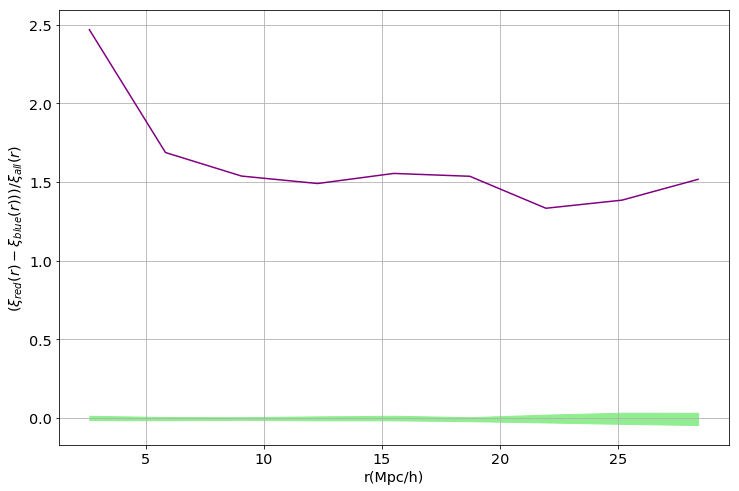

In [200]:
fig = plt.figure(figsize=(12,8))
params = {'legend.fontsize': 'x-large',
          
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)                
ax = fig.add_subplot(111,xlabel='r(Mpc/h)',ylabel = '$(\\xi_{red}(r)-\\xi_{blue}(r)))/\\xi_{all}(r)$')
ax.plot(bincenters,corr,color = 'purple')
ax.fill_between(bincenters,corr_rand_mean - corr_rand_std,corr_rand_mean + corr_rand_std,color = 'lightgreen')
ax.grid('on')
plt.savefig('delta_correlation.png')

In [206]:
len(xyz_blue)

296995

In [207]:
len(xyz_red)

218339

# Mark Correlation Function

# $M(r) = \frac{1 + W(r)}{1+\xi(r)} = \frac{WW}{DD} = \sum \frac{m_im_j}{n(r)\bar{m}^2} \rightarrow M(r)>1 \rightarrow \sum m_im_j>n(r)\bar{m}^2$

In [54]:
mark_color = gal['g_r'].values
mark_stellarmass = gal['stellarmass'].values

In [55]:
mean_mark_color = np.mean(gal['g_r'].values)
mean_mark_stellarmass = np.mean(gal['stellarmass'].values)

In [56]:
mark_color = mark_color/mean_mark_color
mark_stellarmass = mark_stellarmass/mean_mark_stellarmass

In [57]:
x = gal['x'].values/1000
y = gal['y'].values/1000
z = gal['z'].values/1000


In [58]:
coords = np.vstack((x,y,z)).T

In [59]:
coords.shape

(515334, 3)

In [60]:
rbins = np.logspace(-2,1,15)
import halotools.mock_observables
color_corr_dd = halotools.mock_observables.marked_tpcf(coords, rbins,marks1 = mark_color, period=205, normalize_by='number_counts',weight_func_id =1)

In [61]:
rbins = np.logspace(-2,1,15)
import halotools.mock_observables
mass_corr_dd = halotools.mock_observables.marked_tpcf(coords, rbins,marks1 = mark_stellarmass, period=205, normalize_by='number_counts',weight_func_id =1)

In [62]:
rbins

array([ 0.01      ,  0.01637894,  0.02682696,  0.04393971,  0.07196857,
        0.11787686,  0.19306977,  0.31622777,  0.51794747,  0.8483429 ,
        1.38949549,  2.27584593,  3.72759372,  6.1054023 , 10.        ])

In [63]:
bincenters = 0.5*(rbins[1:]+rbins[:-1])

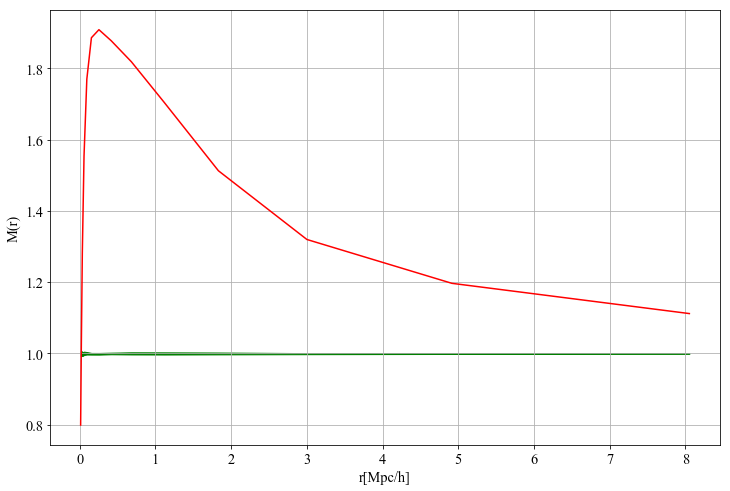

In [105]:
fig = plt.figure(figsize=(12,8))
csfont = {'fontname':'Times New Roman'}
params = {'legend.fontsize': 'x-large',
          'font.family':'Times New Roman',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)                
ax = fig.add_subplot(111)
ax.plot(bincenters,color_corr_dd,color = 'red')
ax.fill_between(bincenters,marked_corr_shuffle_color_mean - marked_corr_shuffle_color_std,marked_corr_shuffle_color_mean + marked_corr_shuffle_color_std,color = 'green')
#ax.fill_between(bincenters,corr_rand_mean - corr_rand_std,corr_rand_mean + corr_rand_std,color = 'lightgreen')
#ax.grid('on'),xlabel='$log(M_* h/M_0)$',ylabel = '$log[n(>M)h^3/Mpc^3]$'
plt.xlabel('r[Mpc/h]')
plt.ylabel('M(r)')
plt.grid('on')
#plt.xlim(8,12)
#plt.ylim(-6,-1)
plt.savefig('marked_correlation_color.png')


NameError: name 'mass_corr_dd' is not defined

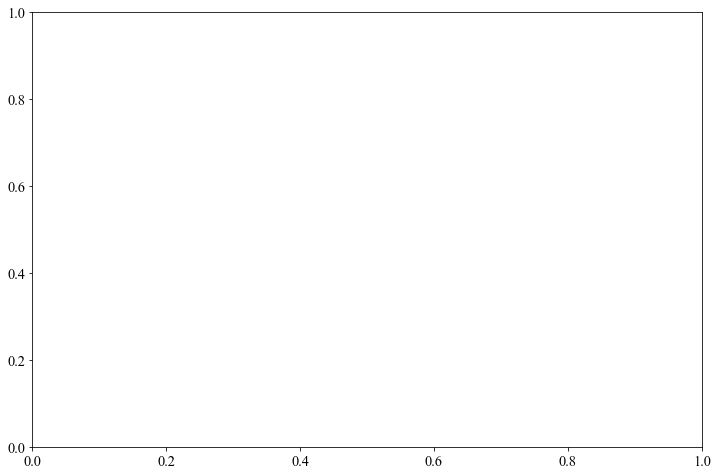

In [53]:
fig = plt.figure(figsize=(12,8))
csfont = {'fontname':'Times New Roman'}
params = {'legend.fontsize': 'x-large',
          'font.family':'Times New Roman',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)                
ax = fig.add_subplot(111)
ax.plot(bincenters,mass_corr_dd,color = 'blue')
ax.fill_between(bincenters,marked_mass_shuffle_color_mean - marked_mass_shuffle_color_std,marked_mass_shuffle_color_mean + marked_mass_shuffle_color_std,color = 'green')
#ax.grid('on'),xlabel='$log(M_* h/M_0)$',ylabel = '$log[n(>M)h^3/Mpc^3]$'
plt.xlabel('r[Mpc/h]')
plt.ylabel('M(r)')
plt.grid('on')
#plt.xlim(8,12)
#plt.ylim(-6,-1)
plt.xscale('log')
#plt.savefig('marked_correlation_stellar_mass.png')

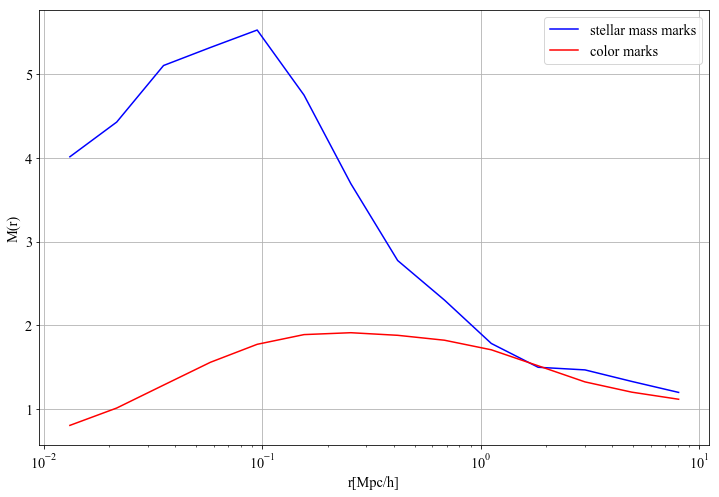

In [66]:
fig = plt.figure(figsize=(12,8))
csfont = {'fontname':'Times New Roman'}
params = {'legend.fontsize': 'x-large',
          'font.family':'Times New Roman',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)                
ax = fig.add_subplot(111)
ax.plot(bincenters,mass_corr_dd,color = 'blue',label='stellar mass marks')
ax.plot(bincenters,color_corr_dd,color ='red',label='color marks')
#ax.grid('on'),xlabel='$log(M_* h/M_0)$',ylabel = '$log[n(>M)h^3/Mpc^3]$'
plt.xlabel('r[Mpc/h]')
plt.ylabel('M(r)')
plt.grid('on')
#plt.xlim(8,12)
#plt.ylim(-6,-1)
plt.xscale('log')
plt.legend(loc=0)
#plt.savefig('marked_correlation_stellar_mass.png')

In [108]:
gal['stellarmass_shuffle'] = gal['stellarmass']

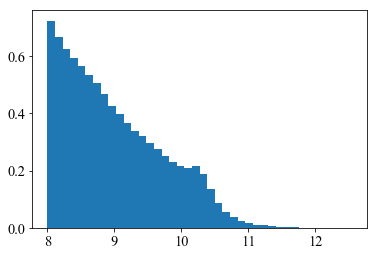

In [168]:
plt.hist(gal['log_mass'],40,density = True);

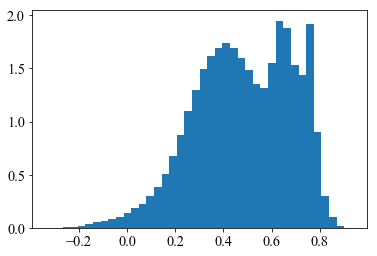

In [163]:
plt.hist(gal['g_r'],40,density = True);

In [154]:
np.random.shuffle(gal['stellarmass_shuffle'].values)

In [155]:
marks_mass_shuffle = gal['stellarmass_shuffle'].values
mean_mark_mass_shuffle = np.mean(gal['stellarmass_shuffle'].values)
mark_mass_shuffle = marks_mass_shuffle/mean_mark_mass_shuffle

In [156]:
rbins = np.logspace(-2,1,15)

marked_corr_shuffle_mass15 = halotools.mock_observables.marked_tpcf(coords, rbins,marks1 =mark_mass_shuffle, period=205, normalize_by='number_counts',weight_func_id =1)

In [157]:
marked_mass_shuffle_color_mean= np.mean((marked_corr_shuffle_mass,marked_corr_shuffle_mass1,marked_corr_shuffle_mass2,marked_corr_shuffle_mass3,marked_corr_shuffle_mass4,marked_corr_shuffle_mass5,marked_corr_shuffle_mass6,marked_corr_shuffle_mass7,marked_corr_shuffle_mass8,marked_corr_shuffle_mass9,marked_corr_shuffle_mass10,marked_corr_shuffle_mass11,marked_corr_shuffle_mass12,marked_corr_shuffle_mass13,marked_corr_shuffle_mass14,marked_corr_shuffle_mass15),axis=0)

In [158]:
marked_mass_shuffle_color_std = np.std((marked_corr_shuffle_mass,marked_corr_shuffle_mass1,marked_corr_shuffle_mass2,marked_corr_shuffle_mass3,marked_corr_shuffle_mass4,marked_corr_shuffle_mass5,marked_corr_shuffle_mass6,marked_corr_shuffle_mass7,marked_corr_shuffle_mass8,marked_corr_shuffle_mass9,marked_corr_shuffle_mass10,marked_corr_shuffle_mass11,marked_corr_shuffle_mass12,marked_corr_shuffle_mass13,marked_corr_shuffle_mass14,marked_corr_shuffle_mass15),axis=0)

In [97]:
marks_color_shuffle = gal['g_r_shuffle'].values
mean_mark_color_shuffle = np.mean(gal['g_r_shuffle'].values)
mark_color_shuffle = marks_color_shuffle/mean_mark_color_shuffle

In [98]:
rbins = np.logspace(-2,1,15)

marked_corr_shuffle15 = halotools.mock_observables.marked_tpcf(coords, rbins,marks1 = mark_color_shuffle, period=205, normalize_by='number_counts',weight_func_id =1)

In [102]:
marked_corr_shuffle_color_mean= np.mean((marked_corr_shuffle,marked_corr_shuffle1,marked_corr_shuffle2,marked_corr_shuffle3,marked_corr_shuffle4,marked_corr_shuffle5,marked_corr_shuffle6,marked_corr_shuffle7,marked_corr_shuffle8,marked_corr_shuffle9,marked_corr_shuffle10,marked_corr_shuffle11,marked_corr_shuffle12,marked_corr_shuffle13,marked_corr_shuffle14,marked_corr_shuffle15),axis=0)

In [101]:
marked_corr_shuffle_color_std = np.std((marked_corr_shuffle,marked_corr_shuffle1,marked_corr_shuffle2,marked_corr_shuffle3,marked_corr_shuffle4,marked_corr_shuffle5,marked_corr_shuffle6,marked_corr_shuffle7,marked_corr_shuffle8,marked_corr_shuffle9,marked_corr_shuffle10,marked_corr_shuffle11,marked_corr_shuffle12,marked_corr_shuffle13,marked_corr_shuffle14,marked_corr_shuffle15),axis=0)

# Ranked Mark Correlation function

In [42]:
gal['rank_c'] = gal['g_r'].rank()
gal['rank_m'] = gal['stellarmass'].rank()

In [43]:
color_rank_mark = gal['rank_c'].values/np.mean(gal['rank_c'].values)
mass_rank_mark = gal['rank_m'].values/np.mean(gal['rank_m'].values)

In [44]:
x = gal['x'].values/1000
y = gal['y'].values/1000
z = gal['z'].values/1000

In [45]:
coords = np.vstack((x,y,z)).T

In [47]:
rbins = np.logspace(-2,1,15)
import halotools.mock_observables
color_corr_rank = halotools.mock_observables.marked_tpcf(coords, rbins,marks1 = color_rank_mark, period=205, normalize_by='number_counts',weight_func_id =1)

In [49]:
rbins = np.logspace(-2,1,15)
import halotools.mock_observables
mass_corr_rank = halotools.mock_observables.marked_tpcf(coords, rbins,marks1 = mass_rank_mark, period=205, normalize_by='random_marks',weight_func_id =1)

In [50]:
bincenters = 0.5*(rbins[1:]+rbins[:-1])

In [470]:
xyz_all= gal[['x','y','z']].values/1000

color = gal['g_r'].values
mean_color = np.mean(color)
mark_color = color/mean_color

In [471]:
xyz_all.shape

(515334, 3)

In [478]:
rbins = np.linspace(1,10,10)

In [479]:
np.amax(xyz_all)

204.99995

In [481]:
mark_color = mark_color.reshape(-1,1)

In [485]:
import Corrfunc

In [487]:
from Corrfunc.theory.xi import xi
boxsize= 205
nthreads=2
w_all = Corrfunc.theory.xi(boxsize, nthreads, rbins, xyz_all[:,0], xyz_all[:,1], xyz_all[:,2], weights=mark_color, weight_type='pair_product', output_ravg=True)
results = xi(boxsize, nthreads, bins, xyz_all[:,0],xyz_all[:,1],xyz_all[:,2])
w_all = xi(boxsize, nthreads, rbins, X, Y, Z, weights=mark_color, weight_type='pair_product', output_ravg=True)

MemoryError: 

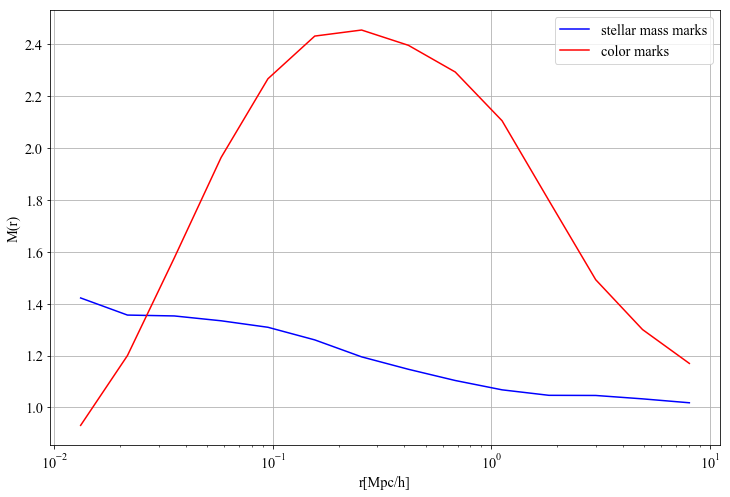

In [67]:
fig = plt.figure(figsize=(12,8))
csfont = {'fontname':'Times New Roman'}
params = {'legend.fontsize': 'x-large',
          'font.family':'Times New Roman',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)                
ax = fig.add_subplot(111)
ax.plot(bincenters,mass_corr_rank,color = 'blue',label='stellar mass marks')
ax.plot(bincenters,color_corr_rank,color = 'red',label='color marks')
#ax.fill_between(bincenters,marked_mass_shuffle_color_mean - marked_mass_shuffle_color_std,marked_mass_shuffle_color_mean + marked_mass_shuffle_color_std,color = 'green')
#ax.grid('on'),xlabel='$log(M_* h/M_0)$',ylabel = '$log[n(>M)h^3/Mpc^3]$'
plt.xlabel('r[Mpc/h]')
plt.ylabel('M(r)')
plt.grid('on')
plt.xscale('log')
plt.legend(loc=0)
#plt.xlim(8,12)
#plt.ylim(-6,-1)
#plt.savefig('marked_correlation_stellar_mass.png')